# Telecom Churn Case Study

### Team: Dnyanesh Satam & Pallavi Panicker

### Executive Summary
In this digital economy, companies are being reminded consistently that it is the customer's market. Hence understanding why a customer stays loyal or not, is of supreme importance for organizations to evaluate and transform their value propostion and offers. In this case study, we have found various ways to predict customer churn through algorithms with different approaches. Using the data spanning three months, we find the third month (action phase) being instrumental in identifying changing customer behaviors to identify churn. <br>
We identified the following categories as the most influencing one: <br>
<b> Influencing Factors (representing action phase)</b>

<table style="width:100% text-align:center">
  <tr>
    <td>Change in Data and Call Recharge trends</td> 
  </tr>
  <tr>
    <td>3G Volume based cost</td> 
  </tr>
    <tr>
    <td>Average data recharge amount</td> 
  </tr> 
  <tr>
    <td>Change in Off Network and On network Trends</td> 
  </tr>
  <tr>
    <td>Changing Incoming Call Trends</td> 
  </tr>
   <tr>
    <td>Last Date of Data recharge</td> 
  </tr>
  <tr>
    <td>Local MOUs of outgoing and incoming calls</td>  
  </tr>
   <tr>
    <td>Customer's network age or Loyalty.</td>  
  </tr>
</table>
</b> <br>
A stark distinction in clear decreasing trends by the churning customers across these factors (visually) was identified and hence should be used as a monitoring benchmark to signal a possible churn. Loyalty plays well for retaining customers and thus loyal customers should be rewarded time to time to sustain their engagement. What is furthermore noticed that STD/ISD or Roaming features did not show up in the top features plus nor did  many cost-based features. Hence, one can assume that costs are competitive with the market offers and local calling and data activities should be focussed on.

###  Approach Summary
<font color='blue'>With the expectation to predict churn and highlight influencing factors towards that decision, we are required to use two model routes, one with the focus on interpretability so as to derive factors that influence churn and the other that is good in prediction using PCA. As a team, we have explored two approaches to understand <b> variations in number of features, outlier treatment and choice and implementation of algorithms </b> to test our learnings. <br>
    
<b>Approach 1</b>: PCA with Logistic Regression, Linear & Non-Linear SVM (without and with hyperparameter tuning) and Random Forest. <br>

<b>Approach 2</b>: Without PCA and Logistic Regression (for interpretability) and with PCA for Logistic Regression, Decision Tree and Random Forest with & without Hyperparameters Tuning <br>

Both approaches differ in Final Number of features chosen for modelling the algorithms and also Outlier Treatment. While we chose a more extensive dataset for approach 1 (only PCA) as PCA handles dimensionality, we chose a more reduced dataset to support Approach 2 which included the non-PCA approach. <br>

Furthermore,the business context being for High Value Customers, variability in the ARPU, MOU activities generated by customers can fluctuate based on high usage of data and calling services. Hence, what level of segregation do we use to justify a completely render the dataset outlier free or allow the variations to justify HVC usage revenue. Thus we have used a more stricter outlier approach for Approach 1 and a lenient one for Approach 2.<br>
    
<br>
It was found that the data was imbalanced, i.e.~91% of datapoints represented non-churn or retaininng customers. To balance this class-weight='balanced' parameter was used to penalize the algorithms to equally consider churned data points as well.<br>

The following table summarizes demonstrates the accuracies for each algorithm used. Please note that train and test accuracies for all algorithms were within convincing ranges and hence overfitting was not risked.<br>

<b> Approach 1</b>

<table style="width:50%">
  <tr>
    <th>Algorithm</th>
    <th>Accuracy</th> 
    <th>Sensitivity</th>
  </tr>
  <tr>
    <td>PCA Logistic Regression</td>
    <td>0.83</td> 
    <td>0.85</td>
  </tr>
  <tr>
    <td>PCA Linear SVM</td>
    <td>0.85</td> 
    <td>0.83</td>
  </tr>
  <tr>
    <td>PCA Non-Linear SVM without Tuning</td>
    <td>0.91</td> 
    <td>0.69</td>
  </tr>
   <tr>
    <td>PCA Non-Linear SVM with Tuning</td>
    <td>0.92</td> 
    <td>0.48</td>
  </tr>
    <tr>
    <td>Random Forest</td>
    <td>0.93</td> 
    <td>0.14</td>
  </tr>
</table>

<b> Approach 2</b>

<table style="width:50%">
  <tr>
    <th>Algorithm</th>
    <th>Accuracy</th> 
    <th>Sensitivity</th>
  </tr>
  <tr>
    <td>Logistic Regression (non-PCA):Interpretable </td>
    <td>0.81</td> 
    <td>0.85</td>
  </tr>
  <tr>
    <td>PCA Logistic Regression</td>
    <td>0.84</td> 
    <td>0.84</td>
  </tr>
  <tr>
    <td>PCA Decision Tree without Tuning</td>
    <td>0.92</td> 
    <td>0.14</td>
  </tr>
    <tr>
    <td>PCA Decision Tree with Tuning</td>
    <td>0.90</td> 
    <td>0.36</td>
  </tr>
  <tr>
    <td>PCA Random Forest without Tuning</td>
    <td>0.93</td> 
    <td>0.16</td>
  </tr>
    <tr>
     <td>PCA Random Forest with Tuning</td>
    <td>0.93</td> 
    <td>0.76</td>
  </tr>

</table>

<br> As observed, accuracies improve as we move from Logistic Regression towards Random Forest. Random Forest seems a better candidate for predicting churn. However we also notice that sensitivity decreases along the same lines. While we modulated with various parameter multiple times we did not observe convincing jumps in accuracies or improvements in sensitivity (given the class imbalance). Thus Logistic Regression favoring sensitivity. The choice depends on the prioritized aspect. Moreoever, time taken for Random Forest was extensively more with every iteration of changing hyperparameter trials i.e. 4-5 hours per trial with 100% CPU utilization thus being the most expensive computing option. Eventually we tuned within a limited range of 2 values per tuning parameters to be sufficiently efficient with accuracy and time.<br><br>
Case Study Learnings: We seek further guidance from professors/mentors to help us explore further best practices in areas of accuracy versus alignment to business context and feature selection</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
churndata = pd.read_csv('telecom_churn_data.csv')

### Approach 1

### Data Understanding

In [3]:
churndata.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

We see that there are numeric data types that fall within the data types of float and int and date objects.

In [4]:
churndata.head(30)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0      7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   197.385   214.816   213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1      7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014    34.047   355.074   268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00              0.00              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00              0.00   
2      7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   167.690   189.058   210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91           0.00           0.00           0.00          38.49           0.00           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24              0.00            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83              0.00   
3      7001204172        109            

In [5]:
churndata.iloc[:,2:].describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  \
count         98981.0         98981.0         98981.0  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   94621.000000   92254.000000   96062.000000   96140.000000   94621.000000   92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000  96062.000000  96140.000000  94621.000000  92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000           96062.0           96140.0           94621.0           92254.0  96062.000000   
mean              0.0             0.0             0.0    282.987358    278.536648    279.154731    261.645069    132.395875    133.670805    133.018098    130.302327    197.935577    197.045133    196.574803    190.337222       9.950013       7.149898       7.292981       6.343841      13.911337       9.818732       9.971890       8.555519         47.100763         46.473010         45.887806         44.584446         93.342088         91.397131         91.755128         90.463192          3.751013          3.792985          3.677991          3.655123          1.123056          1.368500          1.433821          1.232726    144.201175    141.670476    141.328209    138.709970         79.829870         83.299598         83.282673         82.342919         87.299624         90.804137         89.838390         86.276622          1.129011          1.115010          1.067792          1.042362               0.0               0.0               0.0               0.0    168.261218   
std               0.0             0.0             0.0    328.439770    338.156291    344.474791    341.998630    297.207406    308.794148    308.951589    308.477668    316.851613    325.862803    327.170662    319.396092      72.825411      73.447948      68.402466      57.137537      71.443196      58.455762      64.713221      58.438186        150.856393        155.318705        151.184830        147.995390        162.780544        157.492308        156.537048        158.681454         14.230438         14.264986         13.270996         13.457549          5.448946          7.533445          6.783335          5.619021    251.751489    248.731086    245.914311    245.934517        252.476533        263.631042        265.486090        267.184991        255.617850        269.347911        271.757783        261.407396          7.984970          8.599406          7.905971          8.261770               0.0               0.0               0.0               0.0    389.948499   
min               0.0             0.0      

Going through the columns and the dataset, various dependencies or connections are observed. This signals possible multicollinearity as well. <br>

For e.g.for outgoing calls the following calculations compound values towards total outgoing minutes of usage: <br>
loc_og_mou_x = loc_og_t2o_mou + loc_og_t2t_mou_x + loc_og_t2m_mou_x + loc_og_t2f_mou_x + loc_og_t2c_mou_x <br>
std_og_mou_x = std_og_t2o_mou + std_og_t2t_mou_x + std_og_t2m_mou_x + std_og_t2f_mou_x + std_og_t2c_mou_x <br>
total_og_mou_x = loc_og_mou_x + std_og_mou_x + isd_og_mou_x + spl_og_mou_x + og_others_x <br>

Similar calculations can be done for total incoming MOU, data recharge columns. This can be further used to supplement NaN values where necessary and then reduced to create models. If influencing factors identified are similar to the accumulated features, further models can be created to ascertain specific features influencing those accumulated features.

## Missing Value Treatment

In [6]:
round(100*(churndata.isnull().sum()/len(churndata.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [7]:
round(100*(churndata.isnull().sum()/len(churndata.index)), 2).describe()

count    226.000000
mean      15.908628
std       27.233575
min        0.000000
25%        0.000000
50%        3.940000
75%        7.750000
max       74.850000
dtype: float64

As seen above, most of the null value percentages fall between 0-8% range, whereas we have a chunk of columns that have above 70% missing values. Instead of dropping above 70% null value columns instantly, we will investigate further to ascertain potential imputation.

In [8]:
#Filtering 70% and up null value columns
s=round(100*(churndata.isnull().sum()/len(churndata.index)), 2)
s=s[s>70]
s

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

<b>total_rech_data_x, Total Number of Data Recharges for the month & av_rech_amt_data_x, Average Recharge Amount</b>: It is noticed using value counts that there are no 0 values to mark no recharge activity for the month for both these columns. Furthermore the corresponding date for the data recharge is also null when no recharge is done. Total number of data recharges amounts to the total of individual counts of 3g and 2g recharges. Corresponding columns in 2g and 3g data recharges are null which is reflected in total data recharges and therefore average amount as well. With this logic, one can impute 0 for total number of recharges.

In [9]:
#Value Counts
churndata['total_rech_data_6'].value_counts()
churndata['av_rech_amt_data_6'].value_counts()

154.0    3718
252.0    1889
198.0    1074
25.0      962
98.0      794
         ... 
18.5        1
589.0       1
703.0       1
943.0       1
427.5       1
Name: av_rech_amt_data_6, Length: 887, dtype: int64

In [10]:
for i in ['6','7','8','9']:
    churndata['total_rech_data_'+i].fillna(0, inplace=True)
    
for i in ['6','7','8','9']:
    churndata['av_rech_amt_data_'+i].fillna(0, inplace=True)

For
<b>count_rech_2g_x and count_rech_3g_x </b>, while skimming through data, we observe that 2G recharge data &
3G recharge data are complementary to each other i.e. when either is recharged the corresponding other is marked as 0. However when neither are recharged, they have null values, which could be imputed with 0 to mark no recharge for either. We verify further as below with one of the months:

In [11]:
(churndata['count_rech_2g_6'].isnull() & ~churndata['count_rech_3g_6'].isnull()).sum() 
(churndata['count_rech_2g_7'].isnull() & ~churndata['count_rech_3g_7'].isnull()).sum() 
(churndata['count_rech_2g_8'].isnull() & ~churndata['count_rech_3g_8'].isnull()).sum() 
(churndata['count_rech_2g_9'].isnull() & ~churndata['count_rech_3g_9'].isnull()).sum() 

0

We will therefore impute null values with 0 in the corresponding columns for <b> count_reg_3g_x and count_rech_3g_x </b>

In [12]:
for i in ['6','7','8','9']:
    churndata['count_rech_2g_'+i].fillna(0, inplace=True)
for i in ['6','7','8','9']:
    churndata['count_rech_3g_'+i].fillna(0, inplace=True)

Similar patterns are seen for <b> arpu_3g_x and arpu_2g_x </b> and hence will be handled in the same manner.

In [13]:
for i in ['6','7','8','9']:
    churndata['arpu_2g_'+i].fillna(0, inplace=True)
for i in ['6','7','8','9']:
    churndata['arpu_3g_'+i].fillna(0, inplace=True)

Trend noticed with <b>max_rech_data_x</b> is that whenever total_rech_data_x (signifying the count) is null i.e. no recharge activity, the corresponding data in the respective month of max_rech_data_x is also null. Thus we can safely impute the values with 0

In [14]:
for i in ['6','7','8','9']:
    churndata['max_rech_data_'+i].fillna(0, inplace=True)

For <b>date_of_last_rech_data_x </b>, it is noticed that when there is no recharge for data in the corresponding month for a user, we have null values to represent that. Instead of that, we will use -1 to mark no recharge activity. Verification of the pattern is as below:

In [15]:
((churndata['date_of_last_rech_data_8'].isnull() & churndata['total_rech_data_8'].isnull()).sum())

0

In [16]:
for i in ['6','7','8','9']:
    churndata['date_of_last_rech_data_'+i].fillna(-1, inplace=True)

<b> night_pck_user_x and fb_user_x </b>, being categorical variables, have a categorization of 0 and 1: <br>
1) imputing with -1 could be done to mark non existence of respective data <br>
2) imputing with 0 to assume that the users did not avail the pack, but that would introduce heavy bias of atleast 70% <br>
Therefore, We impute with -1

In [17]:
for i in ['6','7','8','9']:
    churndata['night_pck_user_'+i].fillna(-1, inplace=True)

In [18]:
for i in ['6','7','8','9']:
    churndata['fb_user_'+i].fillna(-1, inplace=True)

In [19]:
#Verify imputation and handling of all columns over 70% null values
round(100*(churndata.isnull().sum()/len(churndata.index)), 2)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t

In [20]:
#Filtering 70% and up null value columns
less10=round(100*(churndata.isnull().sum()/len(churndata.index)), 2)
less10=less10[(less10<10) & (less10!=0)]
less10



loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou_7        3.86
loc_og_t2m_mou_8        5.38
loc_og_t2m_mou_9        7.75
loc_og_t2f_mou_6        3.94
loc_og_t2f_mou_7        3.86
loc_og_t2f_mou_8        5.38
loc_og_t2f_mou_9        7.75
loc_og_t2c_mou

In [21]:
#Filtering numeric columns for Iterative Imputer
numericOnly = churndata.select_dtypes(exclude=['object'])
less10 = round(100*(numericOnly.isnull().sum()/len(numericOnly.index)), 2)
less10 = less10[(less10<10) & (less10!=0)]
less10

loc_og_t2o_mou      1.02
std_og_t2o_mou      1.02
loc_ic_t2o_mou      1.02
onnet_mou_6         3.94
onnet_mou_7         3.86
onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_6        3.94
offnet_mou_7        3.86
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_6       3.94
roam_ic_mou_7       3.86
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_6       3.94
roam_og_mou_7       3.86
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_6    3.94
loc_og_t2f_mou_7    3.86
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_6    3.94
loc_og_t2c_mou_7    3.86
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_6        3.94
loc_og_mou_7        3.86
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_6    3.94


In [22]:
#Imputing columns with variance i.e. excluding single-value columns.
colsDrop = []
colsAdd = []
for index, value in less10.items():
    if churndata[index].var()== 0.0:
        colsDrop.append(index)
    else:
        colsAdd.append(index)
        
less10.drop(labels=colsDrop, inplace=True)
imputeDf = churndata[colsAdd]

In [23]:
from fancyimpute import IterativeImputer

Using TensorFlow backend.


In [24]:
df_clean = pd.DataFrame(IterativeImputer().fit_transform(imputeDf))
df_clean.columns = colsAdd
df_clean.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  \
0   132.510742   133.922079         0.00   130.061649    197.677102    195.670526          0.00    188.711116        3.85051      -1.033965           0.00      -0.265879      14.344557       9.563272           0.00       7.929946         47.100662          46.47285              0.00         44.584373         93.342147         91.397208              0.00         90.463178           3.75092          3.792432              0.00          3.655544          1.029818          0.898235              0.00          1.017663    144.199214    141.667649          0.00    138.707853         79.830002         83.299776              0.00          82.34227         87.299589         90.803365              0.00         86.276408          1.128082          1.115089              0.00          1.040129    168.259894    175.220394          0.00    169.660794       0.43915      0.520685           0.0      0.569043      3.493104      3.939467          0.00      2.977758     0.512958     0.070871          0.0   
1    24.110000    78.680000         7.68    18.340000     15.740000     99.840000        304.76     53.760000        0.00000       0.000000           0.00       0.000000       0.000000       0.000000           0.00       0.000000         23.880000          74.56000              7.68         18.340000         11.510000         75.940000            291.86         53.760000           0.00000          0.000000              0.00          0.000000          0.000000          2.910000              0.00          0.000000     35.390000    150.510000        299.54     72.110000          0.230000          4.110000              0.00           0.00000          0.000000          0.460000              0.13          0.000000          0.000000          0.000000              0.00          0.000000      0.230000      4.580000          0.13      0.000000       0.00000      0.000000           0.0      0.000000      4.680000     23.430000         12.76      0.000000     0.000000     0.000000          0.0   
2    11.540000    55.240000        37.26    74.810000    143.330000    220.590000        208.36    118.910000        0.00000       0.000000           0.00      38.490000       0.000000       0.000000           0.00      70.940000          7.190000          28.74000             13.58         14.390000         29.340000         16.860000             38.46         28.160000          24.11000         21.790000             15.61         22.240000          0.000000        135.540000             45.76          0.480000     60.660000     67.410000         67.66     64.810000          4.340000         26.490000             22.58           8.76000         41.810000         67.410000             75.53          9.280000          1.480000         14.760000             22.83          0.000000     47.640000    108.680000        120.94     18.040000       0.00000      0.000000           0.0      0.000000     46.560000    236.840000         96.84     42.080000     0.450000     0.000000          0.0   
3  

In [25]:
#Rounding all decimal values to 2 decimal points
df_clean = round(df_clean,2)

In [26]:
df_clean.isnull().any().sum()

0

In [27]:
#Checking columns that have been imputed with negative values (by business logic, those values do not hold)
#Replace them with 0.
for cols in df_clean.columns:
     if df_clean[cols].min() < 0:
            df_clean.loc[(df_clean[cols] < 0 ), cols] = 0

In [28]:
df_clean

onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  \
0           132.51       133.92         0.00       130.06        197.68        195.67          0.00        188.71           3.85           0.00           0.00           0.00          14.34           9.56           0.00           7.93             47.10             46.47              0.00             44.58             93.34             91.40              0.00             90.46              3.75              3.79              0.00              3.66              1.03              0.90              0.00              1.02        144.20        141.67          0.00        138.71             79.83             83.30              0.00             82.34             87.30             90.80              0.00             86.28              1.13              1.12              0.00              1.04        168.26        175.22          0.00        169.66          0.44          0.52          0.00          0.57          3.49          3.94          0.00          2.98         0.51         0.07   
1            24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00              0.00              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00              0.00          0.23          4.58          0.13          0.00          0.00          0.00          0.00          0.00          4.68         23.43         12.76          0.00         0.00         0.00   
2            11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91           0.00           0.00           0.00          38.49           0.00           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24              0.00            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83              0.00         47.64        108.68        120.94         18.04          0.00          0.00          0.00          0.00         46.56        236.84         96.84         42.08         0.45         0.00   
3            99.91        54.39       310.9

In [29]:
#Replacing original datachurn dataframe with the cleaned dataframe
for i in df_clean.columns:
    churndata[i] = df_clean[i]

In [30]:
churndata.isnull().sum()

mobile_number                  0
circle_id                      0
loc_og_t2o_mou              1018
std_og_t2o_mou              1018
loc_ic_t2o_mou              1018
last_date_of_month_6           0
last_date_of_month_7         601
last_date_of_month_8        1100
last_date_of_month_9        1659
arpu_6                         0
arpu_7                         0
arpu_8                         0
arpu_9                         0
onnet_mou_6                    0
onnet_mou_7                    0
onnet_mou_8                    0
onnet_mou_9                    0
offnet_mou_6                   0
offnet_mou_7                   0
offnet_mou_8                   0
offnet_mou_9                   0
roam_ic_mou_6                  0
roam_ic_mou_7                  0
roam_ic_mou_8                  0
roam_ic_mou_9                  0
roam_og_mou_6                  0
roam_og_mou_7                  0
roam_og_mou_8                  0
roam_og_mou_9                  0
loc_og_t2t_mou_6               0
loc_og_t2t

In [31]:
#Fill the static columns (with only one value i.e. 0, with 0s inplace of NaN)
for i in colsDrop:
    churndata[i].fillna(0, inplace=True)

In [32]:
#Cleaning Date Columns

In [33]:
#Columns last_date_of_month_x can be removed as they contain redundant data that can be obtained via existing 
#python functions as well.

for i in ['6', '7', '8']:
    churndata.drop(columns=['last_date_of_month_'+i], axis=1, inplace=True)

## Filtering High Value Customers

<b>Filtering High Value Customers based on Good Phase i.e. Months 6 and Months 7. </b> <br>
Using the total amount generated by the pre-paid customer through data and calling recharges, we will filter those who are above the 70 percentile of total amount and use that data set for modelling.<br>

Total Amount in Data Recharge will be calculated by <b> total_rech_data_x * av_rech_amt_data_x </b> <br>
Total Amount of Call Recharge is available in <b> total_rech_amt_x </b>
The above will be summed up for each month and divided by two to arrive at the total average.

In [34]:
Total_6 = (churndata['total_rech_data_6']*churndata['av_rech_amt_data_6'])+churndata['total_rech_amt_6']
Total_7 = (churndata['total_rech_data_7']*churndata['av_rech_amt_data_7'])+churndata['total_rech_amt_7']                 

In [35]:
churndata['hvc'] = (Total_6 + Total_7)/2

In [36]:
churndata['hvc'].describe()

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
Name: hvc, dtype: float64

In [37]:
#Shape before filter
churndata.shape

(99999, 224)

In [38]:
#Filter HVC customers
churndata=churndata[churndata['hvc'] >= churndata['hvc'].quantile(.7)]

In [39]:
#Drop HVC
churndata.drop(columns=['hvc'], axis=1, inplace=True)

In [40]:
#Shape after filtering, rows reduced
churndata.shape

(30001, 223)

#### We see that the dataset has now reduced to about 30k (~29.9k) data points, those that represent High Valued Customers. Had we chosen only above 70 percentile and not equal to as well, we would have arrived at an exact figure of 29.9k.

## Tagging Churned Customers

#### A new column churn will contain: 1 = Churned Customer, 0: Retained Customer, based on total incoming or outgoing MOU in the month 9 (total_ic_mou_9 and total_og_mou_9) and volume of 2g or 3g MB usage (vol_2g_mb_9 and vol_3g_mb_9). 

In [41]:
churndata['totalcalls_9'] = churndata['total_ic_mou_9'] + churndata['total_og_mou_9']
churndata['totaldata_9'] = churndata['vol_2g_mb_9'] + churndata['vol_3g_mb_9']

In [42]:
#Setting churn column based on data and calling usage. 
churndata['churn'] = churndata.apply(lambda x: 1 if (x.totalcalls_9 + x.totaldata_9 == 0) else 0, axis=1)

In [43]:
#Dropping derived columns
churndata.drop(columns=['totalcalls_9','totaldata_9'], axis=1, inplace=True)

#### Removing corresponding columns that relate to month 9.

In [44]:
for i in churndata.columns:
    if i.endswith('9'):
        churndata.drop(columns=i, axis=1, inplace = True)
churndata.drop(columns='sep_vbc_3g', axis=1, inplace = True)
        
        
#churndata.apply(lambda x: x.drop(columns=[x.columns], inplace=True) if x.column)

In [45]:
churndata.shape

(30001, 169)

In [46]:
churndata.churn.value_counts() * 100 / churndata.churn.value_counts().sum()

0    91.863605
1     8.136395
Name: churn, dtype: float64

#### Class Imbalance as seen above will be handled with the class_weight parameter in different algorithms further on.

## Treating Outliers

In [47]:
churndata.iloc[:,2:].describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
count         30001.0         30001.0         30001.0  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000  30001.000000  30001.000000  30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000           30001.0           30001.0           30001.0  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000    30001.000000    30001.000000    30001.000000      30001.000000      30001.000000   
mean              0.0             0.0             0.0    558.490824    560.782203    508.597957    263.194056    270.192870    239.295018    377.299117    381.652270    342.804098      16.279669      12.777317      12.834757      26.825089      20.326947      20.265532         85.340375         86.506072         79.872880        164.938917        164.645968        155.347456          6.412237          6.491523          6.030391          1.598110          1.920695          1.772249    256.699935    257.652101    241.258643        167.335480        175.724974        151.700219        181.019290        189.546053        160.865615          1.824097          1.846019          1.626590               0.0               0.0               0.0    350.182601    367.120843    314.195812      2.238432      2.218449      2.157886      5.893463      7.217548      6.795238      0.670265      0.044184      0.060385      609.866251      628.366047      551.678812         66.323802         67.495923   
std               0.0             0.0             0.0    460.640461    479.776947    501.961981    458.620658    478.991697    456.521204    480.455232    496.923662    478.198953      76.315421      75.891352      74.456596     116.164862      96.075518     104.672989        228.564403        240.308528        226.930645        249.319368        240.775363        232.000341         22.109690         21.930073         19.471846          6.302074          9.188454          7.259574    377.067817    374.163525    360.806696        403.376722        420.717912        396.674672        408.495911        433.094570        408.117806         11.977288         12.978302         10.927703               0.0               0.0               0.0    607.299066    638.435345    606.467392     45.945541     45.878191     45.506805     17.555364     21.884177     20.486330      4.107930      2.676980      3.315448      690.873430      717.219171      700.478180        163.515808        167.182663   
min        

In [48]:
#For outlier treatment, we exclude static columns i.e. low variance columns and date columns. 
#We include total/aggregated columns in place of individual columns as their total will handle the outliers.
serieslist = ['arpu_6', 'arpu_7', 'arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7',
             'offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7',
             'roam_og_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7',
             'total_ic_mou_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7',
             'total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8',
             'max_rech_data_6','max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7',
             'av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_7','vol_3g_mb_8','vol_3g_mb_6',
             'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','sachet_3g_6','sachet_3g_7',
             'sachet_3g_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8',
             'sachet_2g_6','sachet_2g_7','sachet_2g_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']

In [49]:
for col in serieslist:
    if (churndata[col].dtypes != 'object'):
        churndata = churndata[churndata[col] <= churndata[col].quantile(.99)]
        

In [50]:
churndata.shape

(16729, 169)

After Outlier Treatment, we have about half of the dataset remaining.

## EDA

#### ASSOCIATION BETWEEN COLUMNS

#### MOU (Existing Implicit Derivations)
Understanding the data and columns in the data set, some preliminary observations to be explored further are:
1)  Compounded variables such as total_og_mou_x, total_ic_mou_x can be used to asses effects of incoming and outgoing calls on an aggregated level. As observed further, multicollinearity can further affect the accuracy of the model and thus justifies the usage of aggregated variables <br>



Check for associations for local incoming, local outgoing, std incoming, std outgoing and total incoming and outgoing MOUs

In [51]:
#Local Outgoing Month 6
check = churndata.loc_og_t2o_mou + churndata.loc_og_t2t_mou_6 + churndata.loc_og_t2m_mou_6 + churndata.loc_og_t2f_mou_6 #+ churndata.loc_og_t2c_mou_6 
sum(churndata.loc_og_mou_6.astype(int) == check.astype(int))/churndata.shape[0]

0.9977284954271026

In [52]:
#Local Outgoing Month 7
check = churndata.loc_og_t2o_mou + churndata.loc_og_t2t_mou_7 + churndata.loc_og_t2m_mou_7 + churndata.loc_og_t2f_mou_7 #++  churndata.loc_og_t2c_mou_7 
sum(churndata.loc_og_mou_7.astype(int) == check.astype(int))/churndata.shape[0]

0.9976687189909738

In [53]:
#Local Outgoing Month 8
check = churndata.loc_og_t2o_mou + churndata.loc_og_t2t_mou_8 + churndata.loc_og_t2m_mou_8 + churndata.loc_og_t2f_mou_8 #+ churndata.loc_og_t2c_mou_8 
sum(churndata.loc_og_mou_8.astype(int) == check.astype(int))/churndata.shape[0]

0.9971905075019427

In [54]:
#STD Outgoing Month 6
check = churndata.std_og_t2o_mou + churndata.std_og_t2t_mou_6 + churndata.std_og_t2m_mou_6 + churndata.std_og_t2f_mou_6 #+ churndata.std_og_t2c_mou_6 
(sum(churndata.std_og_mou_6.astype(int) == check.astype(int)))/churndata.shape[0]

0.9997011178193556

In [55]:
#STD Outgoing Month 7
check = churndata.std_og_t2o_mou + churndata.std_og_t2t_mou_7 + churndata.std_og_t2m_mou_7 + churndata.std_og_t2f_mou_7 #+ churndata.std_og_t2c_mou_7 
(sum(churndata.std_og_mou_7.astype(int) == check.astype(int)))/churndata.shape[0]

0.9997608942554845

In [56]:
#STD Outgoing Month 8
check = churndata.std_og_t2o_mou + churndata.std_og_t2t_mou_8 + churndata.std_og_t2m_mou_8 + churndata.std_og_t2f_mou_8 #+ churndata.std_og_t2c_mou_7 
(sum(churndata.std_og_mou_8.astype(int) == check.astype(int)))/churndata.shape[0]

0.999521788510969

In [57]:
#Total Outgoing Month 6
check = churndata.loc_og_mou_6 + churndata.std_og_mou_6 + churndata.isd_og_mou_6 + churndata.spl_og_mou_6 + churndata.og_others_6 # + churndata.roam_og_mou_6
(sum(churndata.total_og_mou_6.astype(int) == check.astype(int)))/churndata.shape[0]

0.9866100783071313

In [58]:
#Total Outgoing Month 7
check = churndata.loc_og_mou_7 + churndata.std_og_mou_7 + churndata.isd_og_mou_7 + churndata.spl_og_mou_7 + churndata.og_others_7 # + churndata.roam_og_mou_6
(sum(churndata.total_og_mou_7.astype(int) == check.astype(int)))/churndata.shape[0]

0.9855938788929404

In [59]:
#Total Outgoing Month 8
check = churndata.loc_og_mou_8 + churndata.std_og_mou_8 + churndata.isd_og_mou_8 + churndata.spl_og_mou_8 + churndata.og_others_8 # + churndata.roam_og_mou_6
(sum(churndata.total_og_mou_8.astype(int) == check.astype(int)))/churndata.shape[0]

0.961802857313647

From the exploratory assessment above, with 97% - 99% accuracy in the formulas, <br>
loc_og_mou_x  is an aggregated column for MOUs of local outgoing calls for month x <br> 
loc_ic_mou_x  is an aggregated column for MOUs of local incoming calls for month x <br> 
std_ic_mou_x  is an aggregated column for MOUs of STD incoming calls for month x <br> 
std_og_mou_x  is an aggregated column for MOUs of STD incoming calls for month x <br> 
total_og_mou_x is an aggregared column for MOUs of total outgoing calls for month x <br>
total_ic_mou_x isd as an aggregared column for MOUs of total incoming calls for month x <br><br>
Going forward the aggregated columns will be dropped to avoid multicollinearity.

In [60]:
#List of columns to be dropped
colsDrop = ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
            'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8',
            'total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']

#### Data Recharge Count

In [61]:

for i in ['6','7','8']:
    check = churndata['count_rech_3g_'+i] + churndata['count_rech_2g_'+i]
    print(sum(churndata['total_rech_data_'+i] == check)/churndata.shape[0])
    colsDrop.append('total_rech_data_'+i)

1.0
1.0
1.0


As total_rech_data_x = count_rech_3g_x + count_rech_2g_x, total_rech_data_x is the aggregated feature and will be dropped.



In [62]:
#Derive Onnet vs Offnet Ratio, if >0, onnet is more else offnet

for i in ['6','7','8']:
    churndata['onvsoff_'+i] = churndata['onnet_mou_'+i] / churndata['offnet_mou_'+i]
    
    #Replace infinity values with NaN to inturn replace with 999
    churndata['onvsoff_'+i] = churndata['onvsoff_'+i].replace([np.inf, -np.inf], np.nan)
    churndata['onvsoff_'+i].fillna('999', inplace=True)
    
    #Set the datatype
    churndata['onvsoff_'+i]=churndata['onvsoff_'+i].astype('float')

### Data Visualizations

Text(0.5, 0, 'Total ARPU Monthwise')

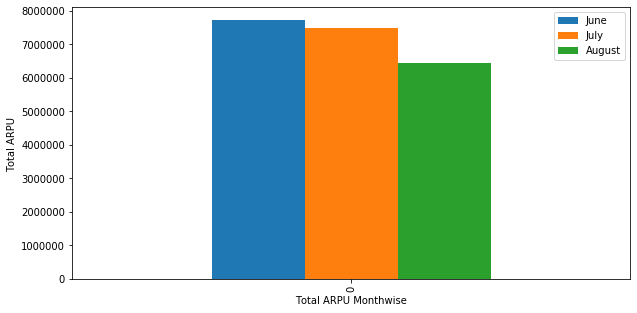

In [63]:
#Calling ARPU
df_eda = pd.DataFrame(data=[[round(churndata.arpu_6.sum(),0),round(churndata.arpu_7.sum(),0),round(churndata.arpu_8.sum(),0),'Total ARPU']],columns=['June','July','August','Description'])
df_eda.loc[(df_eda.index == 0),['June','July','August']].plot.bar(figsize=(10,5))
plt.ylabel("Total ARPU ")
plt.xlabel("Total ARPU Monthwise")

Text(0.5, 0, 'Total Onnet vs Offnet Monthwise')

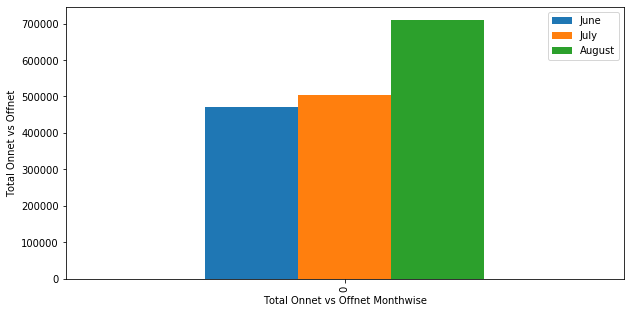

In [64]:
df_eda = pd.DataFrame(data=[[round(churndata.onvsoff_6.sum(),0),round(churndata.onvsoff_7.sum(),0),round(churndata.onvsoff_8.sum(),0),'Onnet vs Offnet']],columns=['June','July','August','Description'])
df_eda.loc[(df_eda.index == 0),['June','July','August']].plot.bar(figsize=(10,5))
plt.ylabel("Total Onnet vs Offnet")
plt.xlabel("Total Onnet vs Offnet Monthwise")

A very interesting observation, while other factors show a decreasing trend over the three months, we see an increase in onnet calling vs offnet calling over the three months.

June      July    August                                        Description
0  470270.0  503979.0  710896.0                                    Onnet vs Offnet
1   46784.0   73132.0  119968.0   Total No. Onnnet calling vs Offnet Calling Churn
2  423486.0  430847.0  590928.0  Total No. Onnet calling vs Offnet Calling Not ...

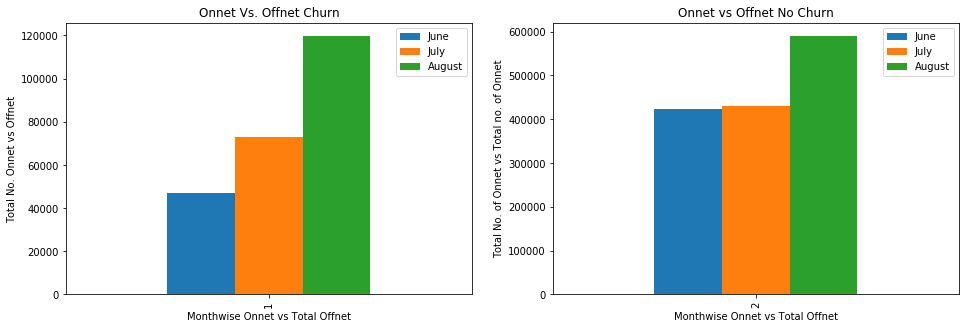

In [65]:
new_row = {'June':round(churndata.loc[(churndata.churn == 1),'onvsoff_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 1),'onvsoff_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 1),'onvsoff_8'].sum(),0),'Description':'Total No. Onnnet calling vs Offnet Calling Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(churndata.loc[(churndata.churn == 0),'onvsoff_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 0),'onvsoff_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 0),'onvsoff_8'].sum(),0),'Description':'Total No. Onnet calling vs Offnet Calling Not Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 1),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. Onnet vs Offnet")
plt.xlabel("Monthwise Onnet vs Total Offnet")
plt.title("Onnet Vs. Offnet Churn")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 2),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total No. of Onnet vs Total no. of Onnet")
plt.xlabel("Monthwise Onnet vs Total Offnet")
plt.title("Onnet vs Offnet No Churn")

#plt.show()
df_eda

June       July     August                                        Description
0   470270.0   503979.0   710896.0                                    Onnet vs Offnet
1    46784.0    73132.0   119968.0   Total No. Onnnet calling vs Offnet Calling Churn
2   423486.0   430847.0   590928.0  Total No. Onnet calling vs Offnet Calling Not ...
3   875602.0   671114.0   203378.0                       Total No.Outgoing MOUs Churn
4  8055868.0  8073699.0  7152013.0               Total No.Outgoing MOUs Without Churn

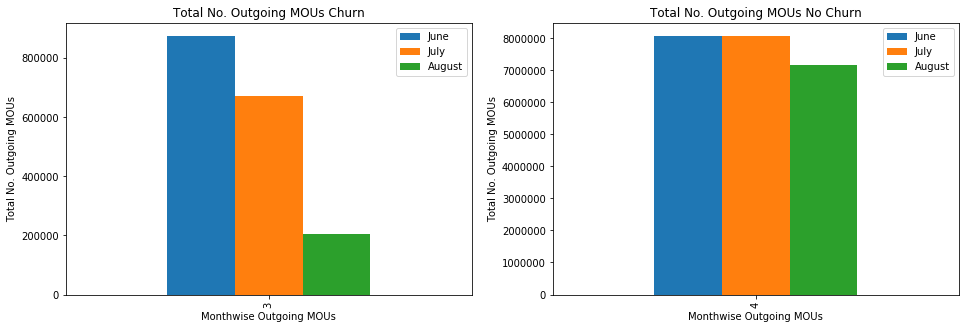

In [66]:
new_row = {'June':round(churndata.loc[(churndata.churn == 1),'total_og_mou_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 1),'total_og_mou_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 1),'total_og_mou_8'].sum(),0),'Description':'Total No.Outgoing MOUs Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(churndata.loc[(churndata.churn == 0),'total_og_mou_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 0),'total_og_mou_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 0),'total_og_mou_8'].sum(),0),'Description':'Total No.Outgoing MOUs Without Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 3),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. Outgoing MOUs")
plt.xlabel("Monthwise Outgoing MOUs")
plt.title("Total No. Outgoing MOUs Churn")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 4),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total No. Outgoing MOUs")
plt.xlabel("Monthwise Outgoing MOUs")
plt.title("Total No. Outgoing MOUs No Churn")

#plt.show()
df_eda

A steady decrease in churned customers for outgoing MOUs whereas a drop only in August for retaining Customers.

June       July     August                                        Description
0   470270.0   503979.0   710896.0                                    Onnet vs Offnet
1    46784.0    73132.0   119968.0   Total No. Onnnet calling vs Offnet Calling Churn
2   423486.0   430847.0   590928.0  Total No. Onnet calling vs Offnet Calling Not ...
3   875602.0   671114.0   203378.0                       Total No.Outgoing MOUs Churn
4  8055868.0  8073699.0  7152013.0               Total No.Outgoing MOUs Without Churn
5   275769.0   215826.0    73104.0                       Total No.Incoming MOUs Churn
6  4081770.0  4105318.0  3945607.0               Total No.Incoming MOUs Without Churn

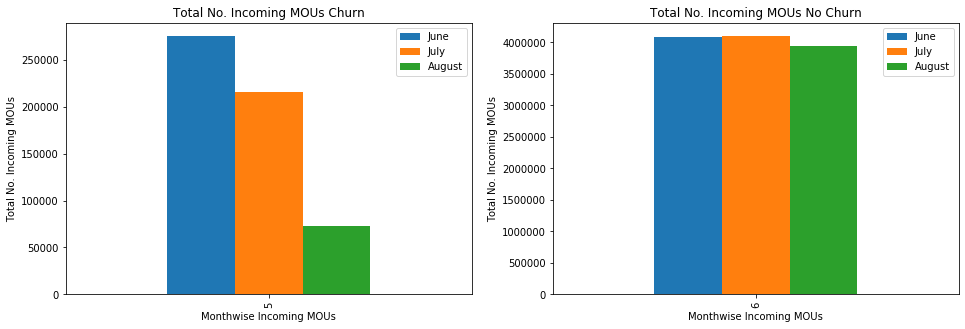

In [67]:
new_row = {'June':round(churndata.loc[(churndata.churn == 1),'total_ic_mou_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 1),'total_ic_mou_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 1),'total_ic_mou_8'].sum(),0),'Description':'Total No.Incoming MOUs Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(churndata.loc[(churndata.churn == 0),'total_ic_mou_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 0),'total_ic_mou_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 0),'total_ic_mou_8'].sum(),0),'Description':'Total No.Incoming MOUs Without Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 5),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. Incoming MOUs")
plt.xlabel("Monthwise Incoming MOUs")
plt.title("Total No. Incoming MOUs Churn")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 6),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total No. Incoming MOUs")
plt.xlabel("Monthwise Incoming MOUs")
plt.title("Total No. Incoming MOUs No Churn")

#plt.show()
df_eda

Similar to outgoing MOUs, a steady decrease in churned customers for outgoing MOUs whereas a drop only in August for retaining Customers.

June       July     August                                        Description
0   470270.0   503979.0   710896.0                                    Onnet vs Offnet
1    46784.0    73132.0   119968.0   Total No. Onnnet calling vs Offnet Calling Churn
2   423486.0   430847.0   590928.0  Total No. Onnet calling vs Offnet Calling Not ...
3   875602.0   671114.0   203378.0                       Total No.Outgoing MOUs Churn
4  8055868.0  8073699.0  7152013.0               Total No.Outgoing MOUs Without Churn
5   275769.0   215826.0    73104.0                       Total No.Incoming MOUs Churn
6  4081770.0  4105318.0  3945607.0               Total No.Incoming MOUs Without Churn
7    75333.0    59356.0    21039.0                                    Total VBC Churn
8  1080726.0  1264567.0  1235642.0                                Total VBC Not Churn

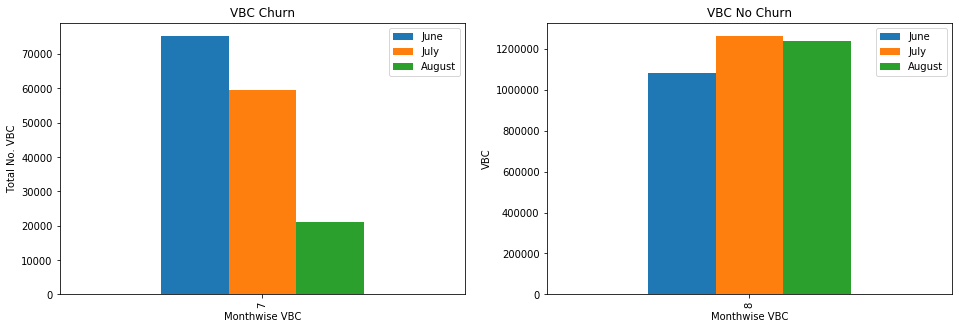

In [68]:
new_row = {'June':round(churndata.loc[(churndata.churn == 1),'jun_vbc_3g'].sum(),0),'July':round(churndata.loc[(churndata.churn == 1),'jul_vbc_3g'].sum(),0),'August':round(churndata.loc[(churndata.churn == 1),'aug_vbc_3g'].sum(),0),'Description':'Total VBC Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(churndata.loc[(churndata.churn == 0),'jun_vbc_3g'].sum(),0),'July':round(churndata.loc[(churndata.churn == 0),'jul_vbc_3g'].sum(),0),'August':round(churndata.loc[(churndata.churn == 0),'aug_vbc_3g'].sum(),0),'Description':'Total VBC Not Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 7),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. VBC")
plt.xlabel("Monthwise VBC")
plt.title("VBC Churn")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 8),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("VBC")
plt.xlabel("Monthwise VBC")
plt.title("VBC No Churn")

#plt.show()
df_eda

June       July     August                                        Description
0    470270.0   503979.0   710896.0                                    Onnet vs Offnet
1     46784.0    73132.0   119968.0   Total No. Onnnet calling vs Offnet Calling Churn
2    423486.0   430847.0   590928.0  Total No. Onnet calling vs Offnet Calling Not ...
3    875602.0   671114.0   203378.0                       Total No.Outgoing MOUs Churn
4   8055868.0  8073699.0  7152013.0               Total No.Outgoing MOUs Without Churn
5    275769.0   215826.0    73104.0                       Total No.Incoming MOUs Churn
6   4081770.0  4105318.0  3945607.0               Total No.Incoming MOUs Without Churn
7     75333.0    59356.0    21039.0                                    Total VBC Churn
8   1080726.0  1264567.0  1235642.0                                Total VBC Not Churn
9      1836.0     1531.0      382.0                         Total Data Recharges Churn
10    20514.0    22545.0    18840.0                      Total Data Recharges No Churn

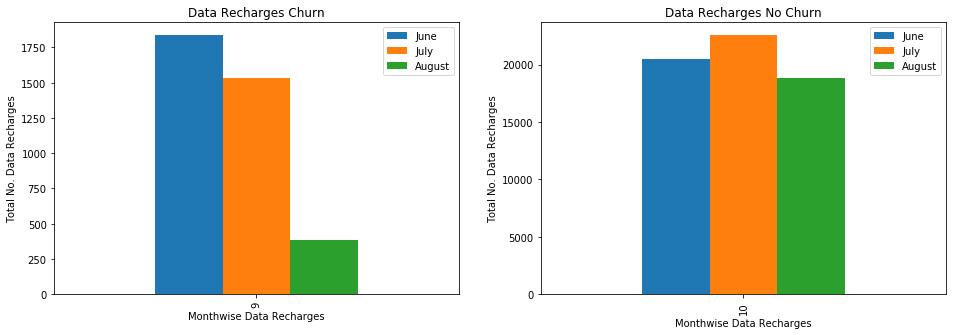

In [69]:
new_row = {'June':round(churndata.loc[(churndata.churn == 1),'total_rech_data_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 1),'total_rech_data_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 1),'total_rech_data_8'].sum(),0),'Description':'Total Data Recharges Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(churndata.loc[(churndata.churn == 0),'total_rech_data_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 0),'total_rech_data_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 0),'total_rech_data_8'].sum(),0),'Description':'Total Data Recharges No Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 9),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. Data Recharges")
plt.xlabel("Monthwise Data Recharges")
plt.title("Data Recharges Churn")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 10),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total No. Data Recharges")
plt.xlabel("Monthwise Data Recharges")
plt.title("Data Recharges No Churn")

#plt.show()
df_eda

June       July     August                                        Description
0    470270.0   503979.0   710896.0                                    Onnet vs Offnet
1     46784.0    73132.0   119968.0   Total No. Onnnet calling vs Offnet Calling Churn
2    423486.0   430847.0   590928.0  Total No. Onnet calling vs Offnet Calling Not ...
3    875602.0   671114.0   203378.0                       Total No.Outgoing MOUs Churn
4   8055868.0  8073699.0  7152013.0               Total No.Outgoing MOUs Without Churn
5    275769.0   215826.0    73104.0                       Total No.Incoming MOUs Churn
6   4081770.0  4105318.0  3945607.0               Total No.Incoming MOUs Without Churn
7     75333.0    59356.0    21039.0                                    Total VBC Churn
8   1080726.0  1264567.0  1235642.0                                Total VBC Not Churn
9      1836.0     1531.0      382.0                         Total Data Recharges Churn
10    20514.0    22545.0    18840.0                      Total Data Recharges No Churn
11    16554.0    13423.0     5742.0                         Total Call Recharges Churn
12   165477.0   160739.0   137982.0                      Total Call Recharges No Churn

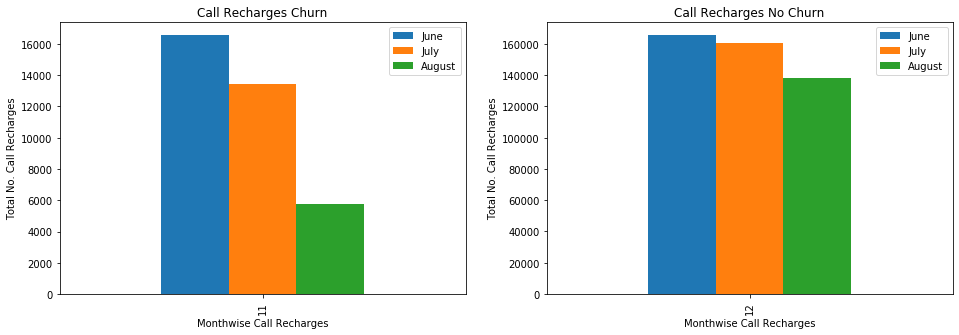

In [70]:
new_row = {'June':round(churndata.loc[(churndata.churn == 1),'total_rech_num_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 1),'total_rech_num_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 1),'total_rech_num_8'].sum(),0),'Description':'Total Call Recharges Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(churndata.loc[(churndata.churn == 0),'total_rech_num_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 0),'total_rech_num_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 0),'total_rech_num_8'].sum(),0),'Description':'Total Call Recharges No Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 11),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. Call Recharges")
plt.xlabel("Monthwise Call Recharges")
plt.title("Call Recharges Churn")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 12),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total No. Call Recharges")
plt.xlabel("Monthwise Call Recharges")
plt.title("Call Recharges No Churn")

#plt.show()
df_eda

#### Age on Network

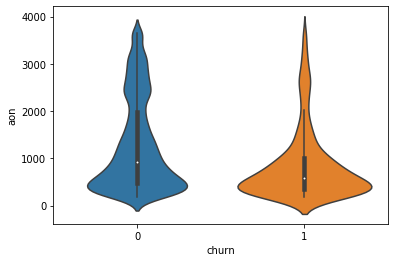

In [71]:
sns.violinplot(x='churn', y='aon', data=churndata)

Interestingly a larger chunk of churned customers have a shorter age on network than non-churn ones, while both seem to have the same number of years on the network.

June       July     August                                        Description
0    470270.0   503979.0   710896.0                                    Onnet vs Offnet
1     46784.0    73132.0   119968.0   Total No. Onnnet calling vs Offnet Calling Churn
2    423486.0   430847.0   590928.0  Total No. Onnet calling vs Offnet Calling Not ...
3    875602.0   671114.0   203378.0                       Total No.Outgoing MOUs Churn
4   8055868.0  8073699.0  7152013.0               Total No.Outgoing MOUs Without Churn
5    275769.0   215826.0    73104.0                       Total No.Incoming MOUs Churn
6   4081770.0  4105318.0  3945607.0               Total No.Incoming MOUs Without Churn
7     75333.0    59356.0    21039.0                                    Total VBC Churn
8   1080726.0  1264567.0  1235642.0                                Total VBC Not Churn
9      1836.0     1531.0      382.0                         Total Data Recharges Churn
10    20514.0    22545.0    18840.0                      Total Data Recharges No Churn
11    16554.0    13423.0     5742.0                         Total Call Recharges Churn
12   165477.0   160739.0   137982.0                      Total Call Recharges No Churn
13      100.0       75.0       18.0                   Total Monthly 3G Recharges Churn
14     1241.0     1242.0     1096.0                Total Monthly 3G Recharges No Churn

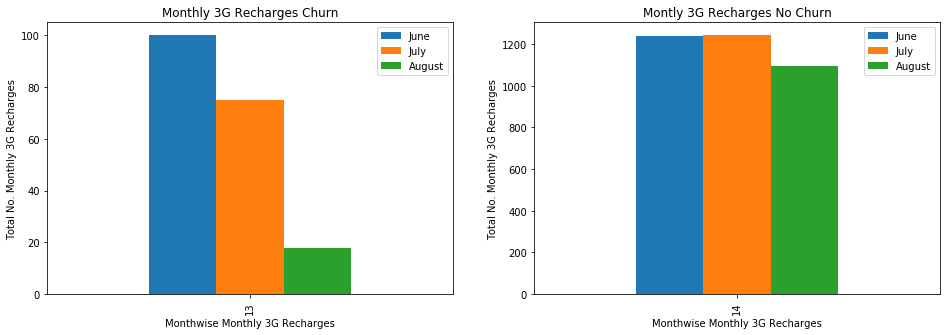

In [72]:
new_row = {'June':round(churndata.loc[(churndata.churn == 1),'monthly_3g_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 1),'monthly_3g_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 1),'monthly_3g_8'].sum(),0),'Description':'Total Monthly 3G Recharges Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(churndata.loc[(churndata.churn == 0),'monthly_3g_6'].sum(),0),'July':round(churndata.loc[(churndata.churn == 0),'monthly_3g_7'].sum(),0),'August':round(churndata.loc[(churndata.churn == 0),'monthly_3g_8'].sum(),0),'Description':'Total Monthly 3G Recharges No Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 13),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. Monthly 3G Recharges")
plt.xlabel("Monthwise Monthly 3G Recharges")
plt.title("Monthly 3G Recharges Churn")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 14),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total No. Monthly 3G Recharges")
plt.xlabel("Monthwise Monthly 3G Recharges")
plt.title("Montly 3G Recharges No Churn")

#plt.show()
df_eda

As seen above, churned customers have lesser time on the network, whereas as time increases, customers have retained themselves on the network

#### The common pattern seen between churned and non-churned customers is that there is a steady, distinct and significantly larger decrease in activity across all aspects for churned customers with a stable response from retained customers. An offbeat observation was with respect to Onnet vs Offnet ratio, both customer segments had an increasing onnet activity. In summary, what can be derived is a difference between the 8th month and the average of the 6th and 7th month for columns that represent totality and the other columns as below, will serve as useful derived features.

### Deriving new features and excluding redundant features

In [74]:
#We drop date columns for lack of relevance
datecols = churndata.select_dtypes(include=['object'])
for cols in datecols.columns:
    churndata.drop(columns=cols, axis=1, inplace=True)

In [78]:
difflist = ['arpu_', 'total_og_mou_' ,'total_ic_mou_', 'total_rech_num_' ,'total_rech_amt_',
 'max_rech_amt_','last_day_rch_amt_','total_rech_data_','max_rech_data_','av_rech_amt_data_',
 'vol_2g_mb_','vol_3g_mb_','monthly_2g_','sachet_2g_','monthly_3g_','sachet_3g_','arpu_2g_', 'arpu_3g_',
 'onvsoff_']

In [79]:
for cols in difflist:
    churndata[cols+'diff'] = churndata[cols+'8'] - ((churndata[cols+'6'] + churndata[cols+'7'])/2)
    if churndata[cols+'diff'].var() == 0:
        churndata.drop(columns=cols+'diff', axis=1, inplace=True)

In [80]:
#Dropping Aggregate Columns and static (single value) columns
churndata.drop(columns=colsDrop, axis=1, inplace=True)
for cols in churndata.columns:
    if churndata[cols].var() == 0:
        churndata.drop(columns=cols, axis=1, inplace=True)

In [81]:
churndata.shape

(16729, 154)

In [82]:
churndata.churn.value_counts()/churndata.churn.shape[0]

0    0.922769
1    0.077231
Name: churn, dtype: float64

Class imbalance as seen in the final list above, will be addressed by penalizing the algorithms using the parameter class_weight='balanced'.

### PCA

### Data Preprocessing

In [83]:
#Excluding categorical features, target variable and mobile_number (identifier)
df = churndata[churndata.columns.difference(['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7',
                             'night_pck_user_8','churn','mobile_number'])]

In [84]:
df.shape

(16729, 146)

#### Data Standardization

In [85]:
normalized_df=(df-df.mean())/df.std()
normalized_df.shape
normalized_df=pd.concat([normalized_df , churndata[['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7',
                             'night_pck_user_8']]], axis=1)

In [86]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = normalized_df
# Putting response variable to y
y = churndata['churn']

In [87]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [88]:
#Importing PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [89]:
#PCA on training data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [90]:
#Checking PCA components
pca.components_

array([[ 3.88541382e-03,  1.41285300e-01,  1.41691038e-01, ...,
         9.13123992e-02,  9.15032212e-02,  7.61210889e-02],
       [ 1.02505875e-01,  6.15393352e-02,  8.34053393e-02, ...,
        -2.26334424e-02, -1.39543414e-02,  1.53805321e-02],
       [ 4.69808806e-03,  1.30632608e-01,  8.86200035e-02, ...,
        -5.04250629e-03, -2.77250175e-02, -8.89717405e-02],
       ...,
       [-0.00000000e+00,  2.28377272e-02,  2.22341106e-02, ...,
         2.98372438e-16,  2.63677968e-16,  4.92661467e-16],
       [-0.00000000e+00, -1.10389709e-02, -1.07472034e-02, ...,
         3.01841885e-16, -2.74086309e-16,  6.90419943e-16],
       [-0.00000000e+00, -1.22292769e-01, -1.19060488e-01, ...,
        -8.67361738e-18,  3.74700271e-16,  1.38777878e-16]])

In [91]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2       Feature
0  0.003885  0.102506           aon
1  0.141285  0.061539     arpu_2g_6
2  0.141691  0.083405     arpu_2g_7
3  0.126125  0.123650     arpu_2g_8
4 -0.036714  0.044536  arpu_2g_diff

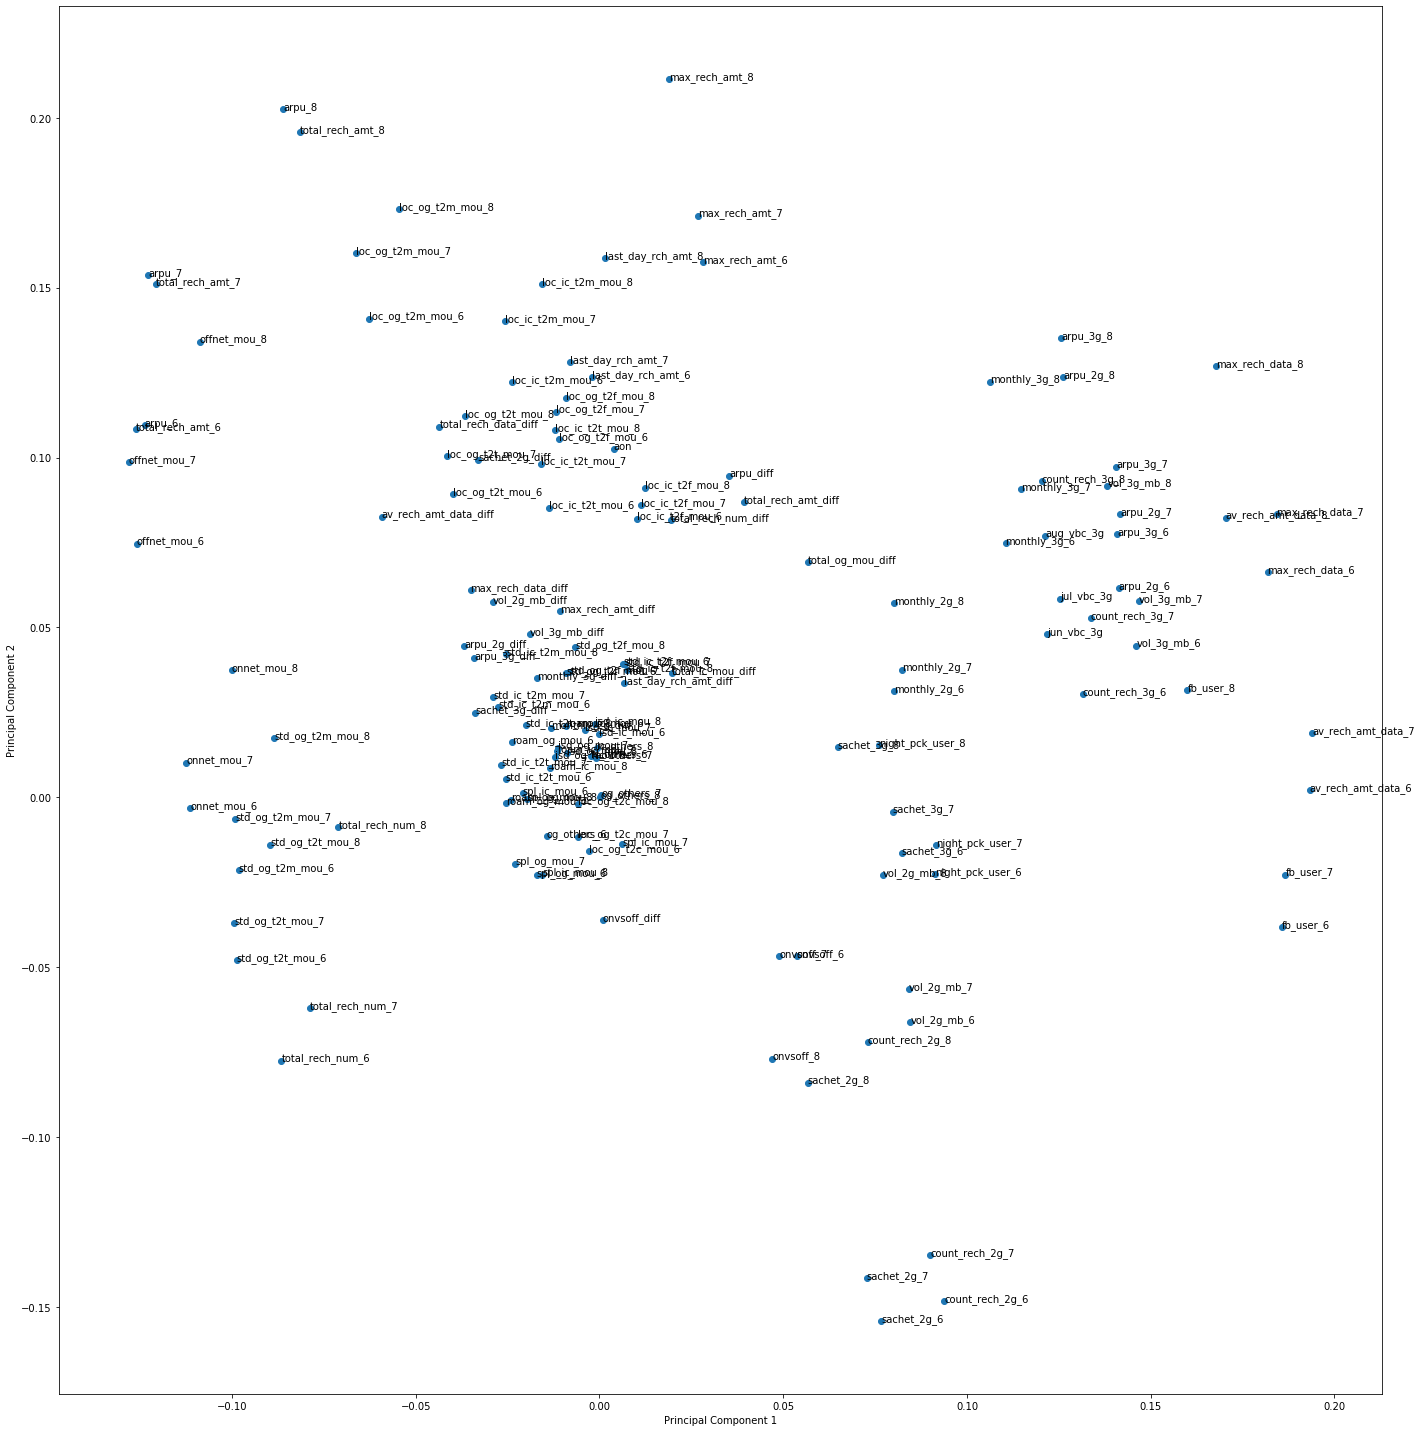

In [92]:
%matplotlib inline
fig = plt.figure(figsize = (20,20))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

The first component is heavy towards the direction of data charges.

#### Scree Plot to check variance

In [93]:
pca.explained_variance_ratio_

array([1.12231081e-01, 7.26514782e-02, 5.26026963e-02, 4.17601952e-02,
       3.21657657e-02, 3.13736938e-02, 2.92192078e-02, 2.48266068e-02,
       2.28257941e-02, 2.18936785e-02, 1.97463055e-02, 1.90174999e-02,
       1.84816021e-02, 1.79829426e-02, 1.71765610e-02, 1.69963092e-02,
       1.64589863e-02, 1.60284222e-02, 1.55133402e-02, 1.53600189e-02,
       1.39140394e-02, 1.36379499e-02, 1.24166674e-02, 1.17973718e-02,
       1.13885223e-02, 1.12567177e-02, 1.09063912e-02, 1.07695888e-02,
       1.06883530e-02, 1.02490024e-02, 9.97012318e-03, 9.86937397e-03,
       9.49997562e-03, 9.07742542e-03, 8.94284390e-03, 8.79450241e-03,
       8.00790643e-03, 7.37956237e-03, 7.25099168e-03, 6.92920663e-03,
       6.64747083e-03, 6.41846605e-03, 6.27044176e-03, 6.04196443e-03,
       5.75029356e-03, 5.52445257e-03, 5.20346752e-03, 5.04903414e-03,
       4.82917646e-03, 4.68372366e-03, 4.63413068e-03, 4.46003925e-03,
       4.37339864e-03, 4.04388490e-03, 3.94401203e-03, 3.93563244e-03,
      

In [94]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.22
1       18.49
2       23.75
3       27.92
4       31.14
5       34.28
6       37.20
7       39.68
8       41.97
9       44.16
10      46.13
11      48.03
12      49.88
13      51.68
14      53.40
15      55.10
16      56.74
17      58.34
18      59.90
19      61.43
20      62.82
21      64.19
22      65.43
23      66.61
24      67.75
25      68.87
26      69.96
27      71.04
28      72.11
29      73.13
30      74.13
31      75.12
32      76.07
33      76.98
34      77.87
35      78.75
36      79.55
37      80.29
38      81.01
39      81.71
40      82.37
41      83.01
42      83.64
43      84.24
44      84.82
45      85.37
46      85.89
47      86.40
48      86.88
49      87.35
50      87.81
51      88.26
52      88.69
53      89.10
54      89.49
55      89.89
56      90.27
57      90.62
58      90.96
59      91.29
60      91.60
61      91.90
62      92.19
63      92.47
64      92.75
65      93.01
66      93.25
67      93.49
68      93.72
69      93.95
70      94.17
71    

In [95]:
np.cumsum(pca.explained_variance_ratio_)

array([0.11223108, 0.18488256, 0.23748526, 0.27924545, 0.31141122,
       0.34278491, 0.37200412, 0.39683073, 0.41965652, 0.4415502 ,
       0.4612965 , 0.480314  , 0.49879561, 0.51677855, 0.53395511,
       0.55095142, 0.5674104 , 0.58343883, 0.59895217, 0.61431219,
       0.62822623, 0.64186417, 0.65428084, 0.66607821, 0.67746674,
       0.68872345, 0.69962985, 0.71039943, 0.72108779, 0.73133679,
       0.74130691, 0.75117629, 0.76067626, 0.76975369, 0.77869653,
       0.78749103, 0.79549894, 0.8028785 , 0.81012949, 0.8170587 ,
       0.82370617, 0.83012464, 0.83639508, 0.84243704, 0.84818734,
       0.85371179, 0.85891526, 0.86396429, 0.86879347, 0.87347719,
       0.87811132, 0.88257136, 0.88694476, 0.89098865, 0.89493266,
       0.89886829, 0.9026689 , 0.90618941, 0.9095958 , 0.912921  ,
       0.91601803, 0.91898121, 0.92187113, 0.92472347, 0.92754515,
       0.93008795, 0.93250931, 0.93488859, 0.93724935, 0.93949478,
       0.9416716 , 0.94381109, 0.94593708, 0.94797623, 0.94998

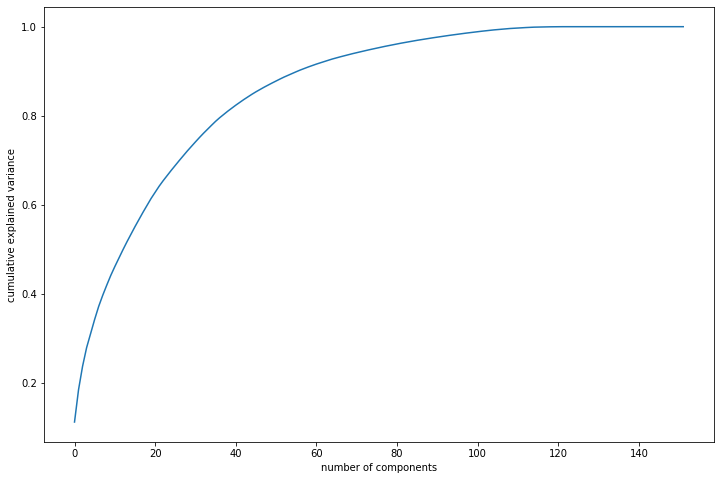

In [96]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### We will choose 80 components as they explain 95% variance

In [97]:

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=80)

In [98]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(11710, 80)

In [99]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

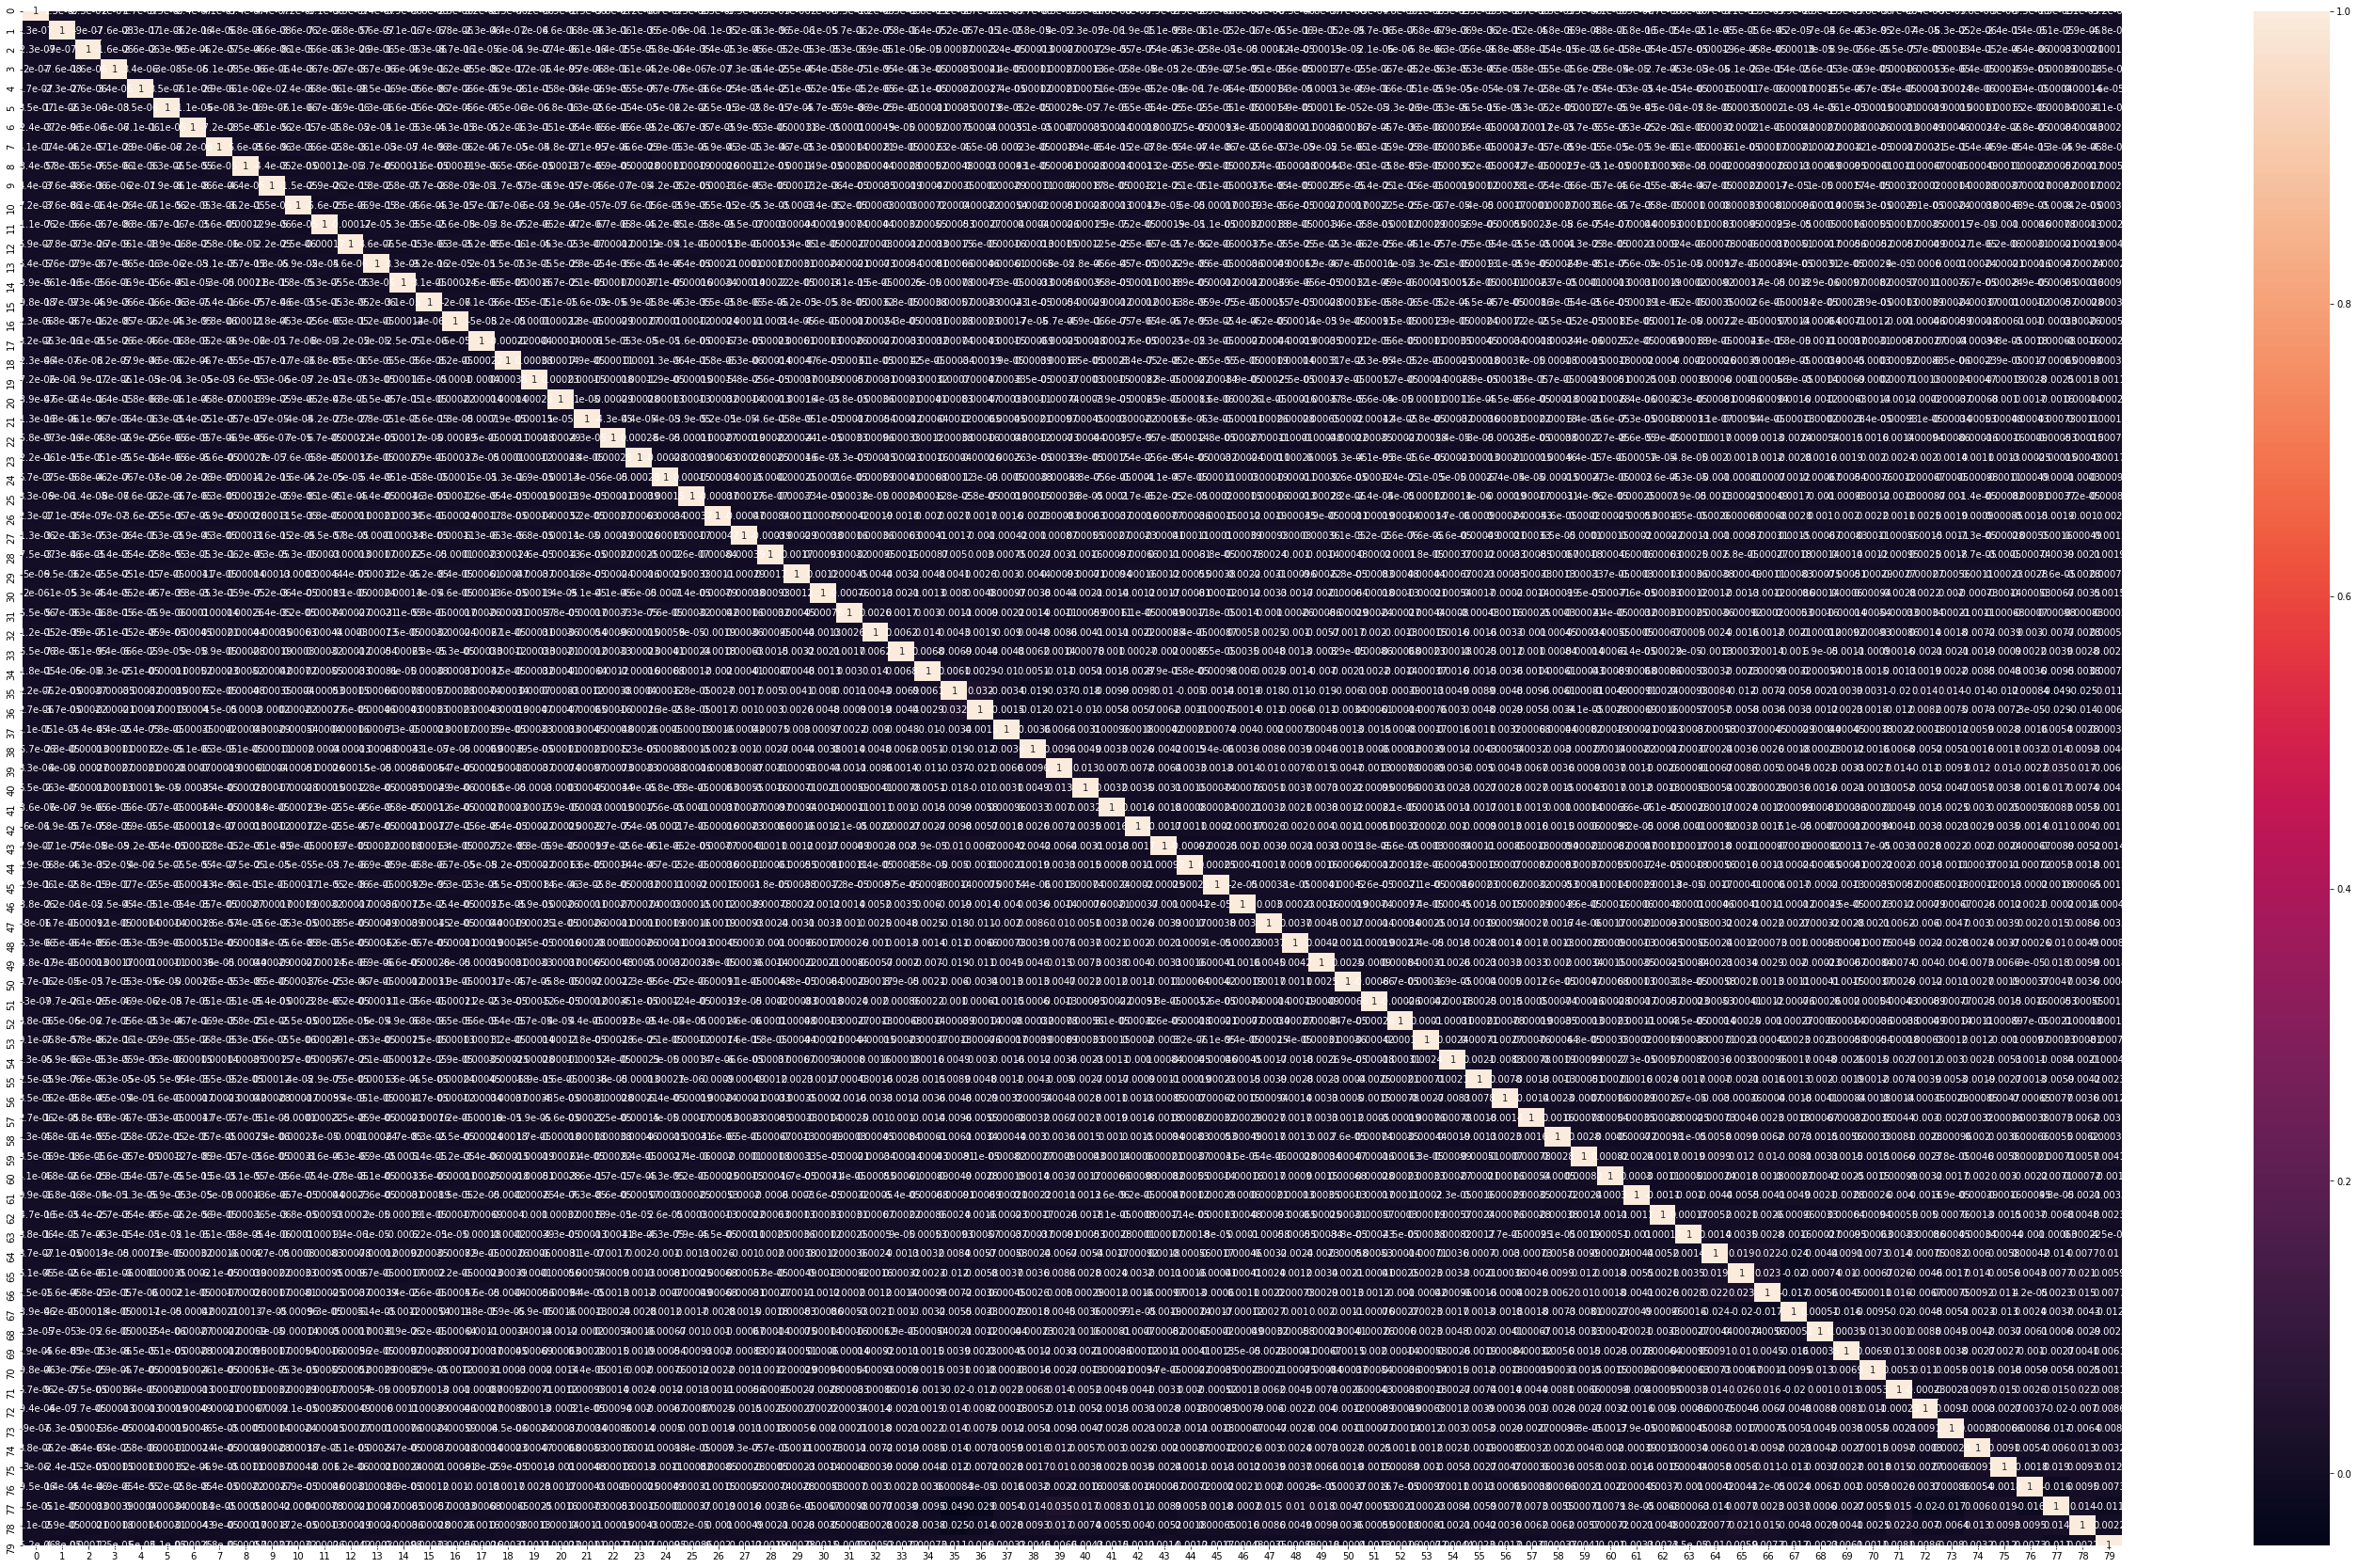

In [100]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (50,30))
sns.heatmap(corrmat,annot = True)

In [101]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.03501439652162794 , min corr:  -0.049201511206042096


#### Low correlations in the matrix signal a healthy dataset

In [102]:
#Applying selected components to the test data - 80 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5019, 80)

In [103]:
df_train_pca

array([[-2.50866935,  2.75310618, -0.61573547, ..., -0.05225967,
         0.31489827,  0.30830246],
       [-2.69950515, -0.97345371,  0.85437386, ..., -0.18101884,
         0.14549875, -0.13310335],
       [ 4.39857388, -5.1537612 , -1.62163673, ...,  1.89166173,
         0.73179984,  0.05991958],
       ...,
       [-5.4318716 ,  1.9276794 ,  0.42628081, ...,  0.1473314 ,
         0.74970798,  0.45321233],
       [ 0.46698992,  6.74451578,  4.01079074, ..., -0.52840906,
         0.30307231, -0.75559008],
       [ 7.46116254, -2.49582073,  4.72474109, ...,  0.4908667 ,
        -0.16538335,  1.04103587]])

In [104]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [105]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.91'

In [106]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred_probs_test.round())

In [107]:
print(classification_report(y_test,pred_probs_test.round()))

              precision    recall  f1-score   support

           0       0.99      0.84      0.90      4632
           1       0.30      0.85      0.45       387

    accuracy                           0.84      5019
   macro avg       0.64      0.84      0.68      5019
weighted avg       0.93      0.84      0.87      5019



In [108]:
print(accuracy_score(y_test,pred_probs_test.round()))

0.8370193265590755


In [109]:
print("Sensitivity/Recall : {0}".format(metrics.recall_score(y_test, pred_probs_test.round())))

Sensitivity/Recall : 0.8501291989664083


### SVM

In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#LINEAR MODEL
model_linear = SVC(kernel='linear', class_weight='balanced')
model_linear.fit(df_train_pca, y_train)

# predict
y_pred = model_linear.predict(df_test_pca)

In [111]:
df_test_pca

array([[-3.93316919e+00,  1.28207231e+00, -1.63496613e-01, ...,
        -9.33809646e-02,  1.17416575e-02,  5.24845885e-02],
       [-1.89336750e+00, -2.72895670e+00, -1.43095077e+00, ...,
         3.90769701e-01, -4.45084737e-01,  7.78397646e-01],
       [-3.54208712e+00,  1.30784131e+00, -1.08278243e+00, ...,
        -2.19207434e-01,  1.30879860e-02,  1.97529261e-01],
       ...,
       [ 5.93646834e+00, -3.84251817e+00, -6.60326454e+00, ...,
        -7.36005643e-01,  4.61145089e-01,  5.82421487e-01],
       [-5.76244811e+00,  2.32127593e+00,  1.91472432e-01, ...,
         1.55335205e-01, -2.18300571e-01,  9.18913968e-02],
       [-4.73021190e+00, -2.07982470e-01, -1.73246701e-01, ...,
        -2.08813378e-03,  6.51145602e-02,  7.83518884e-02]])

In [112]:
# Confusion Matrix: accuracy and sensitivity

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print("Sensitivity : {0}".format(metrics.recall_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      4632
           1       0.32      0.83      0.46       387

    accuracy                           0.85      5019
   macro avg       0.65      0.84      0.69      5019
weighted avg       0.93      0.85      0.88      5019

accuracy: 0.8503685993225742 

Sensitivity : 0.8294573643410853


In [113]:
#Using Non Linear Model

In [114]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf',class_weight='balanced')

# fit
non_linear_model.fit(df_train_pca, y_train)

# predict
y_pred = non_linear_model.predict(df_test_pca)

In [115]:
# Confusion Matrix: accuracy and sensitivity

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print("Sensitivity : {0}".format(metrics.recall_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4632
           1       0.44      0.69      0.53       387

    accuracy                           0.91      5019
   macro avg       0.70      0.81      0.74      5019
weighted avg       0.93      0.91      0.92      5019

accuracy: 0.9071528192867105 

Sensitivity : 0.6873385012919897


In [116]:
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

'0.81'

Using GridSearch we will check if tuning helps achieve a better accurate model

In [117]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf",class_weight='balanced')

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca, y_train)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [118]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C param_gamma                        params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0        5.495409      0.657033         0.794486        0.090280       1        0.01       {'C': 1, 'gamma': 0.01}           0.901793           0.898377           0.898804           0.881725           0.903074         0.896755        0.007721                5            0.930508            0.930081            0.932323            0.933177            0.929334          0.931085         0.001436
1        6.424233      1.780620         0.861512        0.105203       1       0.001      {'C': 1, 'gamma': 0.001}           0.859522           0.869769           0.846285           0.842869           0.866781         0.857045        0.010766                9            0.859522            0.857600            0.865820            0.867528            0.863044          0.862703         0.003722
2        7.005081      0.116055         1.002554        0.013652       1      0.0001     {'C': 1, 'gamma': 0.0001}           0.850555           0.857814           0.834330           0.830487           0.855252         0.845687        0.011156               12            0.843190            0.838493            0.852370            0.852156            0.845965          0.846435         0.005325
3        3.994269      0.487843         0.556982        0.102217      10        0.01      {'C': 10, 'gamma': 0.01}           0.918019           0.927839           0.918019           0.912895           0.926132         0.920581        0.005580                3            0.983027            0.981319            0.983134            0.983881            0.983027          0.982878         0.000842
4        5.512532      0.711149         0.794789        0.137669      10       0.001     {'C': 10, 'gamma': 0.001}           0.871904           0.880017           0.870623           0.859095           0.882152         0.872758        0.008160                7            0.889411            0.891759            0.892613            0.893787            0.890585          0.891631         0.001527
5        6.180879      0.749543         0.957442        0.236040      10      0.0001    {'C': 10, 'gamma': 0.0001}           0.857387           0.862084           0.839026           0.839880           0.860803         0.851836        0.010230               11            0.850235            0.847566            0.851729            0.859629            0.850875          0.852007         0.004057
6        3.617455      0.074779         0.433630        0.007549     100        0.01     {'C': 100, 'gamma': 0.01}           0.917592           0.927839           0.916738           0.918873           0.925705         0.921349        0.004530                1            0.998719            0.998612            0.999039            0.998719            0.998506          0.998719         0.000179
7        5.425705      0.290295         0.535505        0.008821     100       0.001    {'C': 100, 'gamma': 0.001}           0.891546           0.894108           0.897096           0.877028           0.895389         0.891033        0.007233                6            0.932857            0.932643            0.937767            0.937447            0.932536          0.934650         0.002419
8        6.168921      0.791926         0.821593        0.136805     100      0.0001   {'C': 100, 'gamma': 0.0001}           0.856960           0.867208           0.846712           0.844150           0.868488         0.856704        0.010067               10            0.859629            0.857600            0.859629            0.870090            0.861230          0.861635         0.004381
9        4.077988      0.221789         0.453592      

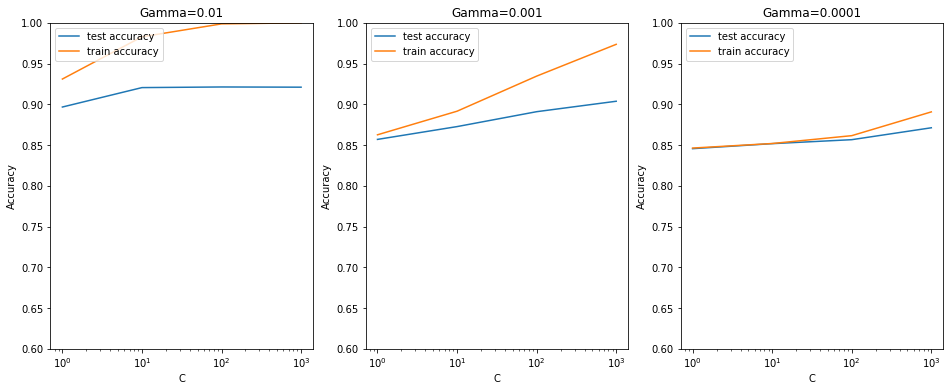

In [119]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



In [120]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9213492741246797 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [128]:
# model with optimal hyperparameters

# model
model = SVC(C=100, gamma=0.01, kernel="rbf", class_weight='balanced')

model.fit(df_train_pca, y_train)
y_pred = model.predict(df_test_pca)

# metrics
print(classification_report(y_test,y_pred))
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print("Sensitivity : {0}".format(metrics.recall_score(y_test, y_pred)))



              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4632
           1       0.50      0.48      0.49       387

    accuracy                           0.92      5019
   macro avg       0.73      0.72      0.72      5019
weighted avg       0.92      0.92      0.92      5019

accuracy 0.9234907352062164 

Sensitivity : 0.4754521963824289


### Random Forest

In [143]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [144]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [145]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [146]:
# Let's check the report of Random Forest
print(classification_report(y_test,predictions))
print("accuracy", metrics.accuracy_score(y_test, predictions), "\n")
print("Sensitivity : {0}".format(metrics.recall_score(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4632
           1       0.54      0.13      0.21       387

    accuracy                           0.92      5019
   macro avg       0.73      0.56      0.59      5019
weighted avg       0.90      0.92      0.90      5019

accuracy 0.9242877067144849 

Sensitivity : 0.1343669250645995


#### As seen with models, Random Forest provides the best accuracy among the ones tested. However we need to address the sensitivity as well which is the lowest in Random Forest.

## Approach-2

Let's load the file into dataframe

In [5]:
telecom = pd.read_csv('telecom_churn_data.csv')

In [6]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  \
0     7000842753        109            0.00            0.00            0.00            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.38  214.82  213.80   21.10          nan          nan         0.00          nan           nan           nan          0.00           nan            nan            nan           0.00            nan            nan            nan           0.00            nan               nan               nan              0.00               nan               nan               nan              0.00               nan               nan               nan              0.00               nan               nan               nan              0.00               nan           nan           nan          0.00           nan               nan               nan              0.00               nan               nan               nan              0.00               nan               nan               nan              0.00               nan               nan   
1     7001865778        109            0.00            0.00            0.00            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.05  355.07  268.32   86.28        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00              0.00              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00              0.00              0.00   
2     7001625959        109            0.00            0.00            0.00            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.69  189.06  210.23  290.71        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91           0.00           0.00           0.00          38.49           0.00           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24              0.00            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83              0.00              0.00   

check the dataframe shape 

In [7]:
telecom.shape

(99999, 226)

Checking the Columnwise Percentage of Null values

In [8]:
null_column_percent = pd.DataFrame(data = round(100* ( telecom.isnull().sum() / telecom.shape[0] ),2))
null_column_percent.reset_index(inplace=True)
null_column_percent.columns = ['Columns','Null_Percent']
null_column_percent.head()

Columns  Null_Percent
0   mobile_number          0.00
1       circle_id          0.00
2  loc_og_t2o_mou          1.02
3  std_og_t2o_mou          1.02
4  loc_ic_t2o_mou          1.02

Drop the Columns which have > 90% NULL values

In [9]:
null_column_percent.loc[(null_column_percent.Null_Percent >= 90 )]

Empty DataFrame
Columns: [Columns, Null_Percent]
Index: []

As No any columns having more than 90% NULL

<B> Let's Impute the Null Values

In [10]:
telecom.mobile_number.isnull().sum()

0

In [11]:
telecom.circle_id.isnull().sum()

0

In [12]:
telecom.loc_og_t2o_mou.isnull().sum()

1018

In [13]:
telecom.std_og_t2o_mou.isnull().sum()

1018

In [14]:
telecom.loc_ic_t2o_mou.isnull().sum()

1018

In [15]:
len(telecom.loc[( telecom.loc_og_t2o_mou.isnull() == True ) & ( telecom.std_og_t2o_mou.isnull() == True ) & ( telecom.loc_ic_t2o_mou.isnull() == True )])

1018

In [16]:
telecom.loc_og_t2o_mou.value_counts()

0.00    98981
Name: loc_og_t2o_mou, dtype: int64

In [17]:
telecom.std_og_t2o_mou.value_counts()


0.00    98981
Name: std_og_t2o_mou, dtype: int64

In [18]:
telecom.loc_ic_t2o_mou.value_counts()

0.00    98981
Name: loc_ic_t2o_mou, dtype: int64

In [19]:
### Percentage
round(100 * ( 98981 / telecom.shape[0] ),2)

98.98

Based on above statistics we can say that above 3 columns already hold 99% data as 0 value so remaining 1% blank value we are
imputing with 0 .

In [20]:
telecom[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']] = telecom[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].fillna(0) 

Let's work on last_date_of_month

In [21]:
telecom.last_date_of_month_6.isnull().sum()

0

In [22]:
telecom.last_date_of_month_6.value_counts()

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64

In [23]:
telecom.last_date_of_month_7.isnull().sum()

601

In [24]:
telecom.last_date_of_month_7.value_counts()

7/31/2014    99398
Name: last_date_of_month_7, dtype: int64

In [25]:
telecom.last_date_of_month_8.isnull().sum()

1100

In [26]:
telecom.last_date_of_month_8.value_counts()

8/31/2014    98899
Name: last_date_of_month_8, dtype: int64

In [27]:
telecom.last_date_of_month_9.isnull().sum()

1659

In [28]:
telecom.last_date_of_month_9.value_counts()

9/30/2014    98340
Name: last_date_of_month_9, dtype: int64

As it holds the last date of the respective month so all missing value imputes with last day of that month

In [29]:
### Jun month data not contains any missing value
telecom['last_date_of_month_7'] = telecom['last_date_of_month_7'].fillna('7/31/2014')
telecom['last_date_of_month_8'] = telecom['last_date_of_month_8'].fillna('8/31/2014')
telecom['last_date_of_month_9'] = telecom['last_date_of_month_9'].fillna('9/30/2014')

Let's check the arpu columns information

In [30]:
telecom.arpu_6.isnull().sum()

0

In [31]:
telecom.arpu_7.isnull().sum()

0

In [32]:
telecom.arpu_8.isnull().sum()

0

In [33]:
telecom.arpu_9.isnull().sum()

0

Let's check all Calling Columns. After Analysing columns releated to calling i found below pattern

**Incoming**

'loc_ic_mou_6' = 'loc_ic_t2t_mou_6' + 'loc_ic_t2m_mou_6' + 'loc_ic_t2f_mou_6' 

'loc_ic_mou_7' = 'loc_ic_t2t_mou_7' + 'loc_ic_t2m_mou_7' + 'loc_ic_t2f_mou_7'  

'loc_ic_mou_8' = 'loc_ic_t2t_mou_8' + 'loc_ic_t2m_mou_8' + 'loc_ic_t2f_mou_8'  

'loc_ic_mou_9' = 'loc_ic_t2t_mou_9' + 'loc_ic_t2m_mou_9' + 'loc_ic_t2f_mou_9'  

'std_ic_mou_6' = 'std_ic_t2t_mou_6' + 'std_ic_t2m_mou_6' + 'std_ic_t2f_mou_6' 

'std_ic_mou_7' = 'std_ic_t2t_mou_7' + 'std_ic_t2m_mou_7' + 'std_ic_t2f_mou_7' 

'std_ic_mou_8' = 'std_ic_t2t_mou_8' + 'std_ic_t2m_mou_8' + 'std_ic_t2f_mou_8' 

'std_ic_mou_9' = 'std_ic_t2t_mou_9' + 'std_ic_t2m_mou_9' + 'std_ic_t2f_mou_9' 

'total_ic_mou_6' == ( 'isd_ic_mou_6' + 'spl_ic_mou_6' + 'ic_others_6' +  'loc_ic_mou_6' + 'std_ic_mou_6' ) 

'total_ic_mou_7' == ( 'isd_ic_mou_7' + 'spl_ic_mou_7' + 'ic_others_7' +  'loc_ic_mou_7' + 'std_ic_mou_7' ) 

'total_ic_mou_8' == ( 'isd_ic_mou_8' + 'spl_ic_mou_8' + 'ic_others_8' + 'loc_ic_mou_8' + 'std_ic_mou_8' ) 

'total_ic_mou_9' == ( 'isd_ic_mou_9' + 'spl_ic_mou_9' + 'ic_others_9' + 'loc_ic_mou_9' + 'std_ic_mou_9' ) 


**Outgoing :**
   
   
'loc_og_mou_6' = ('loc_og_t2t_mou_6' + 'loc_og_t2m_mou_6' + 'loc_og_t2f_mou_6')

'loc_og_mou_7' = ('loc_og_t2t_mou_7' + 'loc_og_t2m_mou_7' + 'loc_og_t2f_mou_7')

'loc_og_mou_8' = ('loc_og_t2t_mou_8' + 'loc_og_t2m_mou_8' + 'loc_og_t2f_mou_8')

'loc_og_mou_9' = ('loc_og_t2t_mou_9' + 'loc_og_t2m_mou_9' + 'loc_og_t2f_mou_9')

   
'std_og_mou_6' = ('std_og_t2t_mou_6' + 'std_og_t2m_mou_6' + 'std_og_t2f_mou_6' )

'std_og_mou_7'=  ('std_og_t2t_mou_7' + 'std_og_t2m_mou_7' + 'std_og_t2f_mou_7' )

'std_og_mou_8'=  ('std_og_t2t_mou_8' + 'std_og_t2m_mou_8' + 'std_og_t2f_mou_8' )

'std_og_mou_9'=  ('std_og_t2t_mou_9' + 'std_og_t2m_mou_9' + 'std_og_t2f_mou_9' )

'total_og_mou_6' == ('isd_og_mou_6' + 'spl_og_mou_6' + 'og_others_6' +  'loc_og_mou_6' + 'std_og_mou_6' ) 

'total_og_mou_7' == ('isd_og_mou_7' + 'spl_og_mou_7' + 'og_others_7' +  'loc_og_mou_7' + 'std_og_mou_7' ) 

'total_og_mou_8' == ('isd_og_mou_8' + 'spl_og_mou_8' + 'og_others_8' +  'loc_og_mou_8' + 'std_og_mou_8' ) 

'total_og_mou_9' == ('isd_og_mou_9' + 'spl_og_mou_9' + 'og_others_9' +  'loc_og_mou_9' + 'std_og_mou_9' ) 

So after replacing all NaN value columns belongs to outgoing (og) & incoming (ic) like loc_og_mou_ with 0 we got 'total_og_mou_X' / 'total_ic_mou_X' which is exactly matching with actual total values.


Let's impute all incoming columns with 0

In [34]:
telecom[['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6','std_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6','roam_ic_mou_6']] = telecom[['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6','std_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6','roam_ic_mou_6']].fillna(0)

In [35]:
telecom[['loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','std_ic_mou_7','isd_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7','roam_ic_mou_7']] = telecom[['loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','std_ic_mou_7','isd_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7','roam_ic_mou_7']].fillna(0)

In [36]:
telecom[['loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','std_ic_mou_8','isd_ic_mou_8','spl_ic_mou_8','ic_others_8','total_ic_mou_8','roam_ic_mou_8']] = telecom[['loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','std_ic_mou_8','isd_ic_mou_8','spl_ic_mou_8','ic_others_8','total_ic_mou_8','roam_ic_mou_8']].fillna(0)

In [37]:
telecom[['loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9','isd_ic_mou_9','spl_ic_mou_9','ic_others_9','total_ic_mou_9','roam_ic_mou_9']] = telecom[['loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9','isd_ic_mou_9','spl_ic_mou_9','ic_others_9','total_ic_mou_9','roam_ic_mou_9']].fillna(0)

Let's Impute all outgoing Columns with 0

In [38]:
telecom[['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_t2c_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','roam_og_mou_6','total_og_mou_6']] = telecom[['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_t2c_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','roam_og_mou_6','total_og_mou_6']].fillna(0)

In [39]:
telecom[['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_t2c_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','roam_og_mou_7','total_og_mou_7']] = telecom[['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_t2c_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','roam_og_mou_7','total_og_mou_7']].fillna(0)

In [40]:
telecom[['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_t2c_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','roam_og_mou_8','total_og_mou_8']] = telecom[['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_t2c_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','roam_og_mou_8','total_og_mou_8']].fillna(0)

In [41]:
telecom[['loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','roam_og_mou_9','total_og_mou_9']] = telecom[['loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','roam_og_mou_9','total_og_mou_9']].fillna(0)

Let's Check the Null Percent

In [43]:
null_column_percent = pd.DataFrame(data = round(100* ( telecom.isnull().sum() / telecom.shape[0] ),2))
null_column_percent.reset_index(inplace=True)
null_column_percent.columns = ['Columns','Null_Percent']
null_column_percent.loc[(null_column_percent.Null_Percent > 0 )]

Columns  Null_Percent
13                onnet_mou_6          3.94
14                onnet_mou_7          3.86
15                onnet_mou_8          5.38
16                onnet_mou_9          7.75
17               offnet_mou_6          3.94
18               offnet_mou_7          3.86
19               offnet_mou_8          5.38
20               offnet_mou_9          7.75
149       date_of_last_rech_6          1.61
150       date_of_last_rech_7          1.77
151       date_of_last_rech_8          3.62
152       date_of_last_rech_9          4.76
157  date_of_last_rech_data_6         74.85
158  date_of_last_rech_data_7         74.43
159  date_of_last_rech_data_8         73.66
160  date_of_last_rech_data_9         74.08
161         total_rech_data_6         74.85
162         total_rech_data_7         74.43
163         total_rech_data_8         73.66
164         total_rech_data_9         74.08
165           max_rech_data_6         74.85
166           max_rech_data_7         74.43
167           max_rech_data_8         73.66
168           max_rech_data_9         74.08
169           count_rech_2g_6         74.85
170           count_rech_2g_7         74.43
171           count_rech_2g_8         73.66
172           count_rech_2g_9         74.08
173           count_rech_3g_6         74.85
174           count_rech_3g_7         74.43
175           count_rech_3g_8         73.66
176           count_rech_3g_9         74.08
177        av_rech_amt_data_6         74.85
178        av_rech_amt_data_7         74.43
179        av_rech_amt_data_8         73.66
180        av_rech_amt_data_9         74.08
189                 arpu_3g_6         74.85
190                 arpu_3g_7         74.43
191                 arpu_3g_8         73.66
192                 arpu_3g_9         74.08
193                 arpu_2g_6         74.85
194                 arpu_2g_7         74.43
195                 arpu_2g_8         73.66
196                 arpu_2g_9         74.08
197          night_pck_user_6         74.85
198          night_pck_user_7         74.43
199          night_pck_user_8         73.66
200          night_pck_user_9         74.08
217                 fb_user_6         74.85
218                 fb_user_7         74.43
219                 fb_user_8         73.66
220                 fb_user_9         74.08

Insted of storing the entire date we store only "Day" in the Column "date_of_last_rech_data_" and 'date_of_last_rech_"


In [44]:
telecom['date_of_last_rech_data_6'] = pd.to_datetime(telecom['date_of_last_rech_data_6'])
telecom['date_of_last_rech_data_7'] = pd.to_datetime(telecom['date_of_last_rech_data_7'])
telecom['date_of_last_rech_data_8'] = pd.to_datetime(telecom['date_of_last_rech_data_8'])
telecom['date_of_last_rech_data_9'] = pd.to_datetime(telecom['date_of_last_rech_data_9'])

telecom['date_of_last_rech_data_6'] = telecom['date_of_last_rech_data_6'].dt.day
telecom['date_of_last_rech_data_7'] = telecom['date_of_last_rech_data_7'].dt.day
telecom['date_of_last_rech_data_8'] = telecom['date_of_last_rech_data_8'].dt.day
telecom['date_of_last_rech_data_9'] = telecom['date_of_last_rech_data_9'].dt.day

In [45]:
telecom['date_of_last_rech_6'] = pd.to_datetime(telecom['date_of_last_rech_6'])
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom['date_of_last_rech_7'])
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom['date_of_last_rech_8'])
telecom['date_of_last_rech_9'] = pd.to_datetime(telecom['date_of_last_rech_9'])

telecom['date_of_last_rech_6'] = telecom['date_of_last_rech_6'].dt.day
telecom['date_of_last_rech_7'] = telecom['date_of_last_rech_7'].dt.day
telecom['date_of_last_rech_8'] = telecom['date_of_last_rech_8'].dt.day
telecom['date_of_last_rech_9'] = telecom['date_of_last_rech_9'].dt.day

Now imputing columns which are > 50% Null values

'vol_2g_mb_6','vol_3g_mb_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6' columns contains all data 
( No Null Values ) based on above mentioned columns we can say that when volum of 2g/3g in mb and monthly 2g/3g and 
sachet 2g/3g service is zero we can conclude that person not done any data recharge.

When above condition satisfied and information releated to data recharge like date of last data recharge , count of data recharge , 
amount of data recharge is null then we set all this value as 0.



In [47]:

cols = [['vol_2g_mb_6','vol_3g_mb_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6','jun_vbc_3g','total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','date_of_last_rech_data_6'],
        ['vol_2g_mb_7','vol_3g_mb_7','monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7','jul_vbc_3g','total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7','date_of_last_rech_data_7'],
        ['vol_2g_mb_8','vol_3g_mb_8','monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8','aug_vbc_3g','total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8','date_of_last_rech_data_8'],
        ['vol_2g_mb_9','vol_3g_mb_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','sep_vbc_3g','total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','fb_user_9','date_of_last_rech_data_9']]
    
impute_cols = [['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','date_of_last_rech_data_6'],
               ['total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7','date_of_last_rech_data_7'],
               ['total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8','date_of_last_rech_data_8'],
               ['total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','fb_user_9','date_of_last_rech_data_9']]
    
rows = 0

months = ['6','7','8','9']

print("When 'vol_2g_mb_ == 0 and vol_3g_mb_ == 0 and monthly_2g_ == 0 and monthly_3g_ == 0 and sachet_3g_ == 0 and sachet_2g_ == 0 and month_vbc_3g == 0")

for item in cols:
    
    print("No. of Rows for month " + months[rows] + " Satisfied Condition :",len(telecom.loc[( telecom[item[0]] == 0) & (telecom[item[1]] == 0) & (telecom[item[2]] == 0 ) & (telecom[item[3]] == 0 ) & ( telecom[item[4]] == 0 ) & ( telecom[item[5]] == 0 ) & ( telecom[item[6]] == 0) & 
              ( telecom[item[7]].isnull() == True) & (telecom[item[8]].isnull() == True) & (telecom[item[9]].isnull() == True) & (telecom[item[10]].isnull() == True) & 
              ( telecom[item[11]].isnull() == True) & (telecom[item[12]].isnull() == True) & (telecom[item[13]].isnull() == True)  & (telecom[item[14]].isnull() == True) & ( telecom[item[15]].isnull() == True) &  
              ( telecom[item[16]].isnull() == True) ,impute_cols[rows]]))
   
    rows = rows + 1
    
print("When 'vol_2g_mb_ == 0 and vol_3g_mb_ == 0 and monthly_2g_ == 0 and monthly_3g_ == 0 and sachet_3g_ == 0 and sachet_2g_ == 0 and month_vbc_3g > 0")

rows = 0

for item in cols:
    
    print("No. of Rows for month " + months[rows] + " Satisfied Condition :",len(telecom.loc[( telecom[item[0]] == 0) & (telecom[item[1]] == 0) & (telecom[item[2]] == 0 ) & (telecom[item[3]] == 0 ) & ( telecom[item[4]] == 0 ) & ( telecom[item[5]] == 0 ) & ( telecom[item[6]] > 0) & 
              ( telecom[item[7]].isnull() == True) & (telecom[item[8]].isnull() == True) & (telecom[item[9]].isnull() == True) & (telecom[item[10]].isnull() == True) & 
              ( telecom[item[11]].isnull() == True) & (telecom[item[12]].isnull() == True) & (telecom[item[13]].isnull() == True)  & (telecom[item[14]].isnull() == True) & ( telecom[item[15]].isnull() == True) &  
              ( telecom[item[16]].isnull() == True) ,impute_cols[rows]]))

    rows = rows + 1



When 'vol_2g_mb_ == 0 and vol_3g_mb_ == 0 and monthly_2g_ == 0 and monthly_3g_ == 0 and sachet_3g_ == 0 and sachet_2g_ == 0 and month_vbc_3g == 0
No. of Rows for month 6 Satisfied Condition : 71554
No. of Rows for month 7 Satisfied Condition : 70863
No. of Rows for month 8 Satisfied Condition : 69934
No. of Rows for month 9 Satisfied Condition : 72483
When 'vol_2g_mb_ == 0 and vol_3g_mb_ == 0 and monthly_2g_ == 0 and monthly_3g_ == 0 and sachet_3g_ == 0 and sachet_2g_ == 0 and month_vbc_3g > 0
No. of Rows for month 6 Satisfied Condition : 3292
No. of Rows for month 7 Satisfied Condition : 3565
No. of Rows for month 8 Satisfied Condition : 3726
No. of Rows for month 9 Satisfied Condition : 1594


Let's impute all recharge related columns

In [48]:
### Let's impute Data Recharge Related Columns

def Recharge_Data_Imputer(telecom):
    
    cols = [['vol_2g_mb_6','vol_3g_mb_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6','jun_vbc_3g','total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','date_of_last_rech_data_6'],
            ['vol_2g_mb_7','vol_3g_mb_7','monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7','jul_vbc_3g','total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7','date_of_last_rech_data_7'],
            ['vol_2g_mb_8','vol_3g_mb_8','monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8','aug_vbc_3g','total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8','date_of_last_rech_data_8'],
            ['vol_2g_mb_9','vol_3g_mb_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','sep_vbc_3g','total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','fb_user_9','date_of_last_rech_data_9']]
    
    impute_cols = [['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','date_of_last_rech_data_6'],
                   ['total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7','date_of_last_rech_data_7'],
                   ['total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8','date_of_last_rech_data_8'],
                   ['total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','fb_user_9','date_of_last_rech_data_9']]
    
    rows = 0
    
    for item in cols:
        ## Removing  telecom[item[6]]  "VBC" condition    
        telecom.loc[( telecom[item[0]] == 0) & (telecom[item[1]] == 0) & (telecom[item[2]] == 0 ) & (telecom[item[3]] == 0 ) & ( telecom[item[4]] == 0 ) & ( telecom[item[5]] == 0 ) & ( telecom[item[6]] >= 0 ) & 
                    ( telecom[item[7]].isnull() == True) & (telecom[item[8]].isnull() == True) & (telecom[item[9]].isnull() == True) & (telecom[item[10]].isnull() == True) & 
                    ( telecom[item[11]].isnull() == True) & (telecom[item[12]].isnull() == True) & (telecom[item[13]].isnull() == True)  & (telecom[item[14]].isnull() == True) & ( telecom[item[15]].isnull() == True) &  
                    ( telecom[item[16]].isnull() == True) ,impute_cols[rows]] = telecom.loc[( telecom[item[0]] == 0) & (telecom[item[1]] == 0) & (telecom[item[2]] == 0 ) & (telecom[item[3]] == 0 ) & 
                                                                                            ( telecom[item[4]] == 0 ) & ( telecom[item[5]] == 0 ) & ( telecom[item[6]] >= 0 ) & (telecom[item[7]].isnull() == True) & 
                                                                                            ( telecom[item[8]].isnull() == True) & (telecom[item[9]].isnull() == True) & (telecom[item[10]].isnull() == True) & 
                                                                                            ( telecom[item[11]].isnull() == True) & (telecom[item[12]].isnull() == True) & (telecom[item[13]].isnull() == True)  & 
                                                                                            ( telecom[item[14]].isnull() == True) & ( telecom[item[15]].isnull() == True) & (telecom[item[16]].isnull() == True) ,impute_cols[rows]].fillna(0) 

        
        rows = rows + 1



In [49]:
Recharge_Data_Imputer(telecom)

Let's Recheck the Missing Percentage after imputation

In [50]:
null_column_percent = pd.DataFrame(data = round(100* ( telecom.isnull().sum() / telecom.shape[0] ),2))
null_column_percent.reset_index(inplace=True)
null_column_percent.columns = ['Columns','Null_Percent']
null_column_percent.loc[(null_column_percent.Null_Percent > 0)]

Columns  Null_Percent
13           onnet_mou_6          3.94
14           onnet_mou_7          3.86
15           onnet_mou_8          5.38
16           onnet_mou_9          7.75
17          offnet_mou_6          3.94
18          offnet_mou_7          3.86
19          offnet_mou_8          5.38
20          offnet_mou_9          7.75
149  date_of_last_rech_6          1.61
150  date_of_last_rech_7          1.77
151  date_of_last_rech_8          3.62
152  date_of_last_rech_9          4.76

Let's work on date_of_last_rech_6 / date_of_last_rech_7 / date_of_last_rech_8 / date_of_last_rech_9

In [51]:
telecom.date_of_last_rech_6.isnull().sum()

1607

In [52]:
len(telecom.loc[(telecom.date_of_last_rech_6.isnull() == True) & (telecom.total_rech_num_6 == 0)])

1607

In [53]:
telecom.date_of_last_rech_7.isnull().sum()

1767

In [54]:
len(telecom.loc[(telecom.date_of_last_rech_7.isnull() == True) & (telecom.total_rech_num_7 == 0)])

1767

In [55]:
telecom.date_of_last_rech_8.isnull().sum()

3622

In [56]:
len(telecom.loc[(telecom.date_of_last_rech_8.isnull() == True) & (telecom.total_rech_num_8 == 0)])

3622

In [57]:
telecom.date_of_last_rech_9.isnull().sum()

4760

In [58]:
len(telecom.loc[(telecom.date_of_last_rech_9.isnull() == True) & (telecom.total_rech_num_9 == 0)])

4760

Based on above stats we can say that as Total No. of recharg is 0 which clearly stats that "date_of_last_rech" should be zero


In [59]:
telecom['date_of_last_rech_6'] = telecom['date_of_last_rech_6'].fillna(0)
telecom['date_of_last_rech_7'] = telecom['date_of_last_rech_7'].fillna(0)
telecom['date_of_last_rech_8'] = telecom['date_of_last_rech_8'].fillna(0)
telecom['date_of_last_rech_9'] = telecom['date_of_last_rech_9'].fillna(0)

Let's impute Onnet / offnet 

ONNET : All kind of calls within the same operator network

OFFNET : All kind of calls outside the operator T network

T2T	    Operator T to T, i.e. within same operator (mobile to mobile)

T2M    	Operator T to other operator mobile

T2O    	Operator T to other operator fixed line

T2F    	Operator T to fixed lines of T

T2C    	Operator T to it’s own call center

so t2t , t2m, t2c columns holds this information. if all the columns contains value 0 then impute Onnet / offnet with 0

In [60]:
on_net_cols = ['arpu_6','loc_og_t2t_mou_6','std_og_t2t_mou_6','loc_ic_t2t_mou_6','std_ic_t2t_mou_6']
off_net_cols = ['arpu_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_t2c_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6']


Onnet ( After analysis it found that it calculated based on T2T Columns. So if T2T columns contains 0 then we should impute it with 0.)

Offnet ( After analysis it found that it calculated based on T2F , T2M , T2C Columns. So this T2M ,T2F , T2C columns contains 0 then we should impute it with 0.)

In [61]:
telecom.loc[(telecom.onnet_mou_6.isnull() == True) & (telecom.arpu_6 == 0) & (telecom.loc_og_t2t_mou_6 == 0) & (telecom.std_og_t2t_mou_6 == 0) & (telecom.loc_ic_t2t_mou_6 == 0) & (telecom.std_ic_t2t_mou_6 == 0),'onnet_mou_6'] = telecom.loc[(telecom.onnet_mou_6.isnull() == True) & (telecom.arpu_6 == 0) & (telecom.loc_og_t2t_mou_6 == 0) & (telecom.std_og_t2t_mou_6 == 0) & (telecom.loc_ic_t2t_mou_6 == 0) & (telecom.std_ic_t2t_mou_6 == 0),'onnet_mou_6'].fillna(0)
telecom.loc[(telecom.onnet_mou_7.isnull() == True) & (telecom.arpu_7 == 0) & (telecom.loc_og_t2t_mou_7 == 0) & (telecom.std_og_t2t_mou_7 == 0) & (telecom.loc_ic_t2t_mou_7 == 0) & (telecom.std_ic_t2t_mou_7 == 0),'onnet_mou_7'] = telecom.loc[(telecom.onnet_mou_7.isnull() == True) & (telecom.arpu_7 == 0) & (telecom.loc_og_t2t_mou_7 == 0) & (telecom.std_og_t2t_mou_7 == 0) & (telecom.loc_ic_t2t_mou_7 == 0) & (telecom.std_ic_t2t_mou_7 == 0),'onnet_mou_7'].fillna(0)
telecom.loc[(telecom.onnet_mou_8.isnull() == True) & (telecom.arpu_8 == 0) & (telecom.loc_og_t2t_mou_8 == 0) & (telecom.std_og_t2t_mou_8 == 0) & (telecom.loc_ic_t2t_mou_8 == 0) & (telecom.std_ic_t2t_mou_8 == 0),'onnet_mou_8'] = telecom.loc[(telecom.onnet_mou_8.isnull() == True) & (telecom.arpu_8 == 0) & (telecom.loc_og_t2t_mou_8 == 0) & (telecom.std_og_t2t_mou_8 == 0) & (telecom.loc_ic_t2t_mou_8 == 0) & (telecom.std_ic_t2t_mou_8 == 0),'onnet_mou_8'].fillna(0)
telecom.loc[(telecom.onnet_mou_9.isnull() == True) & (telecom.arpu_9 == 0) & (telecom.loc_og_t2t_mou_9 == 0) & (telecom.std_og_t2t_mou_9 == 0) & (telecom.loc_ic_t2t_mou_9 == 0) & (telecom.std_ic_t2t_mou_9 == 0),'onnet_mou_9'] = telecom.loc[(telecom.onnet_mou_9.isnull() == True) & (telecom.arpu_9 == 0) & (telecom.loc_og_t2t_mou_9 == 0) & (telecom.std_og_t2t_mou_9 == 0) & (telecom.loc_ic_t2t_mou_9 == 0) & (telecom.std_ic_t2t_mou_9 == 0),'onnet_mou_9'].fillna(0)

telecom.loc[(telecom.offnet_mou_6.isnull() == True) & (telecom.arpu_6 == 0) & (telecom.loc_og_t2m_mou_6 == 0) & (telecom.loc_og_t2f_mou_6 == 0) & (telecom.loc_og_t2c_mou_6 == 0) & (telecom.std_og_t2m_mou_6 == 0) & (telecom.std_og_t2f_mou_6 == 0) & (telecom.std_og_t2c_mou_6 == 0) & (telecom.loc_ic_t2m_mou_6 == 0) & (telecom.loc_ic_t2f_mou_6 == 0) & (telecom.std_ic_t2m_mou_6 == 0) & (telecom.std_ic_t2f_mou_6 == 0) & (telecom.std_ic_t2o_mou_6 == 0),'offnet_mou_6'] = telecom.loc[(telecom.offnet_mou_6.isnull() == True) & (telecom.arpu_6 == 0) & (telecom.loc_og_t2m_mou_6 == 0) & (telecom.loc_og_t2f_mou_6 == 0) & (telecom.loc_og_t2c_mou_6 == 0) & (telecom.std_og_t2m_mou_6 == 0) & (telecom.std_og_t2f_mou_6 == 0) & (telecom.std_og_t2c_mou_6 == 0) & (telecom.loc_ic_t2m_mou_6 == 0) & (telecom.loc_ic_t2f_mou_6 == 0) & (telecom.std_ic_t2m_mou_6 == 0) & (telecom.std_ic_t2f_mou_6 == 0) & (telecom.std_ic_t2o_mou_6 == 0),'offnet_mou_6'].fillna(0)
telecom.loc[(telecom.offnet_mou_7.isnull() == True) & (telecom.arpu_7 == 0) & (telecom.loc_og_t2m_mou_7 == 0) & (telecom.loc_og_t2f_mou_7 == 0) & (telecom.loc_og_t2c_mou_7 == 0) & (telecom.std_og_t2m_mou_7 == 0) & (telecom.std_og_t2f_mou_7 == 0) & (telecom.std_og_t2c_mou_7 == 0) & (telecom.loc_ic_t2m_mou_7 == 0) & (telecom.loc_ic_t2f_mou_7 == 0) & (telecom.std_ic_t2m_mou_7 == 0) & (telecom.std_ic_t2f_mou_7 == 0) & (telecom.std_ic_t2o_mou_7 == 0),'offnet_mou_7'] = telecom.loc[(telecom.offnet_mou_7.isnull() == True) & (telecom.arpu_7 == 0) & (telecom.loc_og_t2m_mou_7 == 0) & (telecom.loc_og_t2f_mou_7 == 0) & (telecom.loc_og_t2c_mou_7 == 0) & (telecom.std_og_t2m_mou_7 == 0) & (telecom.std_og_t2f_mou_7 == 0) & (telecom.std_og_t2c_mou_7 == 0) & (telecom.loc_ic_t2m_mou_7 == 0) & (telecom.loc_ic_t2f_mou_7 == 0) & (telecom.std_ic_t2m_mou_7 == 0) & (telecom.std_ic_t2f_mou_7 == 0) & (telecom.std_ic_t2o_mou_7 == 0),'offnet_mou_7'].fillna(0)
telecom.loc[(telecom.offnet_mou_8.isnull() == True) & (telecom.arpu_8 == 0) & (telecom.loc_og_t2m_mou_8 == 0) & (telecom.loc_og_t2f_mou_8 == 0) & (telecom.loc_og_t2c_mou_8 == 0) & (telecom.std_og_t2m_mou_8 == 0) & (telecom.std_og_t2f_mou_8 == 0) & (telecom.std_og_t2c_mou_8 == 0) & (telecom.loc_ic_t2m_mou_8 == 0) & (telecom.loc_ic_t2f_mou_8 == 0) & (telecom.std_ic_t2m_mou_8 == 0) & (telecom.std_ic_t2f_mou_8 == 0) & (telecom.std_ic_t2o_mou_8 == 0),'offnet_mou_8'] = telecom.loc[(telecom.offnet_mou_8.isnull() == True) & (telecom.arpu_8 == 0) & (telecom.loc_og_t2m_mou_8 == 0) & (telecom.loc_og_t2f_mou_8 == 0) & (telecom.loc_og_t2c_mou_8 == 0) & (telecom.std_og_t2m_mou_8 == 0) & (telecom.std_og_t2f_mou_8 == 0) & (telecom.std_og_t2c_mou_8 == 0) & (telecom.loc_ic_t2m_mou_8 == 0) & (telecom.loc_ic_t2f_mou_8 == 0) & (telecom.std_ic_t2m_mou_8 == 0) & (telecom.std_ic_t2f_mou_8 == 0) & (telecom.std_ic_t2o_mou_8 == 0),'offnet_mou_8'].fillna(0)
telecom.loc[(telecom.offnet_mou_9.isnull() == True) & (telecom.arpu_9 == 0) & (telecom.loc_og_t2m_mou_9 == 0) & (telecom.loc_og_t2f_mou_9 == 0) & (telecom.loc_og_t2c_mou_9 == 0) & (telecom.std_og_t2m_mou_9 == 0) & (telecom.std_og_t2f_mou_9 == 0) & (telecom.std_og_t2c_mou_9 == 0) & (telecom.loc_ic_t2m_mou_9 == 0) & (telecom.loc_ic_t2f_mou_9 == 0) & (telecom.std_ic_t2m_mou_9 == 0) & (telecom.std_ic_t2f_mou_9 == 0) & (telecom.std_ic_t2o_mou_9 == 0),'offnet_mou_9'] = telecom.loc[(telecom.offnet_mou_9.isnull() == True) & (telecom.arpu_9 == 0) & (telecom.loc_og_t2m_mou_9 == 0) & (telecom.loc_og_t2f_mou_9 == 0) & (telecom.loc_og_t2c_mou_9 == 0) & (telecom.std_og_t2m_mou_9 == 0) & (telecom.std_og_t2f_mou_9 == 0) & (telecom.std_og_t2c_mou_9 == 0) & (telecom.loc_ic_t2m_mou_9 == 0) & (telecom.loc_ic_t2f_mou_9 == 0) & (telecom.std_ic_t2m_mou_9 == 0) & (telecom.std_ic_t2f_mou_9 == 0) & (telecom.std_ic_t2o_mou_9 == 0),'offnet_mou_9'].fillna(0)



Rechecking Null Percentage


In [62]:
null_column_percent = pd.DataFrame(data = round(100* ( telecom.isnull().sum() / telecom.shape[0] ),2))
null_column_percent.reset_index(inplace=True)
null_column_percent.columns = ['Columns','Null_Percent']
null_column_percent.loc[(null_column_percent.Null_Percent > 0)]

Columns  Null_Percent
13   onnet_mou_6          1.65
14   onnet_mou_7          1.35
15   onnet_mou_8          1.39
16   onnet_mou_9          1.38
17  offnet_mou_6          1.65
18  offnet_mou_7          1.35
19  offnet_mou_8          1.39
20  offnet_mou_9          1.38

After analysis we observe that onnet / offnet calculation based on below formulas which is matching with accuracy > 90% values
onnet_mou_ = loc_og_t2t_mou_ + std_og_t2t_mou_

offnet_mou_ = total_mou_ - ( loc_og_t2t_mou_ + std_og_t2t_mou_ )

so applying above formula to impute remaining onnet / offnet null values 

In [64]:
telecom['onnet_mou_6'] = telecom['onnet_mou_6'].fillna(telecom['loc_og_t2t_mou_6'] + telecom['std_og_t2t_mou_6'])
telecom['onnet_mou_7'] = telecom['onnet_mou_7'].fillna(telecom['loc_og_t2t_mou_7'] + telecom['std_og_t2t_mou_7'])
telecom['onnet_mou_8'] = telecom['onnet_mou_8'].fillna(telecom['loc_og_t2t_mou_8'] + telecom['std_og_t2t_mou_8'])
telecom['onnet_mou_9'] = telecom['onnet_mou_9'].fillna(telecom['loc_og_t2t_mou_9'] + telecom['std_og_t2t_mou_9'])

In [65]:
telecom['offnet_mou_6'] = telecom['offnet_mou_6'].fillna( telecom['total_og_mou_6'] - ( telecom['loc_og_t2t_mou_6'] + telecom['std_og_t2t_mou_6']))
telecom['offnet_mou_7'] = telecom['offnet_mou_7'].fillna( telecom['total_og_mou_7'] - ( telecom['loc_og_t2t_mou_7'] + telecom['std_og_t2t_mou_7']))
telecom['offnet_mou_8'] = telecom['offnet_mou_8'].fillna( telecom['total_og_mou_8'] - ( telecom['loc_og_t2t_mou_8'] + telecom['std_og_t2t_mou_8']))
telecom['offnet_mou_9'] = telecom['offnet_mou_9'].fillna( telecom['total_og_mou_9'] - ( telecom['loc_og_t2t_mou_9'] + telecom['std_og_t2t_mou_9']))

Checking NULL Percentage

In [66]:
null_column_percent = pd.DataFrame(data = round(100* ( telecom.isnull().sum() / telecom.shape[0] ),2))
null_column_percent.reset_index(inplace=True)
null_column_percent.columns = ['Columns','Null_Percent']
null_column_percent.loc[(null_column_percent.Null_Percent > 0)]

Empty DataFrame
Columns: [Columns, Null_Percent]
Index: []

### Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). 

Filtering High Value Customers based on Good Phase i.e. Months 6 and Months 7. 
Using the total amount generated by the pre-paid customer through data and calling recharges, we will filter those who are above the 70 percentile of total amount and use that data set for modelling.

Total Amount in Data Recharge will be calculated by total_rech_data_x * av_rech_amt_data_x 
Total Amount of Call Recharge is available in total_rech_amt_x The above will be summed up for each month and divided by two to arrive at the total average.

Here we need to consider both Calling and Data Recharge

Total Recharge for month 6 = month 6 calling recharge + month 6 data recharge

Total Recharge for month 7 = month 7 calling recharge + month 7 data recharge

In [67]:
Total_6 = (telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']) + telecom['total_rech_amt_6']
Total_7 = (telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']) + telecom['total_rech_amt_7']

Creating new columns which holds the average recharge amount in good phase ( month 6 & month 7 )

In [68]:
telecom['HVC'] = round(( Total_6 + Total_7 )/2,2)

In [69]:
telecom['HVC'].describe(percentiles=[.70])

count   99999.00
mean      485.33
std       869.42
min         0.00
50%       275.00
70%       478.00
max     61236.00
Name: HVC, dtype: float64

In [70]:
len(telecom.loc[( telecom.HVC >= telecom.HVC.quantile(.7) ) ])

30001

<B> Applying the Quantile Condition on Dataframe (0.70)

In [71]:
telecom = telecom.loc[( telecom.HVC >= telecom.HVC.quantile(.7))]

In [72]:
telecom.shape

(30001, 227)

Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

As above statement say that if we found all above feature as zero then marked the customer as Churn .

Checking the minimum value of the columns given in problem

Counting the no. of rows which satisfied the below condition ( No. incoming / outgoing / no 2g & 3g recharge )

In [73]:
len(telecom.loc[( ( telecom.total_ic_mou_9 == 0.0 ) & ( telecom.total_og_mou_9 == 0.0 ) & ( telecom.vol_2g_mb_9 == 0.0 ) & ( telecom.vol_3g_mb_9 == 0.0 ) )])

2441

In [74]:
### Creating function which add churn details

def churn_fun(telecom):

  if telecom['total_ic_mou_9'] == 0.0  and  telecom['total_og_mou_9'] == 0.0  and  telecom['vol_2g_mb_9'] == 0.0  and  telecom['vol_3g_mb_9'] == 0.0:
    return 1
  else:
    return 0 

In [75]:
telecom['Churn'] = telecom.apply(churn_fun,axis=1)

In [76]:
telecom['Churn'].value_counts()

0    27560
1     2441
Name: Churn, dtype: int64

After tagging churners, remove all the attributes corresponding to the churn phase 
(all attributes having ‘ _9’, etc. in their names).

In [77]:
columns_with_9 = ['last_date_of_month_9','arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9',
                  'loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9',
                  'og_others_9','total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9',
                  'std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9','max_rech_amt_9','date_of_last_rech_9',
                  'last_day_rch_amt_9','date_of_last_rech_data_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','vol_2g_mb_9',
                  'vol_3g_mb_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9','sep_vbc_3g']


telecom.drop(telecom[columns_with_9],axis=1,inplace=True)

Droping Unnessary columns which basically holds single value only for all rows

In [78]:
drop_columns = ['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7',
                'last_date_of_month_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                'std_ic_t2o_mou_8','HVC']

telecom.drop(telecom[drop_columns],axis=1,inplace=True)

Creating the derived categorical variable { YES = 1| NO = 0 } which gives the information about weather month 8 values is greater than average values of month 6 and month 7


In [79]:
telecom['arpu8_avg_flag'] = (telecom['arpu_6'] + telecom['arpu_7'] )/2 >= telecom['arpu_8'] 
telecom['onnet8_avg_flag'] = (telecom['onnet_mou_6'] + telecom['onnet_mou_7'] )/2 >= telecom['onnet_mou_8'] 
telecom['offnet8_avg_flag'] = (telecom['offnet_mou_6'] + telecom['offnet_mou_7'] )/2 >= telecom['offnet_mou_8'] 
telecom['total_og8_avg_flag'] = (telecom['total_og_mou_6'] + telecom['total_og_mou_7'] )/2 >= telecom['total_og_mou_8'] 
telecom['total_ic8_avg_flag'] = (telecom['total_ic_mou_6'] + telecom['total_ic_mou_7'] )/2 >= telecom['total_ic_mou_8'] 
telecom['total_rech8_avg_flag'] = (telecom['total_rech_num_6'] + telecom['total_rech_num_7'] )/2 >= telecom['total_rech_num_8']
telecom['total_rech_amt8_avg_flag'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] )/2 >= telecom['total_rech_amt_8'] 
telecom['total_rech_data8_avg_flag'] = (telecom['total_rech_data_6'] + telecom['total_rech_data_7'] )/2 >= telecom['total_rech_data_8']
telecom['count_rech_2g8_avg_flag'] = (telecom['count_rech_2g_6'] + telecom['count_rech_2g_7'] )/2 >= telecom['count_rech_2g_8']
telecom['count_rech_3g8_avg_flag'] = (telecom['count_rech_3g_6'] + telecom['count_rech_3g_7'] )/2 >= telecom['count_rech_3g_8']
telecom['vol_2g_mb8_avg_flag'] = (telecom['vol_2g_mb_6'] + telecom['vol_2g_mb_7'] )/2 >= telecom['vol_2g_mb_8']
telecom['vol_3g_mb8_avg_flag'] = (telecom['vol_3g_mb_6'] + telecom['vol_3g_mb_7'] )/2 >= telecom['vol_3g_mb_8']
telecom['arpu_3g8_avg_flag'] = (telecom['arpu_3g_6'] + telecom['arpu_3g_7'] )/2 >= telecom['arpu_3g_8']
telecom['arpu_2g8_avg_flag'] = (telecom['arpu_2g_6'] + telecom['arpu_2g_7'] )/2 >= telecom['arpu_2g_8']
telecom['aug_vbc_3g_avg_flag'] = (telecom['jun_vbc_3g'] + telecom['jul_vbc_3g'] )/2 >= telecom['aug_vbc_3g']

In [80]:
varlist =  ['arpu8_avg_flag', 'onnet8_avg_flag', 'offnet8_avg_flag', 'total_og8_avg_flag', 'total_ic8_avg_flag','total_rech8_avg_flag',
            'total_rech_amt8_avg_flag','total_rech_data8_avg_flag','count_rech_2g8_avg_flag','count_rech_3g8_avg_flag','vol_2g_mb8_avg_flag',
            'vol_3g_mb8_avg_flag','arpu_3g8_avg_flag','arpu_2g8_avg_flag','aug_vbc_3g_avg_flag']


# Defining the map function
def binary_map(x):
    return x.map({True : 1, False: 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

<B> Checking for Outliers


In [81]:
telecom.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
count       30001.00 30001.00 30001.00 30001.00     30001.00     30001.00     30001.00      30001.00      30001.00      30001.00       30001.00       30001.00       30001.00       30001.00       30001.00       30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00      30001.00      30001.00      30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00      30001.00      30001.00      30001.00      30001.00      30001.00      30001.00      30001.00      30001.00      30001.00     30001.00     30001.00     30001.00        30001.00        30001.00        30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00          30001.00   
mean   7001206159.56   558.49   560.78   508.60       260.79       267.82       234.11        373.69        378.10        335.08          16.11          12.64          12.50          26.57          20.15          19.87             84.48             85.67             78.08            163.24            163.01            151.76              6.34              6.42              5.89              1.58              1.89              1.71        254.08        255.12        235.73            165.89            174.23            148.44            179.43            187.92            157.35              1.80              1.83              1.58        347.13        363.98        307.38          2.17          2.11          1.95          5.82          7.11          6.56         0.66         0.04         0.06          609.87          628.37          551.68             65.45             66.64             62.62            150.41            151.63            146.23             15.28             16.04   
std        690878.42   460.64   479.78   501.96       459.64       479.99       458.45        482.52        498.92        482.06          76.30          75.79          74.13         116.21          96.10         104.72            228.79            240.53            227.37            250.12            241.58            233.66             22.12             21.94             19.50              6.30              9.16              7.21        378.34        375.42        363.37            403.83            421.19            397.56            409.03            433.63            409.10             11.98             12.98             10.93        608.63        639.80        608.98         45.85         45.55         44.71         17.57         21.79         20.31         4.11         2.68         3.32          690.87          717.22          700.48            163.74            167.40            158.91            219.20            218.24            214.88             45.75             49.17   
min    7000

As total_og_mou_X columns holds the Summary information as

total_og_mou_X = isd_og_mou_X + spl_og_mou_X + og_others_X + loc_og_mou_X + std_og_mou_X

so droping those rows where total_og_mou_X > 0.99

As total_ic_mou_X columns holds the Summary information as

total_ic_mou_X = isd_ic_mou_X + spl_ic_mou_X + ic_others_X + loc_ic_mou_X + std_ic_mou_X

so droping those rows where total_ic_mou_X > 0.99

In [82]:
telecom = telecom[telecom['total_og_mou_6'] <= telecom['total_og_mou_6'].quantile(.99)]
telecom = telecom[telecom['total_og_mou_7'] <= telecom['total_og_mou_7'].quantile(.99)]
telecom = telecom[telecom['total_og_mou_8'] <= telecom['total_og_mou_8'].quantile(.99)]

telecom = telecom[telecom['total_ic_mou_6'] <= telecom['total_ic_mou_6'].quantile(.99)]
telecom = telecom[telecom['total_ic_mou_7'] <= telecom['total_ic_mou_7'].quantile(.99)]
telecom = telecom[telecom['total_ic_mou_8'] <= telecom['total_ic_mou_8'].quantile(.99)]


In [83]:
telecom.shape

(28242, 174)

In [84]:
telecom.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
count       28242.00 28242.00 28242.00 28242.00     28242.00     28242.00     28242.00      28242.00      28242.00      28242.00       28242.00       28242.00       28242.00       28242.00       28242.00       28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00      28242.00      28242.00      28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00      28242.00      28242.00      28242.00      28242.00      28242.00      28242.00      28242.00      28242.00      28242.00     28242.00     28242.00     28242.00        28242.00        28242.00        28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00          28242.00   
mean   7001207376.61   534.24   530.05   477.87       233.48       232.88       199.13        341.72        337.28        296.02          15.53          12.32          12.18          25.73          19.81          19.47             75.44             74.26             67.19            155.09            153.69            142.46              6.24              6.28              5.75              1.53              1.80              1.64        236.78        234.24        215.40            147.93            150.91            124.42            156.76            157.37            128.74              1.79              1.78              1.54        306.49        310.07        254.71          1.79          1.68          1.54          5.61          6.69          6.11         0.64         0.04         0.06          551.33          552.73          477.83             54.83             54.12             50.54            135.50            134.85            129.50             14.26             14.85   
std        689913.74   393.59   387.33   417.83       374.58       371.78       338.03        398.01        387.61        358.66          74.32          72.96          72.59         113.98          93.97         103.02            175.76            169.07            150.99            225.60            214.78            206.67             21.59             20.74             18.39              6.16              8.70              7.04        322.51        308.66        293.59            335.46            336.28            300.84            327.94            324.10            283.40             11.83             12.70             10.75        495.53        492.17        442.27         23.53         21.62         20.73         16.82         19.29         17.54         4.17         2.76         3.32          560.72          550.78          516.50             93.58             89.30             84.10            163.34            156.50            154.31             39.65             41.28   
min    7000

In [85]:
len(telecom.loc[ (telecom.total_rech_amt_6 > telecom['total_rech_amt_6'].quantile(.99))])

283

In [86]:
len(telecom.loc[ (telecom.total_rech_amt_7 > telecom['total_rech_amt_7'].quantile(.99))])

283

In [87]:
len(telecom.loc[ (telecom.total_rech_amt_8 > telecom['total_rech_amt_8'].quantile(.99))])

283

Based on above Describe Statistics Total_Recharge_Amount columns contain outlier so droping the rows whose total recharge amount > 99% percentile

In [88]:
telecom = telecom[telecom['total_rech_amt_6'] <= telecom['total_rech_amt_6'].quantile(.99)]
telecom = telecom[telecom['total_rech_amt_7'] <= telecom['total_rech_amt_7'].quantile(.99)]
telecom = telecom[telecom['total_rech_amt_8'] <= telecom['total_rech_amt_8'].quantile(.99)]

In [89]:
telecom.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
count       27402.00 27402.00 27402.00 27402.00     27402.00     27402.00     27402.00      27402.00      27402.00      27402.00       27402.00       27402.00       27402.00       27402.00       27402.00       27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00      27402.00      27402.00      27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00      27402.00      27402.00      27402.00      27402.00      27402.00      27402.00      27402.00      27402.00      27402.00     27402.00     27402.00     27402.00        27402.00        27402.00        27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00          27402.00   
mean   7001206605.77   504.63   497.36   443.31       231.28       230.26       195.43        332.46        328.08        285.93          14.15          11.11          11.03          22.38          16.91          16.07             73.89             72.51             65.19            149.72            148.44            136.88              5.85              5.85              5.42              1.53              1.79              1.63        229.46        226.81        207.50            148.35            150.96            123.96            156.42            156.73            127.50              1.67              1.63              1.43        306.45        309.32        252.89          0.96          0.85          0.73          5.54          6.60          6.07         0.65         0.03         0.04          543.06          543.61          467.24             54.19             53.44             49.77            133.39            132.69            127.48             14.12             14.65   
std        690200.29   292.43   280.22   299.19       372.36       369.53       332.08        386.10        377.60        345.48          68.08          67.63          67.14          91.69          76.84          73.83            173.79            166.73            147.61            213.98            204.72            194.75             18.73             17.78             17.30              6.06              8.36              7.06        310.31        297.27        279.83            335.55            336.06            299.51            326.59            323.32            281.41             11.17             11.91             10.08        494.01        490.65        439.44         10.90          8.65         10.15         15.29         17.23         17.16         4.22         1.68         2.62          552.30          543.35          506.31             93.26             89.10             83.63            160.56            154.23            152.08             39.63             40.96   
min    7000

Based on above describe statistics vol_2g_mb & vol_3g_mb contains outlier so removing those rows where vol_2g_mb or vol_3g_mb more than 99% percentile value


In [90]:
telecom = telecom[telecom['vol_3g_mb_6'] <= telecom['vol_3g_mb_6'].quantile(.99)]
telecom = telecom[telecom['vol_3g_mb_7'] <= telecom['vol_3g_mb_7'].quantile(.99)]
telecom = telecom[telecom['vol_3g_mb_8'] <= telecom['vol_3g_mb_8'].quantile(.99)]

telecom = telecom[telecom['vol_2g_mb_6'] <= telecom['vol_2g_mb_6'].quantile(.99)]
telecom = telecom[telecom['vol_2g_mb_7'] <= telecom['vol_2g_mb_7'].quantile(.99)]
telecom = telecom[telecom['vol_2g_mb_8'] <= telecom['vol_2g_mb_8'].quantile(.99)]

In [91]:
telecom.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
count       25795.00 25795.00 25795.00 25795.00     25795.00     25795.00     25795.00      25795.00      25795.00      25795.00       25795.00       25795.00       25795.00       25795.00       25795.00       25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00      25795.00      25795.00      25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00      25795.00      25795.00      25795.00      25795.00      25795.00      25795.00      25795.00      25795.00      25795.00     25795.00     25795.00     25795.00        25795.00        25795.00        25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00          25795.00   
mean   7001210317.45   503.33   493.49   438.48       239.42       238.08       201.65        342.08        337.67        293.45          14.38          11.32          11.08          22.79          17.22          16.23             76.16             74.68             67.06            153.80            152.32            140.25              5.98              5.98              5.56              1.51              1.74              1.59        235.96        232.99        212.88            153.99            156.45            128.19            161.63            162.21            131.52              1.72              1.68              1.47        317.35        320.34        261.19          0.97          0.83          0.74          5.48          6.51          5.99         0.66         0.02         0.04          560.42          560.70          480.84             55.51             54.72             50.82            136.45            135.60            130.02             14.35             14.89   
std        688860.01   287.70   274.53   294.32       378.27       374.75       336.91        389.94        382.18        349.55          69.21          68.86          67.46          93.05          77.57          73.89            176.84            169.15            149.60            216.57            207.01            196.76             18.95             18.01             17.59              6.04              8.23              6.95        314.09        300.36        282.69            341.83            341.78            304.61            331.78            329.51            286.35             11.42             12.18             10.28        501.52        498.32        446.24         10.99          8.56         10.28         15.29         17.13         17.16         4.34         1.04         2.66          556.53          547.56          511.10             94.23             89.91             84.04            162.10            155.49            153.19             39.65             41.15   
min    7000

In [92]:
telecom.shape

(25795, 174)

## EDA

Created common dataframe for all

Let's Look Total Outgoing MOU

In [93]:
df_eda = pd.DataFrame(data=[[round(telecom.total_og_mou_6.sum(),0),round(telecom.total_og_mou_7.sum(),0),round(telecom.total_og_mou_8.sum(),0),'Total Outgoing MOU']],columns=['June','July','August','Description'])
df_eda

June        July      August         Description
0 14455951.00 14463383.00 12403149.00  Total Outgoing MOU

Text(0.5, 0, 'Total Outgoing MOU Monthwise')

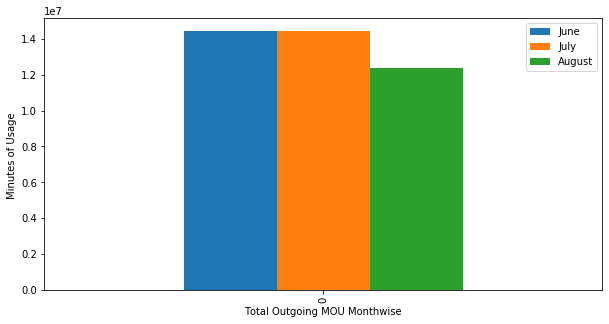

In [94]:
df_eda.loc[(df_eda.index == 0),['June','July','August']].plot.bar(figsize=(10,5))
plt.ylabel("Minutes of Usage ")
plt.xlabel("Total Outgoing MOU Monthwise")

As above bar graph clearly shows that total outgoing MOU is decreses in August

In [95]:
# Total Outgoing MOU Churn Vs Non Churn

new_row = {'June':round(telecom.loc[(telecom.Churn == 1),'total_og_mou_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 1),'total_og_mou_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 1),'total_og_mou_8'].sum(),0),'Description':'Total Outgoing MOU Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 0),'total_og_mou_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 0),'total_og_mou_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 0),'total_og_mou_8'].sum(),0),'Description':'Total Outgoing MOU Not Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

df_eda

June        July      August                   Description
0 14455951.00 14463383.00 12403149.00            Total Outgoing MOU
1  1522992.00  1160671.00   368315.00      Total Outgoing MOU Churn
2 12932959.00 13302712.00 12034834.00  Total Outgoing MOU Not Churn

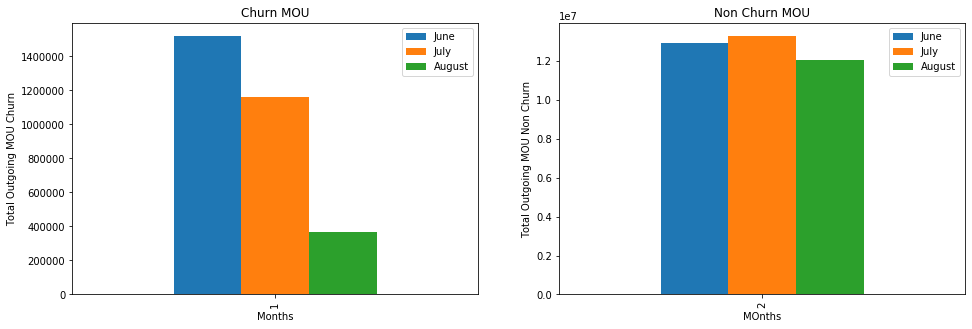

In [96]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 1),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total Outgoing MOU Churn")
plt.xlabel("Months")
plt.title("Churn MOU")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 2),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total Outgoing MOU Non Churn")
plt.xlabel("MOnths")
plt.title("Non Churn MOU")

plt.show()

After ploting total outgoing mou churn Vs Non Churn we can clearly able to see that total outgoing mou highly drop for Churn 

<B> Total Incoming MOU

In [97]:
new_row = {'June':round(telecom.total_ic_mou_6.sum(),0),'July':round(telecom.total_ic_mou_7.sum(),0),'August':round(telecom.total_ic_mou_8.sum(),0),'Description':'Total Incoming MOU'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 1),'total_ic_mou_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 1),'total_ic_mou_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 1),'total_ic_mou_8'].sum(),0),'Description':'Total Incoming MOU Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 0),'total_ic_mou_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 0),'total_ic_mou_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 0),'total_ic_mou_8'].sum(),0),'Description':'Total Incoming MOU Not Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

df_eda.loc[(df_eda.index >= 3)]

June       July     August                   Description
3 6582103.00 6577423.00 6161053.00            Total Incoming MOU
4  435117.00  332884.00  116487.00      Total Incoming MOU Churn
5 6146986.00 6244539.00 6044566.00  Total Incoming MOU Not Churn

Text(0.5, 0, 'Total Incoming MOU Monthwise')

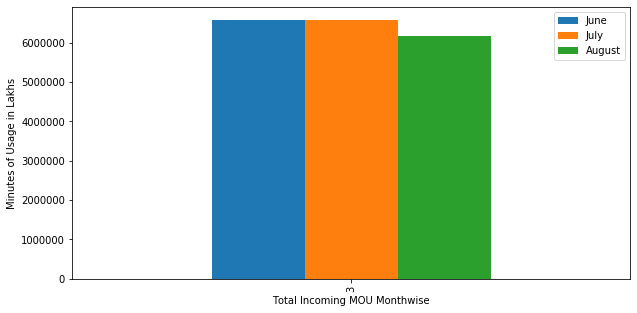

In [98]:
df_eda.loc[(df_eda.index == 3),['June','July','August']].plot.bar(figsize=(10,5))
plt.ylabel("Minutes of Usage in Lakhs")
plt.xlabel("Total Incoming MOU Monthwise")

As we clearly see the pattern as Total incoming MOU also droped 

Total Incoming MOU Churn Vs Non Churn

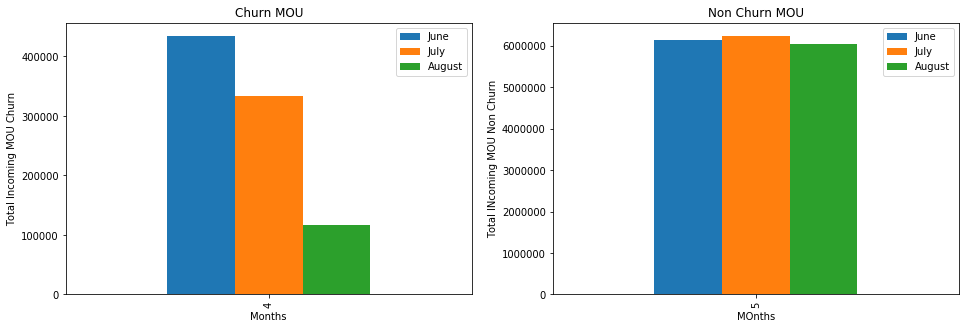

In [100]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 4),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total Incoming MOU Churn")
plt.xlabel("Months")
plt.title("Churn MOU")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 5),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total INcoming MOU Non Churn")
plt.xlabel("MOnths")
plt.title("Non Churn MOU")

plt.show()

IN total incoming MOU also we able to see same patttern like Total outgoing MOU as for Churners MOU droped in August 

Monthwise No. of Recharges


In [101]:
new_row = {'June':telecom.total_rech_num_6.sum(),'July':telecom.total_rech_num_7.sum(),'August':telecom.total_rech_num_8.sum(),'Description':'Total No. of Recharge'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 1),'total_rech_num_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 1),'total_rech_num_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 1),'total_rech_num_8'].sum(),0),'Description':'Total No. of Recharge Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 0),'total_rech_num_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 0),'total_rech_num_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 0),'total_rech_num_8'].sum(),0),'Description':'Total No. of Recharge Not Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

df_eda.loc[(df_eda.index >= 6)]

June      July    August                      Description
6 299530.00 292404.00 245988.00            Total No. of Recharge
7  28961.00  22980.00  10387.00      Total No. of Recharge Churn
8 270569.00 269424.00 235601.00  Total No. of Recharge Not Churn

Text(0.5, 0, 'Monthwise Total Recharge')

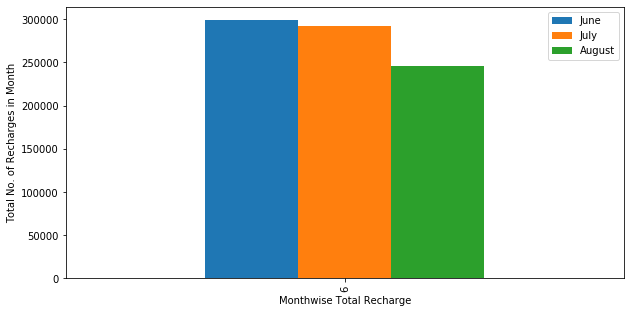

In [102]:
df_eda.loc[(df_eda.index == 6),['June','July','August']].plot.bar(figsize=(10,5))
plt.ylabel("Total No. of Recharges in Month")
plt.xlabel("Monthwise Total Recharge")

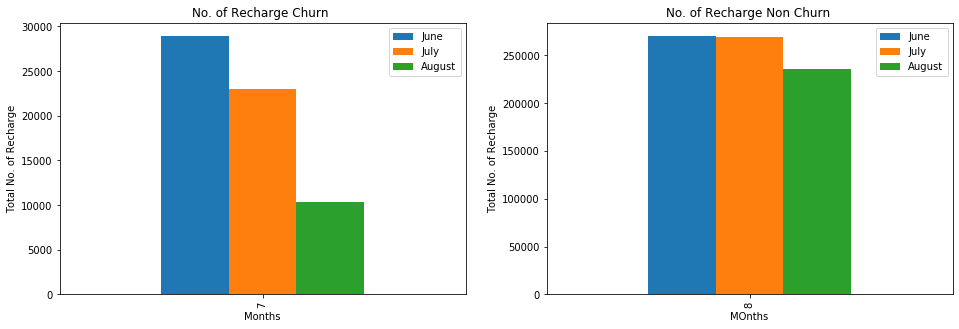

In [103]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 7),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. of Recharge")
plt.xlabel("Months")
plt.title("No. of Recharge Churn ")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 8),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total No. of Recharge")
plt.xlabel("MOnths")
plt.title("No. of Recharge Non Churn ")

plt.show()

In Total Recharge Count if we look overall it's clearly shows that some drop in August month and when we look Churn Vs Non Churn the No. of recharge count highly drop in case of Churn

Monthwise No. of Data Recharges

In [105]:
new_row = {'June':telecom.total_rech_data_6.sum(),'July':telecom.total_rech_data_7.sum(),'August':telecom.total_rech_data_8.sum(),'Description':'Total No. of Data Recharge'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 1),'total_rech_data_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 1),'total_rech_data_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 1),'total_rech_data_8'].sum(),0),'Description':'Total No. of Data Recharge Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 0),'total_rech_data_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 0),'total_rech_data_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 0),'total_rech_data_8'].sum(),0),'Description':'Total No. of Data Recharge Not Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

df_eda.loc[(df_eda.index >= 9)]

June     July   August                           Description
9  41824.00 45893.00 39445.00            Total No. of Data Recharge
10  3270.00  2638.00   749.00      Total No. of Data Recharge Churn
11 38554.00 43255.00 38696.00  Total No. of Data Recharge Not Churn

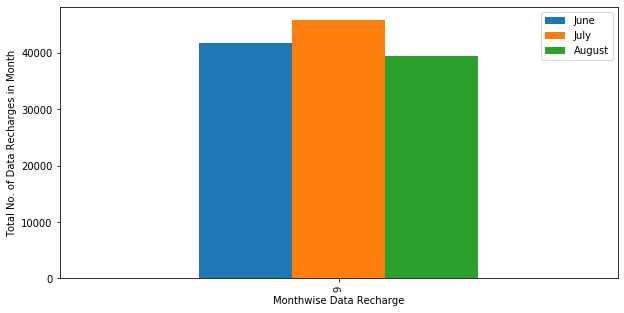

In [106]:
df_eda.loc[(df_eda.index == 9),['June','July','August']].plot.bar(figsize=(10,5))
plt.ylabel("Total No. of Data Recharges in Month")
plt.xlabel("Monthwise Data Recharge")
plt.show()

We can able to see that their is drop in no. of data recharges in August month 

No. of Data Recharge Churn Vs Non Churn


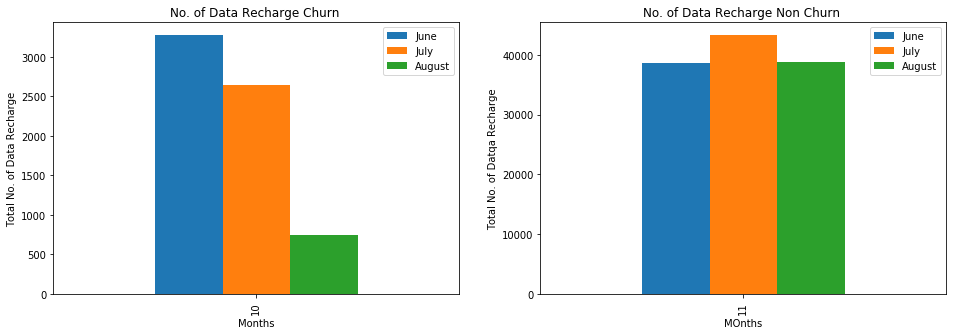

In [107]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 10),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. of Data Recharge")
plt.xlabel("Months")
plt.title("No. of Data Recharge Churn ")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 11),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total No. of Datqa Recharge")
plt.xlabel("MOnths")
plt.title("No. of Data Recharge Non Churn ")

plt.show()

No. of Data Recharges is decreses for Churn case but for non churn case no.of data recharges remain same 

Monthwise 2G and 3G Recharge Count

In [108]:
new_row = {'June':telecom.count_rech_2g_6.sum(),'July':telecom.count_rech_2g_7.sum(),'August':telecom.count_rech_2g_8.sum(),'Description':'Total No. of 2G Data Recharge'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':telecom.count_rech_3g_6.sum(),'July':telecom.count_rech_3g_7.sum(),'August':telecom.count_rech_3g_8.sum(),'Description':'Total No. of 3G Data Recharge'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 1),'count_rech_2g_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 1),'count_rech_2g_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 1),'count_rech_2g_8'].sum(),0),'Description':'Total No. of 2G Data Recharge Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 0),'count_rech_2g_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 0),'count_rech_2g_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 0),'count_rech_2g_8'].sum(),0),'Description':'Total No. of 2G Data Recharge Non Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 1),'count_rech_3g_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 1),'count_rech_3g_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 1),'count_rech_3g_8'].sum(),0),'Description':'Total No. of 3G Data Recharge Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 0),'count_rech_3g_6'].sum(),0),'July':round(telecom.loc[(telecom.Churn == 0),'count_rech_3g_7'].sum(),0),'August':round(telecom.loc[(telecom.Churn == 0),'count_rech_3g_8'].sum(),0),'Description':'Total No. of 3G Data Recharge Not Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

df_eda.loc[(df_eda.index >= 12)]

June     July   August                              Description
12 32490.00 36306.00 31038.00            Total No. of 2G Data Recharge
13  9334.00  9587.00  8407.00            Total No. of 3G Data Recharge
14  2449.00  2013.00   571.00      Total No. of 2G Data Recharge Churn
15 30041.00 34293.00 30467.00  Total No. of 2G Data Recharge Non Churn
16   821.00   625.00   178.00      Total No. of 3G Data Recharge Churn
17  8513.00  8962.00  8229.00  Total No. of 3G Data Recharge Not Churn

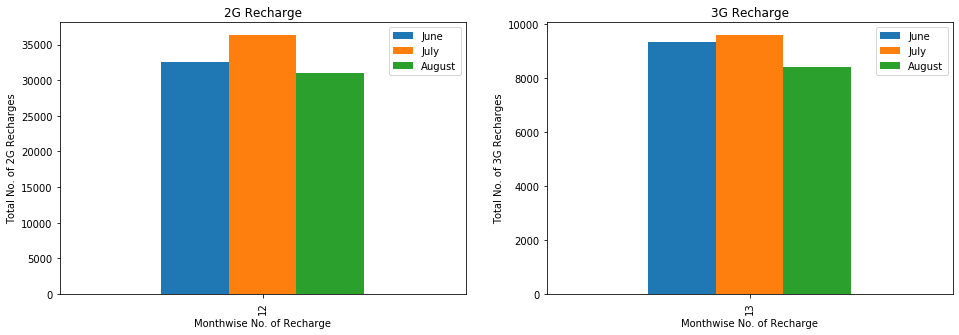

In [109]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 12),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. of 2G Recharges")
plt.xlabel("Monthwise No. of Recharge")
plt.title("2G Recharge")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 13),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total No. of 3G Recharges")
plt.xlabel("Monthwise No. of Recharge")
plt.title("3G Recharge")

plt.show()

For 2G as well as 3G recharge we clearly see their is drop in Recharge count for both

2G / 3G Recharge Count Churn Vs Non Churn

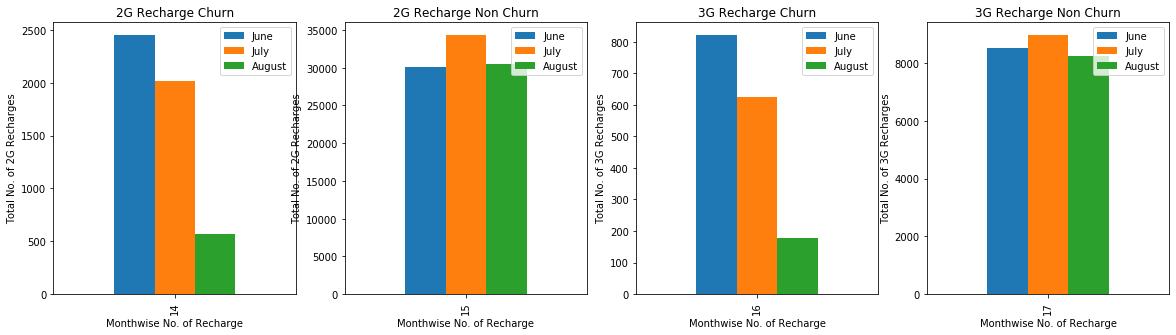

In [110]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(141)
df_eda.loc[(df_eda.index == 14),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. of 2G Recharges")
plt.xlabel("Monthwise No. of Recharge")
plt.title("2G Recharge Churn")


ax2 = fig.add_subplot(142)
df_eda.loc[(df_eda.index == 15),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total No. of 2G Recharges")
plt.xlabel("Monthwise No. of Recharge")
plt.title("2G Recharge Non Churn")

ax1 = fig.add_subplot(143)
df_eda.loc[(df_eda.index == 16),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. of 3G Recharges")
plt.xlabel("Monthwise No. of Recharge")
plt.title("3G Recharge Churn")

ax1 = fig.add_subplot(144)
df_eda.loc[(df_eda.index == 17),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total No. of 3G Recharges")
plt.xlabel("Monthwise No. of Recharge")
plt.title("3G Recharge Non Churn")

plt.show()

In above graph for Churn cases in both 2G as well as 3G we clearly see the pattern of drop in 2G/3G no. of recharges

Total Average Amount of Data Recharge Monthwise

In [113]:
new_row = {'June':round(telecom.av_rech_amt_data_6.sum()/1000,0),'July':round(telecom.av_rech_amt_data_7.sum()/1000,0),'August':round(telecom.av_rech_amt_data_8.sum()/1000,0),'Description':'Total Average Amount of Data Recharge'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 1),'av_rech_amt_data_6'].sum()/1000,0),'July':round(telecom.loc[(telecom.Churn == 1),'av_rech_amt_data_7'].sum()/1000,0),'August':round(telecom.loc[(telecom.Churn == 1),'av_rech_amt_data_8'].sum()/1000,0),'Description':'Average Amount of Data Recharge Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':round(telecom.loc[(telecom.Churn == 0),'av_rech_amt_data_6'].sum()/1000,0),'July':round(telecom.loc[(telecom.Churn == 0),'av_rech_amt_data_7'].sum()/1000,0),'August':round(telecom.loc[(telecom.Churn == 0),'av_rech_amt_data_8'].sum()/1000,0),'Description':'Average Amount of Data Recharge Not Churn'}
df_eda = df_eda.append(new_row,ignore_index=True)

df_eda.loc[(df_eda.index >= 18)]

June    July  August                                Description
18 2910.00 3049.00 2599.00      Total Average Amount of Data Recharge
19  202.00  157.00   49.00      Average Amount of Data Recharge Churn
20 2708.00 2892.00 2550.00  Average Amount of Data Recharge Not Churn

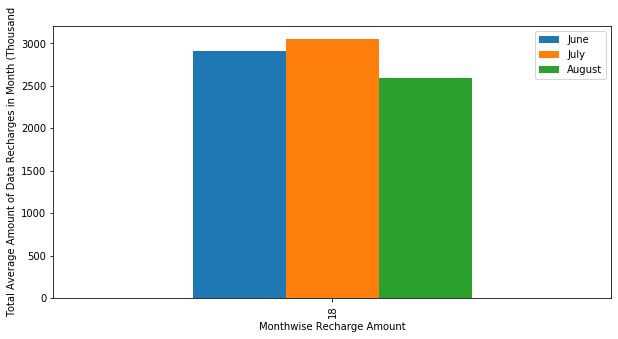

In [114]:
df_eda.loc[(df_eda.index == 18),['June','July','August']].plot.bar(figsize=(10,5))
plt.ylabel("Total Average Amount of Data Recharges in Month (Thousand")
plt.xlabel("Monthwise Recharge Amount")
plt.show()

Average amount of data recharge also droped in August month as compare to June & July

Average Recharge Amount Churn Vs Non Churn

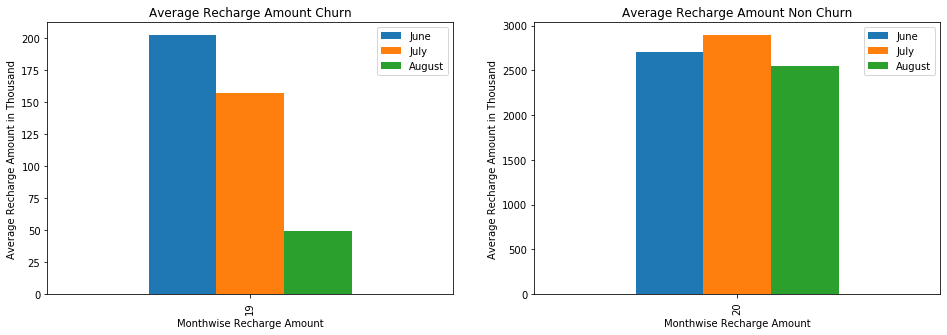

In [115]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
df_eda.loc[(df_eda.index == 19),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Average Recharge Amount in Thousand")
plt.xlabel("Monthwise Recharge Amount")
plt.title("Average Recharge Amount Churn")


ax2 = fig.add_subplot(122)
df_eda.loc[(df_eda.index == 20),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Average Recharge Amount in Thousand")
plt.xlabel("Monthwise Recharge Amount")
plt.title("Average Recharge Amount Non Churn")

plt.show()

Based on above graph we can able to see that Average Recharge amount is drop for Churn Case but for Non Churn case it remain as it is

2G/3G Volume

In [116]:
### Total
new_row = {'June':telecom.vol_2g_mb_6.sum(),'July':telecom.vol_2g_mb_7.sum(),'August':telecom.vol_2g_mb_8.sum(),'Description':'Total 2G Volume'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':telecom.vol_3g_mb_6.sum(),'July':telecom.vol_3g_mb_7.sum(),'August':telecom.vol_3g_mb_8.sum(),'Description':'Total 3G Volume'}
df_eda = df_eda.append(new_row,ignore_index=True)

### Average
new_row = {'June':telecom.vol_2g_mb_6.mean(),'July':telecom.vol_2g_mb_7.mean(),'August':telecom.vol_2g_mb_8.mean(),'Description':'Average 2G Volume'}
df_eda = df_eda.append(new_row,ignore_index=True)

new_row = {'June':telecom.vol_3g_mb_6.mean(),'July':telecom.vol_3g_mb_7.mean(),'August':telecom.vol_3g_mb_8.mean(),'Description':'Average 3G Volume'}
df_eda = df_eda.append(new_row,ignore_index=True)

df_eda.loc[(df_eda.index >= 21)]

June       July     August        Description
21 2534227.61 2370673.49 1890036.72    Total 2G Volume
22 6607361.77 6890183.49 6329782.86    Total 3G Volume
23      98.24      91.90      73.27  Average 2G Volume
24     256.15     267.11     245.39  Average 3G Volume

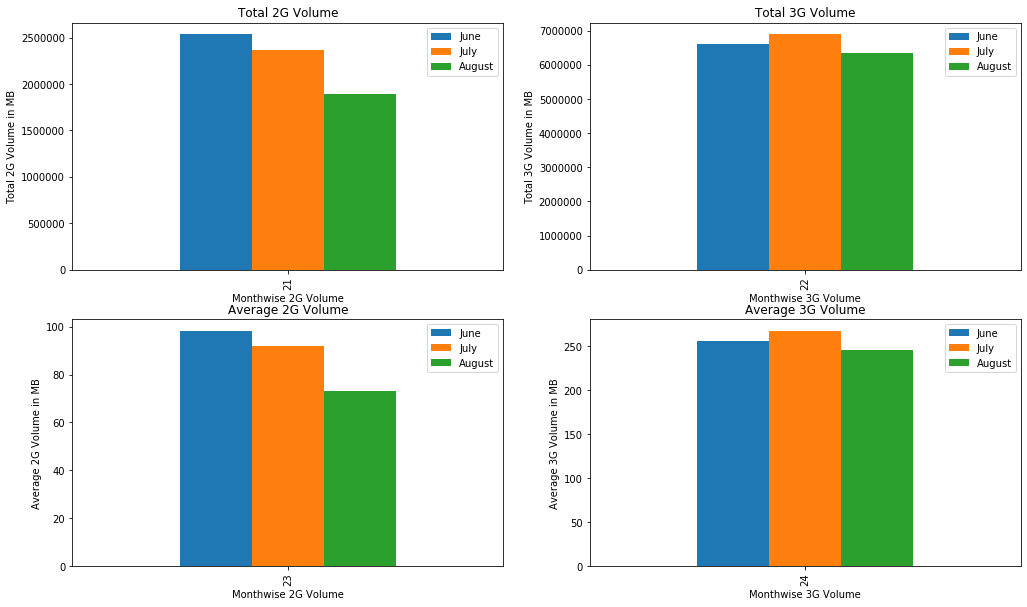

In [117]:
fig = plt.figure(figsize=(17,10))

ax1 = fig.add_subplot(221)
df_eda.loc[(df_eda.index == 21),['June','July','August']].plot(kind='bar',ax=ax1)
plt.ylabel("Total 2G Volume in MB")
plt.xlabel("Monthwise 2G Volume")
plt.title("Total 2G Volume")


ax2 = fig.add_subplot(222)
df_eda.loc[(df_eda.index == 22),['June','July','August']].plot(kind='bar',ax=ax2)
plt.ylabel("Total 3G Volume in MB")
plt.xlabel("Monthwise 3G Volume")
plt.title("Total 3G Volume")

ax3 = fig.add_subplot(223)
df_eda.loc[(df_eda.index == 23),['June','July','August']].plot(kind='bar',ax=ax3)
plt.ylabel("Average 2G Volume in MB")
plt.xlabel("Monthwise 2G Volume")
plt.title("Average 2G Volume")


ax4 = fig.add_subplot(224)
df_eda.loc[(df_eda.index == 24),['June','July','August']].plot(kind='bar',ax=ax4)
plt.ylabel("Average 3G Volume in MB")
plt.xlabel("Monthwise 3G Volume")
plt.title("Average 3G Volume")

plt.show()

In above graph we plot 2G / 3G volumn Total and Average and in that we can able to see clearly that volumns is drop in August as compare to other months

Monthwise Volume Based Cost

In [118]:
new_row = {'June':round(telecom.jun_vbc_3g.sum(),0),'July':round(telecom.jul_vbc_3g.sum(),0),'August':round(telecom.aug_vbc_3g.sum(),0),'Description':'Total Volume Based Cost'}
df_eda = df_eda.append(new_row,ignore_index=True)

df_eda.loc[(df_eda.index >= 25)]

June       July     August              Description
25 3334110.00 3730966.00 3485934.00  Total Volume Based Cost

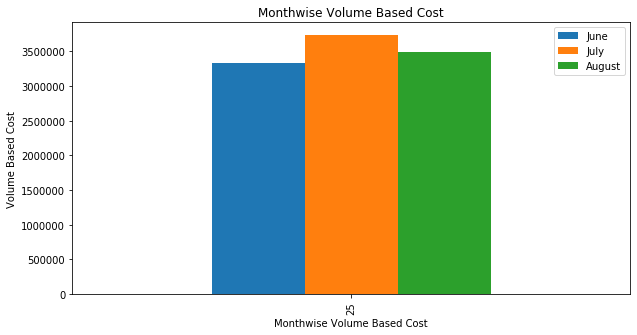

In [119]:
df_eda.loc[(df_eda.index == 25),['June','July','August']].plot.bar(figsize=(10,5))
plt.ylabel("Volume Based Cost")
plt.xlabel("Monthwise Volume Based Cost")
plt.title("Monthwise Volume Based Cost")
plt.show()

For volumn based cost we see some increses as people not buy and 2G/3G data recharge so they are in phase of Churn so they
used existing operator data serviced when they required.

Monthwise Average ARPU


In [120]:
new_row = {'June':round(telecom.arpu_6.mean(),0),'July':round(telecom.arpu_7.mean(),0),'August':round(telecom.arpu_8.mean(),0),'Description':'Average ARPU'}
df_eda = df_eda.append(new_row,ignore_index=True)

df_eda.loc[(df_eda.index >= 26)]

June   July  August   Description
26 503.00 493.00  438.00  Average ARPU

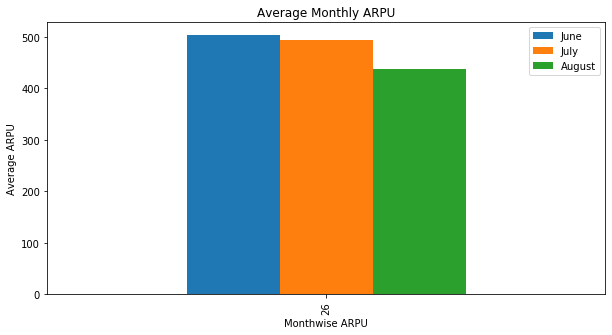

In [121]:
df_eda.loc[(df_eda.index == 26),['June','July','August']].plot.bar(figsize=(10,5))
plt.ylabel("Average ARPU")
plt.xlabel("Monthwise ARPU")
plt.title("Average Monthly ARPU")
plt.show()

For ARPU case it shows that operator ARPU decreseing from month June to August Month

## Model Building 

## Logistic Regression (Interpretable Model)

In [307]:
### for logistic regression creating copy of the dataframe 
telecom_logistic = telecom.copy()


In [308]:
telecom_logistic.shape

(25795, 174)

Droping all high co-releated columns from the data frmae

As No. of columns are high so Corr() takes longer time so commented 
#plt.figure(figsize = (200,100))        # Size of the figure
#sns.heatmap(telecom_logistic.corr(),annot = True)
#plt.show()

we Observed below columns are highly co-releated to each other so droping those columns 

In [309]:
telecom_logistic = telecom_logistic.drop(['mobile_number'],1)

telecom_logistic = telecom_logistic.drop(['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7',
           'loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6',
           'std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8',
           'loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7',
           'loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6',
           'std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8',
           'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
           'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
           'sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8'],1)


In [310]:
telecom_logistic.shape

(25795, 116)

In [311]:
## Importing all libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [312]:
# Putting feature variable to X
X = telecom_logistic.drop(['Churn'], axis=1)
y = telecom_logistic['Churn']

In [313]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [314]:
X_train.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  date_of_last_rech_data_6  date_of_last_rech_data_7  date_of_last_rech_data_8  total_rech_data_6  \
15560   75.45   82.37  196.71        11.93        15.99         3.06         61.84         17.81        130.29           0.00           0.00           0.00           0.00           0.00           0.00         57.89         30.38         27.31         15.88          3.43        106.04          0.00          0.00          0.00          0.00          0.00          0.00         0.00         0.00         0.00        123.71        120.81        190.79       1160.08        878.43        979.64          0.00          0.00          0.00          0.00          0.00         10.61         0.00         0.00         0.00                 6                 5                 4               110               220                 0             110             220               0                22.00                27.00                27.00                   0                   0                   0                     22.00                     27.00                     27.00               1.00   
28094  171.16  149.02  241.93         0.00         0.00        30.56          0.00          0.00         24.28           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00         54.84          0.00          0.00          0.00          0.00          0.00          0.00          0.00          0.00          0.00         0.00         0.00         0.00         10.04          2.44         28.78          0.00          0.00          0.00          0.23          0.20          0.00          0.00          0.00          0.00         0.00         0.00         0.00                16                14                16               200               175               310              25              25              50                28.00                31.00                31.00                  25                   0                  30                     28.00                     28.00                     31.00              12.00   
78116  328.37  374.76  236.97         8.93         2.01        30.08        130.46         41.68         78.11           0.00           0.00           0.00           0.00           0.00           0.00        118.93         25.14         41.44         20.46         18.54         66.74          0.00          0.00          0.00          0.63          1.21          0.00         0.66         0.00         0.00         85.79         58.64         53.31          3.45          0.30          1.80          0.06          0.00          0.00          5.34          0.00          0.00         0.11         2.21         0.33                 8                 6                 4               371               462               305             154             198             175                22.00                30.00                27.00                 154                 198                 175                     22.00                     30.00                     27.00               1.00   
64401  763.48  741.18  449.70  

In [315]:
## First we need to scale all columns 
scaler = StandardScaler()

scale_col = ['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8',
             'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8',
             'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8' ,'std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8',
             'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
             'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8',
             'ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
             'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
             'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
             'total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8',
             'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
             'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8',
             'monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8',
             'aon','aug_vbc_3g','jun_vbc_3g','jul_vbc_3g']
         
X_train[scale_col] = scaler.fit_transform(X_train[scale_col])

X_train.head()


arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  date_of_last_rech_data_6  date_of_last_rech_data_7  date_of_last_rech_data_8  total_rech_data_6  \
15560   -1.48   -1.50   -0.83        -0.60        -0.59        -0.59         -0.72         -0.83         -0.47          -0.20          -0.16          -0.16          -0.24          -0.22          -0.22         -0.56         -0.67         -0.66         -0.60         -0.64         -0.35         -0.09         -0.10         -0.07         -0.36         -0.39         -0.37        -0.31        -0.03        -0.02         -0.37         -0.39         -0.01         12.38         10.01         11.88         -0.41         -0.11         -0.25         -0.18         -0.19          0.05        -0.10        -0.12        -0.11             -0.62             -0.72             -0.65             -1.41             -1.08             -1.42           -0.33            0.47           -1.13                -0.93                -0.03                 0.14               -0.82               -0.82               -0.77                      0.93                      1.26                      1.39              -0.23   
28094   -1.15   -1.26   -0.67        -0.63        -0.64        -0.51         -0.87         -0.88         -0.77          -0.20          -0.16          -0.16          -0.24          -0.22          -0.22         -0.75         -0.77         -0.56         -0.63         -0.65         -0.59         -0.09         -0.10         -0.07         -0.36         -0.39         -0.37        -0.31        -0.03        -0.02         -0.88         -0.94         -0.79         -0.43         -0.47         -0.45          1.08          0.99         -0.25         -0.18         -0.19         -0.19        -0.10        -0.12        -0.11              0.47              0.29              0.75             -1.15             -1.21             -0.55           -0.95           -0.96           -0.74                 0.33                 0.80                 0.76               -0.60               -0.82               -0.49                      1.44                      1.34                      1.73               3.76   
78116   -0.61   -0.44   -0.69        -0.61        -0.63        -0.51         -0.54         -0.77         -0.62          -0.20          -0.16          -0.16          -0.24          -0.22          -0.22         -0.37         -0.69         -0.61         -0.59         -0.61         -0.44         -0.09         -0.10         -0.07         -0.32         -0.32         -0.37         0.01        -0.03        -0.02         -0.54         -0.68         -0.67         -0.40         -0.47         -0.42         -0.02         -0.11         -0.25         -0.06         -0.19         -0.19        -0.09         0.09        -0.07             -0.40             -0.60             -0.65             -0.65             -0.36             -0.56           -0.01            0.31            0.24                -0.93                 0.59                 0.14                0.54                0.96                0.85                      0.93                      1.50                      1.39              -0.23   
64401    0.89    0.89    0.03  

In [316]:
## Importing Logistic Regression Library
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [317]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [318]:
## Let's see which features RFE seleted as Rank-1
col = X_train.columns[rfe.support_]
col

Index(['loc_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'date_of_last_rech_8', 'last_day_rch_amt_8', 'date_of_last_rech_data_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'aon', 'onnet8_avg_flag', 'offnet8_avg_flag', 'total_ic8_avg_flag', 'total_rech_data8_avg_flag', 'aug_vbc_3g_avg_flag'], dtype='object')

Through Stats model check the p-value and then VIF

In [319]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                18056
Model:                            GLM   Df Residuals:                    18040
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3275.1
Date:                Mon, 24 Feb 2020   Deviance:                       6550.1
Time:                        19:15:10   Pearson chi2:                 3.58e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.6860      0.205    -27.701      0.000      -6.088      -5.284
loc_og_mou_8                 -0.3528      0.095     -3.706      0.000      -0.539      -0.166
og_others_8                  -1.8312      1.998     -0.917      0.359      -5.747       2.084
loc_ic_mou_8                 -1.3604      0.112    -12.105      0.000      -1.581      -1.140
spl_ic_mou_8                 -0.6013      0.098     -6.140      0.000      -0.793      -0.409
date_of_last_rech_8          -0.3698      0.024    -15.277      0.000      -0.417      -0.322
last_day_rch_amt_8           -0.5204      0.059     -8.760      0.000      -0.637      -0.404
date_of_last_rech_data_8     -0.6134      0.074     -8.275      0.000      -0.759      -0.468
av_rech_amt_data_8           -0.6595      0.103     -6.375      0.000      -0.862      -0.457
arpu_3g_8                     0.3956      0.077      5.114      0.000       0.244       0.547
aon                          -0.2066      0.042     -4.947      0.000      -0.288      -0.125
onnet8_avg_flag               0.6588      0.098      6.741      0.000       0.467       0.850
offnet8_avg_flag              0.6083      0.099      6.156      0.000       0.415       0.802
total_ic8_avg_flag            0.9423      0.099      9.486      0.000       0.748       1.137
total_rech_data8_avg_flag    -0.5573      0.142     -3.931      0.000      -0.835      -0.279
aug_vbc_3g_avg_flag           0.6424      0.140      4.589      0.000       0.368       0.917
=============================================================================================
"""

In [320]:
#All P-value are < 0.5 now let's check the VIF
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

Features  VIF
13  total_rech_data8_avg_flag 4.17
14        aug_vbc_3g_avg_flag 4.07
7          av_rech_amt_data_8 3.52
11           offnet8_avg_flag 2.94
10            onnet8_avg_flag 2.84
12         total_ic8_avg_flag 2.71
8                   arpu_3g_8 2.28
6    date_of_last_rech_data_8 2.17
0                loc_og_mou_8 1.65
2                loc_ic_mou_8 1.65
5          last_day_rch_amt_8 1.16
4         date_of_last_rech_8 1.15
9                         aon 1.12
3                spl_ic_mou_8 1.03
1                 og_others_8 1.00

As all VIF values are < 5  

In [321]:
y_train_pred = rfe.predict_proba(X_train)

# Create dataframe of the above prediction
y_pred_df = pd.DataFrame(y_train_pred)
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.head()

# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

# Putting CustID to index
y_train_df['CustID'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()


Churn  CustID  Churn_Prob
0      0   15560        0.11
1      0   28094        0.03
2      0   78116        0.17
3      0   64401        0.10
4      0   70741        0.03

In [322]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()



Churn  CustID  Churn_Prob  predicted
0      0   15560        0.11          0
1      0   28094        0.03          0
2      0   78116        0.17          0
3      0   64401        0.10          0
4      0   70741        0.03          0

In [323]:
#Let's evaluate models so for that importing all neccsary packages
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.predicted )
print(confusion)


[[13370  3199]
 [  234  1253]]


In [324]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted))

0.8098692955250333


In [325]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [326]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8426361802286483

In [327]:
# Let us calculate specificity
TN / float(TN+FP)

0.8069286016054077

In [328]:
## let's drop ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [329]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Churn, y_pred_final.Churn_Prob, drop_intermediate = False )

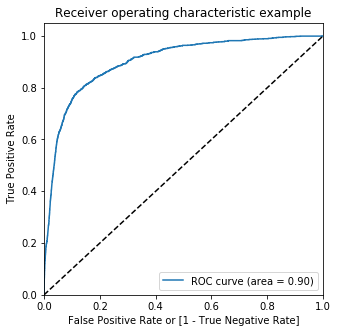

In [330]:
draw_roc(y_pred_final.Churn, y_pred_final.Churn_Prob)

In [331]:
# Let's create columns with different probability cutoffs as here we need to dffind the best cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

Churn  CustID  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0   15560        0.11          0    1    1    0    0    0    0    0    0    0    0
1      0   28094        0.03          0    1    0    0    0    0    0    0    0    0    0
2      0   78116        0.17          0    1    1    0    0    0    0    0    0    0    0
3      0   64401        0.10          0    1    0    0    0    0    0    0    0    0    0
4      0   70741        0.03          0    1    0    0    0    0    0    0    0    0    0

In [332]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.08   1.00   0.00
0.10  0.10      0.45   0.97   0.40
0.20  0.20      0.59   0.95   0.56
0.30  0.30      0.68   0.92   0.66
0.40  0.40      0.75   0.88   0.74
0.50  0.50      0.81   0.84   0.81
0.60  0.60      0.86   0.80   0.86
0.70  0.70      0.90   0.73   0.91
0.80  0.80      0.92   0.60   0.95
0.90  0.90      0.92   0.24   0.99


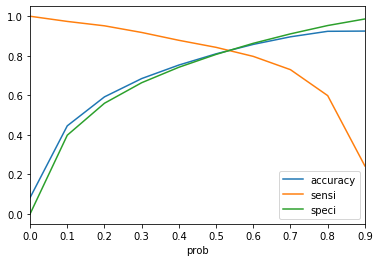

In [333]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Based on the above graph Approx 0.52 will be looks like better cut-off.

Let's apply model on Test Dataset and Check the accuracy

In [334]:
scale_col = ['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8',
             'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8',
             'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8' ,'std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8',
             'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
             'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8',
             'ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
             'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
             'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
             'total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8',
             'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
             'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8',
             'monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8',
             'aon','aug_vbc_3g','jun_vbc_3g','jul_vbc_3g']
         
X_test[scale_col] = scaler.transform(X_test[scale_col])

X_test.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  date_of_last_rech_data_6  date_of_last_rech_data_7  date_of_last_rech_data_8  total_rech_data_6  \
53231   -0.48   -0.71   -0.92        -0.44        -0.42        -0.47         -0.59         -0.62         -0.51          -0.20          -0.16          -0.16          -0.24          -0.22          -0.22         -0.32         -0.44         -0.35         -0.53         -0.54         -0.49         -0.09         -0.10         -0.07         -0.36          1.29         -0.18        -0.31        -0.03        -0.02         -0.36         -0.70         -0.50          0.46          0.67          0.13         -0.08         -0.11         -0.25          1.12          0.31          1.24        -0.10        -0.12        -0.11              0.03             -0.38             -0.18             -0.41             -0.78             -0.83           -0.42           -0.42           -0.74                 0.54                 0.38                 0.76               -0.38               -0.37               -0.31                      1.19                      1.34                     -0.88               0.14   
8919    -0.89   -0.91   -0.17        -0.61        -0.58        -0.52         -0.75         -0.71         -0.51          -0.20          -0.16          -0.16          -0.24          -0.22          -0.22         -0.57         -0.50         -0.25         -0.63         -0.64         -0.59         -0.09         -0.10         -0.07         -0.29         -0.37         -0.26         0.49        -0.03        -0.02          0.06          0.13         -0.05         -0.43         -0.24         -0.40         -0.41         -0.11         -0.25         -0.18         -0.19         -0.19         0.01        -0.12        -0.11             -0.40             -0.49             -0.07             -0.93             -0.72             -0.11            0.31           -0.01            0.42                 0.33                -0.45                -0.63               -0.64                0.56                1.06                      0.25                      1.09                      0.97              -0.23   
3737     1.68    2.29    1.05         0.66         1.18         0.17          0.12          0.20          0.39          -0.20           0.33          -0.16          -0.24           1.21          -0.22         -0.00          0.17          0.24          0.65          0.74          0.28         -0.09         -0.10         -0.07         -0.16         -0.04          1.03         1.27        -0.03        -0.02          1.54          1.36          1.41          1.43          0.00          0.06         -0.41         -0.11         -0.25         -0.18         -0.19         -0.19        -0.10        -0.12        -0.11              0.36              0.63             -0.07              1.66              2.52              0.97           -0.33           -0.19           -0.11                 0.33                 0.80                 0.45                0.15               -0.82                0.43                     -0.93                     -0.95                     -0.88              -0.59   
63631    0.35    0.29    0.54  

In [335]:
y_test_pred = rfe.predict_proba(X_test)

# Converting y_test_pred to a dataframe which is an array
y_pred_1_df = pd.DataFrame(y_test_pred)
y_pred_1 = y_pred_1_df.iloc[:,[1]]

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
#y_test_df.head()

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final_test = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final_test.head()


Churn  CustID    1
0      0   53231 0.52
1      0    8919 0.06
2      0    3737 0.11
3      0   63631 0.63
4      0   35438 0.03

In [336]:
# Renaming the column 
y_pred_final_test = y_pred_final_test.rename(columns={ 1 : 'Churn_Prob'})

# Creating new ccolumns which select Churn or Not Churn based on above Cutt-off (0.52)
y_pred_final_test['final_predicted'] = y_pred_final_test.Churn_Prob.map(lambda x: 1 if x > 0.50 else 0)
y_pred_final_test.head()

Churn  CustID  Churn_Prob  final_predicted
0      0   53231        0.52                1
1      0    8919        0.06                0
2      0    3737        0.11                0
3      0   63631        0.63                1
4      0   35438        0.03                0

In [337]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final_test.Churn, y_pred_final_test.final_predicted)

0.8050135676443985

In [338]:
confusion2 = metrics.confusion_matrix(y_pred_final_test.Churn, y_pred_final_test.final_predicted )
confusion2

array([[5701, 1417],
       [  92,  529]], dtype=int64)

In [339]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [340]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8518518518518519

In [341]:
# Let us calculate specificity
TN / float(TN+FP)

0.8009272267490868

In [ ]:
### Recommendation :

## PCA with Logistic Regression


In [342]:
## Creating new data frmae
pca_logistic = telecom.copy()


In [343]:
## Droping all high co-releated variable from dataset 

pca_logistic = pca_logistic.drop(['mobile_number'],1)

pca_logistic = pca_logistic.drop(['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7',
           'loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6',
           'std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8',
           'loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7',
           'loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6',
           'std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8',
           'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
           'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
           'sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8'],1)


In [344]:
#from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = pca_logistic.drop(['Churn'], axis=1)
y = pca_logistic['Churn']

In [345]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [346]:
# Scaleing on Train Data

## First we need to scale all columns 
scaler = StandardScaler()

scale_col = ['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8',
             'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8',
             'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8' ,'std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8',
             'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
             'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8',
             'ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
             'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
             'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
             'total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8',
             'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
             'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8',
             'monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8',
             'aon','aug_vbc_3g','jun_vbc_3g','jul_vbc_3g']
         
X_train[scale_col] = scaler.fit_transform(X_train[scale_col])

X_train.head()


arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  date_of_last_rech_data_6  date_of_last_rech_data_7  date_of_last_rech_data_8  total_rech_data_6  \
15560   -1.48   -1.50   -0.83        -0.60        -0.59        -0.59         -0.72         -0.83         -0.47          -0.20          -0.16          -0.16          -0.24          -0.22          -0.22         -0.56         -0.67         -0.66         -0.60         -0.64         -0.35         -0.09         -0.10         -0.07         -0.36         -0.39         -0.37        -0.31        -0.03        -0.02         -0.37         -0.39         -0.01         12.38         10.01         11.88         -0.41         -0.11         -0.25         -0.18         -0.19          0.05        -0.10        -0.12        -0.11             -0.62             -0.72             -0.65             -1.41             -1.08             -1.42           -0.33            0.47           -1.13                -0.93                -0.03                 0.14               -0.82               -0.82               -0.77                      0.93                      1.26                      1.39              -0.23   
28094   -1.15   -1.26   -0.67        -0.63        -0.64        -0.51         -0.87         -0.88         -0.77          -0.20          -0.16          -0.16          -0.24          -0.22          -0.22         -0.75         -0.77         -0.56         -0.63         -0.65         -0.59         -0.09         -0.10         -0.07         -0.36         -0.39         -0.37        -0.31        -0.03        -0.02         -0.88         -0.94         -0.79         -0.43         -0.47         -0.45          1.08          0.99         -0.25         -0.18         -0.19         -0.19        -0.10        -0.12        -0.11              0.47              0.29              0.75             -1.15             -1.21             -0.55           -0.95           -0.96           -0.74                 0.33                 0.80                 0.76               -0.60               -0.82               -0.49                      1.44                      1.34                      1.73               3.76   
78116   -0.61   -0.44   -0.69        -0.61        -0.63        -0.51         -0.54         -0.77         -0.62          -0.20          -0.16          -0.16          -0.24          -0.22          -0.22         -0.37         -0.69         -0.61         -0.59         -0.61         -0.44         -0.09         -0.10         -0.07         -0.32         -0.32         -0.37         0.01        -0.03        -0.02         -0.54         -0.68         -0.67         -0.40         -0.47         -0.42         -0.02         -0.11         -0.25         -0.06         -0.19         -0.19        -0.09         0.09        -0.07             -0.40             -0.60             -0.65             -0.65             -0.36             -0.56           -0.01            0.31            0.24                -0.93                 0.59                 0.14                0.54                0.96                0.85                      0.93                      1.50                      1.39              -0.23   
64401    0.89    0.89    0.03  

In [347]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [348]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [349]:
pca.components_

array([[-7.33825873e-02, -7.89767531e-02, -4.79549302e-02, ...,
        -3.91606916e-02, -3.24022797e-02, -3.96382120e-02],
       [ 2.03560528e-01,  2.41112123e-01,  2.51903438e-01, ...,
        -1.12555383e-02, -4.58984654e-03, -9.21219368e-03],
       [ 2.26364743e-02,  1.00575770e-01,  1.47748226e-01, ...,
        -3.21922363e-02, -4.28082576e-02, -1.63842751e-02],
       ...,
       [-3.81341072e-05, -1.00796571e-04,  5.34157228e-05, ...,
        -1.01397085e-04, -5.92726865e-05, -2.63478597e-04],
       [ 4.79777685e-04,  4.66311082e-06, -7.75902998e-04, ...,
        -3.00343943e-04,  6.78290021e-05,  1.22265527e-04],
       [-1.11890085e-03,  5.55884801e-04,  5.26536716e-04, ...,
        -5.84227214e-06,  4.66155761e-05, -8.98017805e-05]])

In [350]:
pca.components_.shape

(115, 115)

In [351]:
pca.explained_variance_ratio_

array([1.53102808e-01, 9.13286235e-02, 5.48622834e-02, 4.79175304e-02,
       3.54878447e-02, 3.16021538e-02, 3.04937632e-02, 2.94424310e-02,
       2.49540226e-02, 2.34735727e-02, 2.31485690e-02, 2.17902450e-02,
       2.11118636e-02, 1.99328240e-02, 1.90534410e-02, 1.78504712e-02,
       1.59386753e-02, 1.32705763e-02, 1.22684528e-02, 1.20026662e-02,
       1.14927003e-02, 1.13776030e-02, 1.09944585e-02, 1.05631266e-02,
       9.89786708e-03, 9.51164845e-03, 9.42844656e-03, 8.48795327e-03,
       8.40975639e-03, 8.22148029e-03, 8.07147591e-03, 7.95764522e-03,
       7.91722222e-03, 7.20796153e-03, 6.76823647e-03, 6.63280291e-03,
       6.19159650e-03, 6.06647006e-03, 5.79488903e-03, 5.67684121e-03,
       5.43997503e-03, 5.25108240e-03, 5.15136019e-03, 4.82235850e-03,
       4.47530243e-03, 4.29133296e-03, 4.20317326e-03, 4.00769119e-03,
       3.90419884e-03, 3.81585395e-03, 3.73797421e-03, 3.60292183e-03,
       3.46476916e-03, 3.32616680e-03, 3.30028007e-03, 3.20181135e-03,
      

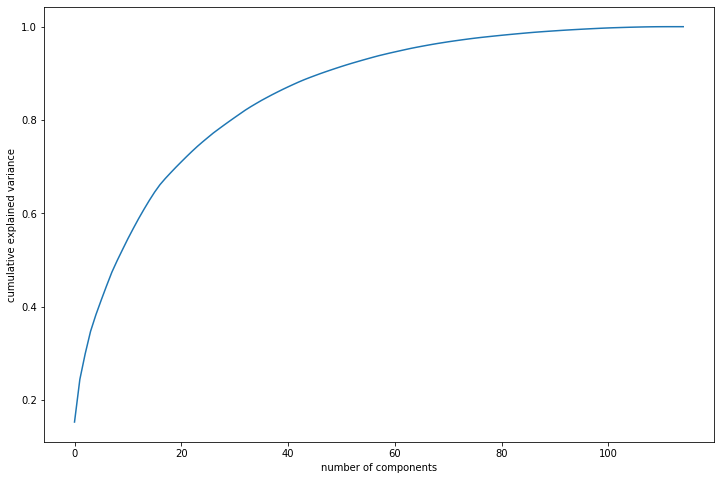

In [352]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show() 

Looks like 60 components are enough to describe 95% of the variance in the dataset

We'll choose 60 components for our modeling

In [353]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [354]:
## X_train datawindow with PCA 60 components
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(18056, 60)

In [355]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

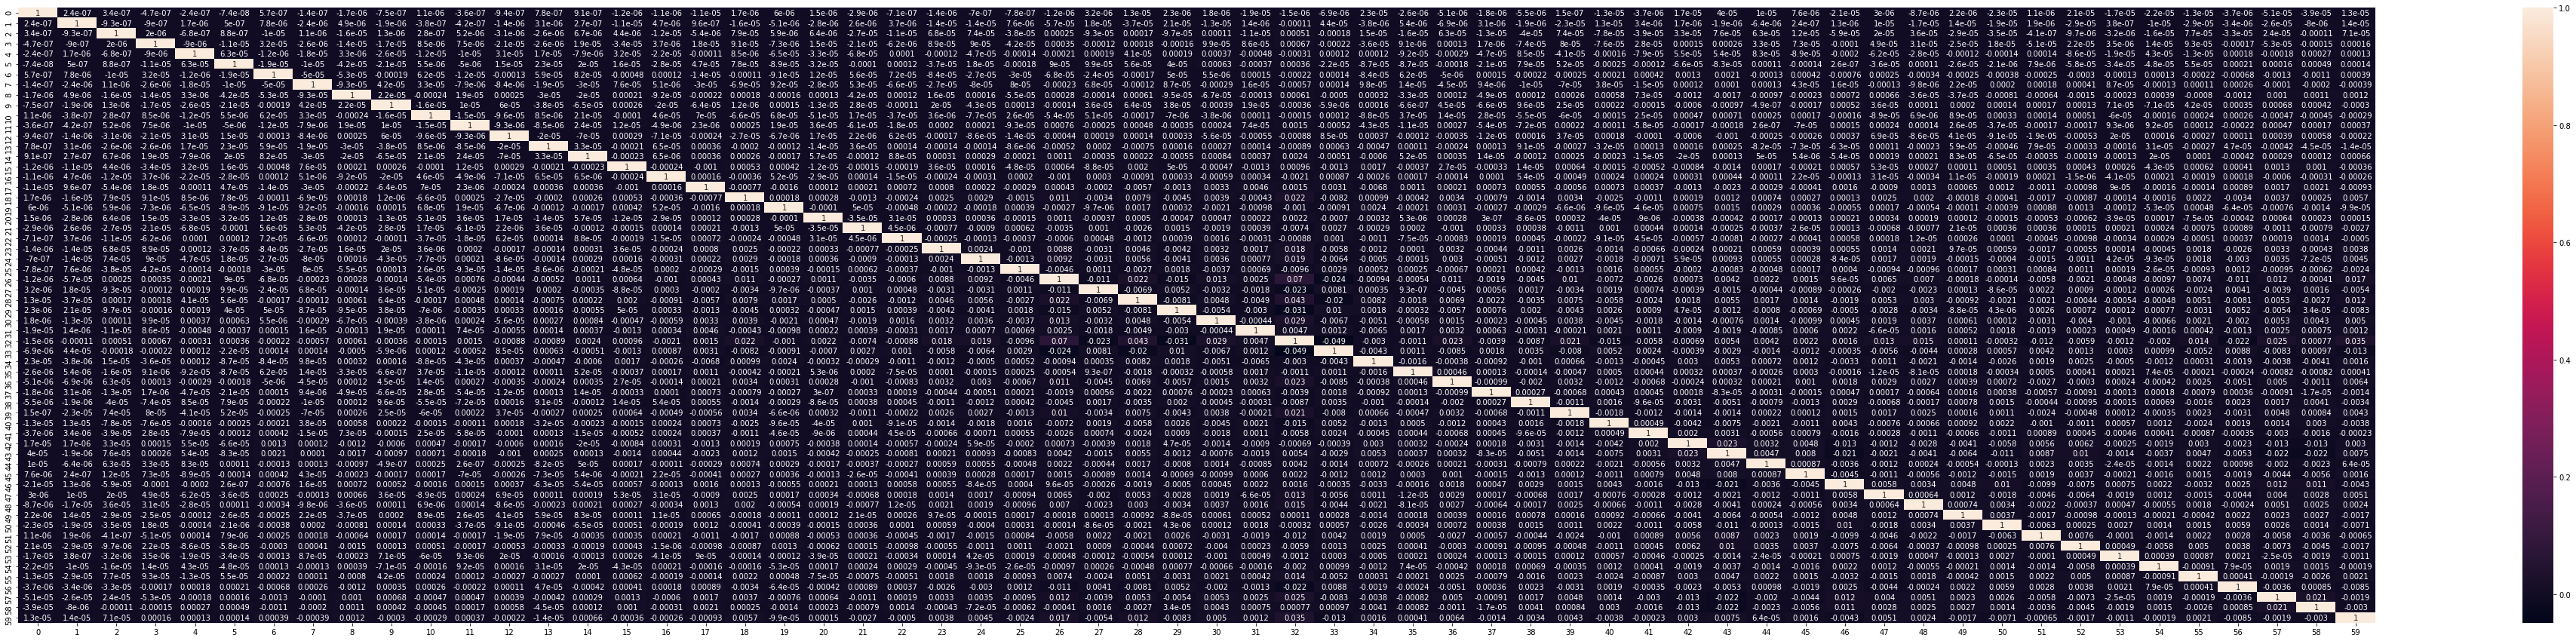

In [356]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (70,15))
sns.heatmap(corrmat,annot = True)

In [357]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.06978547261570575 , min corr:  -0.048784751555128236


## Logistic Regression with PCA

In [358]:
### Creating Object of LogisticRegression Class
learner_pca = LogisticRegression(class_weight='balanced')
pca_logistic = learner_pca.fit(df_train_pca,y_train)

In [359]:
#Making prediction on the training data
pred_probs_train = pca_logistic.predict_proba(df_train_pca)[:,1]

In [360]:
# Creating dataframe of predicted result
y_pred_1 = pd.DataFrame(pred_probs_train)
#y_pred_1.head()

# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)


# Putting CustID to index
y_train_df['CustID'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)
y_pred_final.head()

Churn  CustID    0
0      0   15560 0.00
1      0   28094 0.04
2      0   78116 0.04
3      0   64401 0.09
4      0   70741 0.05

In [361]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

Churn  CustID  Churn_Prob
0      0   15560        0.00
1      0   28094        0.04
2      0   78116        0.04
3      0   64401        0.09
4      0   70741        0.05

In [362]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

Churn  CustID  Churn_Prob  predicted
0      0   15560        0.00          0
1      0   28094        0.04          0
2      0   78116        0.04          0
3      0   64401        0.09          0
4      0   70741        0.05          0

In [363]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.predicted )
print(confusion)

[[13831  2738]
 [  219  1268]]


In [364]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted))

0.8362317235268055


In [365]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [366]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8527236045729657

In [367]:
# Let us calculate specificity
TN / float(TN+FP)

0.8347516446375762

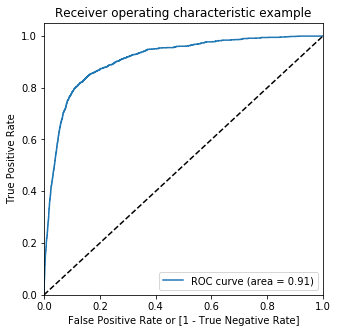

In [368]:
### Regarding ROC we already created function so just call that function
draw_roc(y_pred_final.Churn, y_pred_final.Churn_Prob)

In [369]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

Churn  CustID  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0   15560        0.00          0    1    0    0    0    0    0    0    0    0    0
1      0   28094        0.04          0    1    0    0    0    0    0    0    0    0    0
2      0   78116        0.04          0    1    0    0    0    0    0    0    0    0    0
3      0   64401        0.09          0    1    0    0    0    0    0    0    0    0    0
4      0   70741        0.05          0    1    0    0    0    0    0    0    0    0    0

In [370]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.08   1.00   0.00
0.10  0.10      0.47   0.98   0.42
0.20  0.20      0.62   0.95   0.59
0.30  0.30      0.72   0.92   0.70
0.40  0.40      0.79   0.88   0.78
0.50  0.50      0.84   0.85   0.83
0.60  0.60      0.87   0.81   0.88
0.70  0.70      0.90   0.75   0.92
0.80  0.80      0.92   0.62   0.95
0.90  0.90      0.93   0.36   0.98


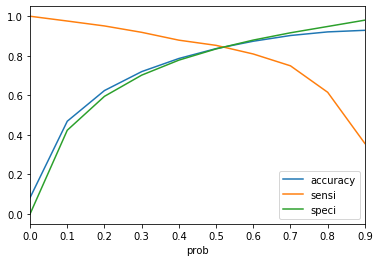

In [371]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

 it look like approx 0.52 is good cut-off 
 
 Let's apply the PCA model on Test DataSet

In [372]:
scale_col = ['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8',
             'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8',
             'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8' ,'std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8',
             'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
             'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8',
             'ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
             'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
             'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
             'total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8',
             'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
             'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8',
             'monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8',
             'aon','aug_vbc_3g','jun_vbc_3g','jul_vbc_3g']
         
X_test[scale_col] = scaler.transform(X_test[scale_col])

X_test.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  date_of_last_rech_data_6  date_of_last_rech_data_7  date_of_last_rech_data_8  total_rech_data_6  \
53231   -0.48   -0.71   -0.92        -0.44        -0.42        -0.47         -0.59         -0.62         -0.51          -0.20          -0.16          -0.16          -0.24          -0.22          -0.22         -0.32         -0.44         -0.35         -0.53         -0.54         -0.49         -0.09         -0.10         -0.07         -0.36          1.29         -0.18        -0.31        -0.03        -0.02         -0.36         -0.70         -0.50          0.46          0.67          0.13         -0.08         -0.11         -0.25          1.12          0.31          1.24        -0.10        -0.12        -0.11              0.03             -0.38             -0.18             -0.41             -0.78             -0.83           -0.42           -0.42           -0.74                 0.54                 0.38                 0.76               -0.38               -0.37               -0.31                      1.19                      1.34                     -0.88               0.14   
8919    -0.89   -0.91   -0.17        -0.61        -0.58        -0.52         -0.75         -0.71         -0.51          -0.20          -0.16          -0.16          -0.24          -0.22          -0.22         -0.57         -0.50         -0.25         -0.63         -0.64         -0.59         -0.09         -0.10         -0.07         -0.29         -0.37         -0.26         0.49        -0.03        -0.02          0.06          0.13         -0.05         -0.43         -0.24         -0.40         -0.41         -0.11         -0.25         -0.18         -0.19         -0.19         0.01        -0.12        -0.11             -0.40             -0.49             -0.07             -0.93             -0.72             -0.11            0.31           -0.01            0.42                 0.33                -0.45                -0.63               -0.64                0.56                1.06                      0.25                      1.09                      0.97              -0.23   
3737     1.68    2.29    1.05         0.66         1.18         0.17          0.12          0.20          0.39          -0.20           0.33          -0.16          -0.24           1.21          -0.22         -0.00          0.17          0.24          0.65          0.74          0.28         -0.09         -0.10         -0.07         -0.16         -0.04          1.03         1.27        -0.03        -0.02          1.54          1.36          1.41          1.43          0.00          0.06         -0.41         -0.11         -0.25         -0.18         -0.19         -0.19        -0.10        -0.12        -0.11              0.36              0.63             -0.07              1.66              2.52              0.97           -0.33           -0.19           -0.11                 0.33                 0.80                 0.45                0.15               -0.82                0.43                     -0.93                     -0.95                     -0.88              -0.59   
63631    0.35    0.29    0.54  

In [373]:
#Applying selected components to the test data - 60 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7739, 60)

In [374]:
y_test_pred = pca_logistic.predict_proba(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_1_df = pd.DataFrame(y_test_pred)
y_pred_1 = y_pred_1_df.iloc[:,[1]]
#y_pred_1.head()

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final_test = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final_test.head()


Churn  CustID    1
0      0   53231 0.44
1      0    8919 0.05
2      0    3737 0.31
3      0   63631 0.46
4      0   35438 0.03

In [375]:
# Renaming the column 
y_pred_final_test = y_pred_final_test.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final_test.head()

Churn  CustID  Churn_Prob
0      0   53231        0.44
1      0    8919        0.05
2      0    3737        0.31
3      0   63631        0.46
4      0   35438        0.03

In [376]:
# As we selected 0.52 is optimal cutt-off point so let apply it on Test Data
y_pred_final_test['final_predicted'] = y_pred_final_test.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)

In [377]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final_test.Churn, y_pred_final_test.final_predicted)

0.83628375759142

In [378]:
confusion2 = metrics.confusion_matrix(y_pred_final_test.Churn, y_pred_final_test.final_predicted )
confusion2

array([[5949, 1169],
       [  98,  523]], dtype=int64)

In [379]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [380]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8421900161030595

In [381]:
# Let us calculate specificity
TN / float(TN+FP)

0.835768474290531

## PCA with Random Forest

In [382]:
df_train_pca.shape

(18056, 60)

In [383]:
df_test_pca.shape

(7739, 60)

Build model With Default Hyperparameters. Let's first fit a random forest model with default hyperparameters.

In [384]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [385]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [386]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [387]:
# Making predictions
rfc_predictions = rfc.predict(df_test_pca)

In [388]:
# Let's check the report of our default model
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7118
           1       0.67      0.16      0.25       621

    accuracy                           0.93      7739
   macro avg       0.80      0.57      0.61      7739
weighted avg       0.91      0.93      0.90      7739



In [389]:
print(metrics.accuracy_score(y_test,rfc_predictions))

0.9260886419434036


In [390]:
# Printing confusion matrix
print(confusion_matrix(y_test,rfc_predictions))

[[7070   48]
 [ 524   97]]


In [391]:
con_mat = confusion_matrix(y_test,rfc_predictions)

In [392]:
TP = con_mat[1,1] # true positive 
TN = con_mat[0,0] # true negatives
FP = con_mat[0,1] # false positives
FN = con_mat[1,0] # false negatives

In [393]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.15619967793880837

In [394]:
# Let us calculate specificity
TN / float(TN+FP)

0.993256532733914

<b> Tuning max_depth

In [232]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [233]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           2.86          0.11             0.05            0.02               2   {'max_depth': 2}               0.84               0.82               0.82               0.82               0.79             0.82            0.02                4                0.83                0.82                0.83                0.83                0.81              0.82             0.01
1           8.09          0.42             0.07            0.01               7   {'max_depth': 7}               0.90               0.90               0.89               0.89               0.89             0.89            0.01                3                0.92                0.91                0.91                0.92                0.91              0.92             0.00
2          12.62          1.93             0.12            0.06              12  {'max_depth': 12}               0.93               0.93               0.92               0.92               0.92             0.92            0.00                2                0.98                0.98                0.98                0.98                0.97              0.98             0.00
3          11.79          0.87             0.12            0.03              17  {'max_depth': 17}               0.93               0.92               0.93               0.92               0.92             0.93            0.00                1                0.99                0.99                0.99                0.99                0.99              0.99             0.00

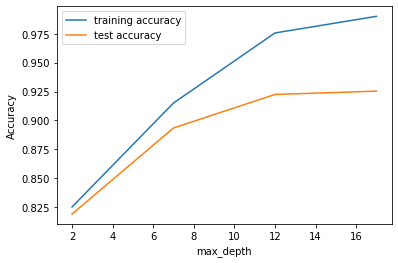

In [234]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<b> Tuning n_estimators

In [235]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight='balanced',max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [236]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_n_estimators                  params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           7.95          0.25             0.08            0.02                100   {'n_estimators': 100}               0.90               0.91               0.90               0.88               0.88             0.89            0.01                4                0.92                0.92                0.92                0.91                0.91              0.92             0.00
1          39.39          0.81             0.32            0.01                500   {'n_estimators': 500}               0.90               0.90               0.90               0.89               0.89             0.89            0.01                2                0.92                0.92                0.92                0.92                0.92              0.92             0.00
2          88.98          9.87             0.75            0.05                900   {'n_estimators': 900}               0.90               0.90               0.90               0.89               0.88             0.89            0.01                3                0.92                0.92                0.92                0.92                0.92              0.92             0.00
3         130.93          1.49             1.17            0.07               1300  {'n_estimators': 1300}               0.90               0.90               0.89               0.89               0.89             0.89            0.01                1                0.92                0.92                0.92                0.92                0.92              0.92             0.00

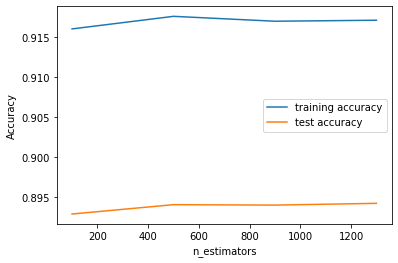

In [237]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<b> Tuning Tuning max_features

In [238]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced',max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [239]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_features                params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           6.56          0.39             0.10            0.01                  4   {'max_features': 4}               0.91               0.90               0.90               0.89               0.89             0.90            0.01                1                0.92                0.92                0.92                0.92                0.92              0.92             0.00
1          12.10          0.57             0.10            0.01                  8   {'max_features': 8}               0.90               0.90               0.90               0.89               0.89             0.89            0.01                2                0.91                0.91                0.92                0.92                0.91              0.91             0.00
2          20.09          0.52             0.09            0.00                 14  {'max_features': 14}               0.90               0.90               0.89               0.88               0.88             0.89            0.01                3                0.91                0.91                0.91                0.91                0.91              0.91             0.00
3          28.15          1.05             0.09            0.01                 20  {'max_features': 20}               0.89               0.90               0.89               0.88               0.87             0.89            0.01                4                0.91                0.91                0.91                0.91                0.91              0.91             0.00
4          32.77          0.40             0.09            0.00                 24  {'max_features': 24}               0.90               0.90               0.89               0.88               0.88             0.89            0.01                5                0.91                0.91                0.91                0.91                0.91              0.91             0.00

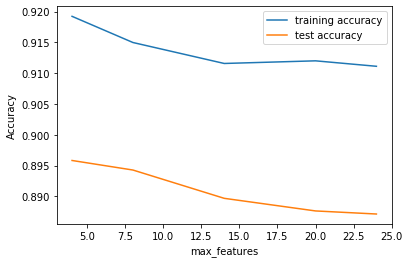

In [240]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<b> Tuning min_samples_leaf 

In [241]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}


# instantiate the model
rf = RandomForestClassifier(class_weight='balanced',max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [242]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_leaf                     params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           9.40          0.39             0.09            0.01                    100  {'min_samples_leaf': 100}               0.88               0.87               0.87               0.86               0.86             0.87            0.01                1                0.88                0.88                0.88                0.88                0.88              0.88             0.00
1           9.22          0.65             0.09            0.00                    150  {'min_samples_leaf': 150}               0.88               0.87               0.86               0.86               0.86             0.86            0.01                2                0.87                0.87                0.87                0.87                0.87              0.87             0.00
2           8.21          0.03             0.08            0.00                    200  {'min_samples_leaf': 200}               0.87               0.86               0.85               0.85               0.85             0.86            0.01                3                0.86                0.86                0.86                0.87                0.87              0.87             0.00
3           7.94          0.10             0.08            0.00                    250  {'min_samples_leaf': 250}               0.87               0.86               0.84               0.85               0.84             0.85            0.01                4                0.86                0.86                0.85                0.86                0.85              0.86             0.00
4           7.67          0.14             0.08            0.00                    300  {'min_samples_leaf': 300}               0.86               0.85               0.85               0.83               0.84             0.85            0.01                5                0.86                0.85                0.85                0.85                0.86              0.85             0.00

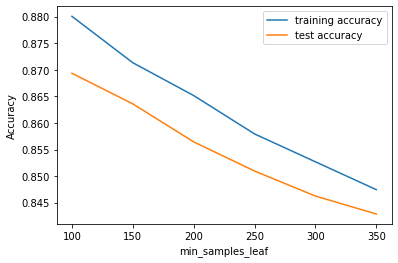

In [243]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<b> Tuning min_samples_split

In [244]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}


# instantiate the model
rf = RandomForestClassifier(class_weight='balanced',max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [245]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_split                      params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0          10.08          0.54             0.09            0.01                     200  {'min_samples_split': 200}               0.89               0.88               0.88               0.87               0.87             0.88            0.01                1                0.89                0.89                0.89                0.89                0.89              0.89             0.00
1           9.62          0.15             0.08            0.00                     250  {'min_samples_split': 250}               0.89               0.89               0.87               0.87               0.87             0.88            0.01                2                0.88                0.89                0.89                0.89                0.88              0.89             0.00
2           9.43          0.04             0.08            0.00                     300  {'min_samples_split': 300}               0.89               0.87               0.87               0.87               0.86             0.87            0.01                3                0.88                0.88                0.88                0.89                0.88              0.88             0.00
3           9.50          0.41             0.08            0.00                     350  {'min_samples_split': 350}               0.89               0.87               0.87               0.87               0.86             0.87            0.01                4                0.88                0.88                0.88                0.88                0.88              0.88             0.00
4           9.33          0.14             0.08            0.00                     400  {'min_samples_split': 400}               0.88               0.87               0.86               0.86               0.85             0.86            0.01                6                0.87                0.87                0.88                0.88                0.87              0.87             0.00

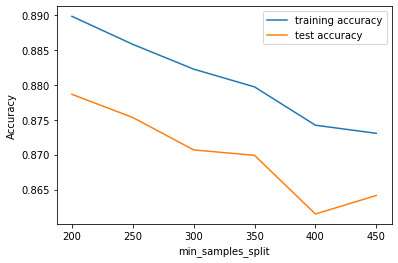

In [246]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<b> Grid Search to Find Optimal Hyperparameters

In [274]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': [100,150],
    'min_samples_split': [100,200],
    'n_estimators': [300,500], 
    'max_features': [4,9]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

In [275]:
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 20.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [276]:
grid_search.best_score_

0.8807040233161437

In [277]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 100,
 'n_estimators': 500}

In [395]:
#Fitting the final model with the best parameters obtained from grid search.

# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced',bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=4,
                             n_estimators=500)

# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [396]:
# predict
predictions = rfc.predict(df_test_pca)

In [397]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7118
           1       0.37      0.76      0.49       621

    accuracy                           0.88      7739
   macro avg       0.67      0.82      0.71      7739
weighted avg       0.93      0.88      0.89      7739



In [398]:
print(confusion_matrix(y_test,predictions))

[[6303  815]
 [ 152  469]]


In [399]:
confus = confusion_matrix(y_test,predictions)
TP = confus[1,1] # true positive 
TN = confus[0,0] # true negatives
FP = confus[0,1] # false positives
FN = confus[1,0] # false negatives



In [400]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7552334943639292

In [401]:
# Let us calculate specificity
TN / float(TN+FP)

0.8855015453779151

In [402]:
print(metrics.accuracy_score(y_test,rfc_predictions))

0.9260886419434036


## PCA with Decision Tree

In [403]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [404]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [405]:
# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

In [406]:
# Printing classification report
print(metrics.classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7118
           1       0.49      0.15      0.23       621

    accuracy                           0.92      7739
   macro avg       0.71      0.57      0.59      7739
weighted avg       0.90      0.92      0.90      7739



In [407]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))

[[7023   95]
 [ 528   93]]


In [408]:
print(metrics.accuracy_score(y_test,y_pred_default))

0.9194986432355602


In [409]:
con_mat = confusion_matrix(y_test,y_pred_default)

TP = con_mat[1,1] # true positive 
TN = con_mat[0,0] # true negatives
FP = con_mat[0,1] # false positives
FN = con_mat[1,0] # false negatives

In [410]:
# Let's see the sensitivity of our  model
TP / float(TP+FN)

0.1497584541062802

In [411]:
# Let us calculate specificity
TN / float(TN+FP)

0.9866535543692049

In [263]:
# plotting tree with max_depth=3
#dot_data = StringIO()  
#export_graphviz(dt_default, out_file=dot_data,
#                feature_names=features, filled=True,rounded=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

<b> Tuning max_depth

In [264]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini",random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)

tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [265]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth            params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           0.25          0.04             0.00            0.00               1  {'max_depth': 1}               0.56               0.54               0.55               0.54               0.52             0.54            0.01               39                0.54                0.55                0.54                0.55                0.55              0.54             0.00
1           0.43          0.03             0.00            0.00               2  {'max_depth': 2}               0.72               0.72               0.75               0.70               0.74             0.73            0.02               37                0.71                0.71                0.75                0.72                0.76              0.73             0.02
2           0.68          0.03             0.00            0.00               3  {'max_depth': 3}               0.72               0.71               0.75               0.75               0.69             0.72            0.02               38                0.71                0.71                0.76                0.76                0.72              0.73             0.02
3           0.84          0.01             0.00            0.00               4  {'max_depth': 4}               0.76               0.76               0.76               0.75               0.76             0.76            0.00               35                0.75                0.76                0.77                0.77                0.78              0.76             0.01
4           1.14          0.09             0.00            0.00               5  {'max_depth': 5}               0.78               0.73               0.77               0.75               0.75             0.76            0.02               36                0.78                0.73                0.79                0.76                0.78              0.77             0.02

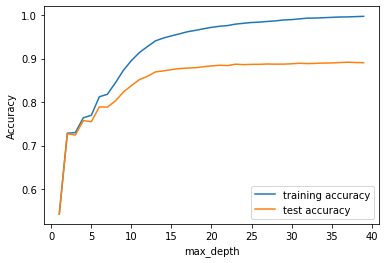

In [266]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we increases the max_depth in the model accuracy gets increases

<b> Tuning min_samples_leaf

In [267]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini",random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)

tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [268]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_leaf                    params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           1.78          0.09             0.01            0.01                      5   {'min_samples_leaf': 5}               0.87               0.86               0.87               0.86               0.85             0.86            0.01                1                0.95                0.95                0.95                0.95                0.95              0.95             0.00
1           1.60          0.04             0.00            0.00                     25  {'min_samples_leaf': 25}               0.81               0.81               0.80               0.81               0.79             0.80            0.01                2                0.85                0.86                0.85                0.86                0.85              0.85             0.01
2           1.49          0.03             0.00            0.00                     45  {'min_samples_leaf': 45}               0.79               0.76               0.81               0.78               0.78             0.78            0.01                3                0.81                0.80                0.83                0.83                0.83              0.82             0.01
3           1.40          0.05             0.00            0.00                     65  {'min_samples_leaf': 65}               0.76               0.78               0.81               0.78               0.77             0.78            0.01                4                0.79                0.79                0.83                0.81                0.80              0.80             0.01
4           1.36          0.05             0.00            0.00                     85  {'min_samples_leaf': 85}               0.75               0.77               0.79               0.76               0.77             0.77            0.01                9                0.78                0.78                0.81                0.79                0.80              0.79             0.01

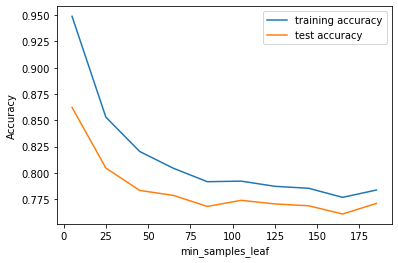

In [269]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we increases the min_samples_leaf model perfromance geting decreses

<b> Tuning min_samples_split

In [270]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}


# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)

tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [272]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_split                     params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           1.89          0.04             0.00            0.00                       5   {'min_samples_split': 5}               0.89               0.89               0.89               0.89               0.89             0.89            0.00                1                1.00                1.00                1.00                1.00                1.00              1.00             0.00
1           1.87          0.12             0.00            0.00                      25  {'min_samples_split': 25}               0.85               0.85               0.86               0.86               0.84             0.85            0.01                2                0.94                0.95                0.95                0.94                0.94              0.94             0.00
2           1.89          0.10             0.00            0.00                      45  {'min_samples_split': 45}               0.83               0.83               0.84               0.83               0.82             0.83            0.01                3                0.90                0.91                0.91                0.91                0.90              0.91             0.01
3           1.88          0.07             0.00            0.00                      65  {'min_samples_split': 65}               0.81               0.81               0.82               0.81               0.81             0.81            0.01                4                0.87                0.89                0.88                0.88                0.88              0.88             0.01
4           1.83          0.07             0.00            0.00                      85  {'min_samples_split': 85}               0.80               0.80               0.82               0.80               0.80             0.80            0.01                5                0.85                0.86                0.87                0.86                0.87              0.86             0.01

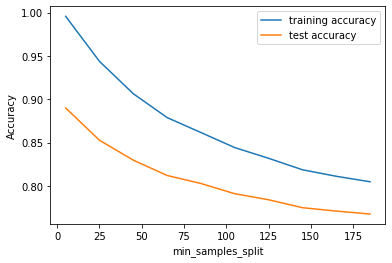

In [273]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As min_samples_split increases the model accuracy decreases

<b> Grid Search to Find Optimal Hyperparameters

In [287]:
# Create the parameter grid 
param_grid = {
    'max_depth': [10,15],
    'min_samples_leaf': [5,15],
    'min_samples_split': [15,25],
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [288]:
grid_search.best_score_

0.8576102520506892

In [289]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [412]:
#Running the model with best parameters obtained from grid search.

# model with optimal hyperparameters
tune_tree = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=5,
                                  min_samples_split=15)
tune_tree.fit(df_train_pca, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [413]:
# Making predictions
y_pred_tune = tune_tree.predict(df_test_pca)

In [414]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_tune))

[[6751  367]
 [ 396  225]]


In [415]:
confusion2 = confusion_matrix(y_test,y_pred_tune)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [300]:
# Printing classification report
print(metrics.classification_report(y_test, y_pred_tune))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7118
           1       0.38      0.36      0.37       621

    accuracy                           0.90      7739
   macro avg       0.66      0.66      0.66      7739
weighted avg       0.90      0.90      0.90      7739



In [416]:
print(metrics.accuracy_score(y_test,y_pred_tune))

0.9014084507042254


In [417]:
# Let's see the sensitivity of our model
TP / float(TP+FN)

0.36231884057971014

In [418]:
# Let us calculate specificity
TN / float(TN+FP)

0.9484405731947176